In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


ModuleNotFoundError: No module named 'bayes_opt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

##Exploratory Data Analyze


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Project 3/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.sort_values(ascending=False).plot.bar()
plt.title('Missing Values in Dataset')
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')
plt.show()

NameError: name 'train' is not defined

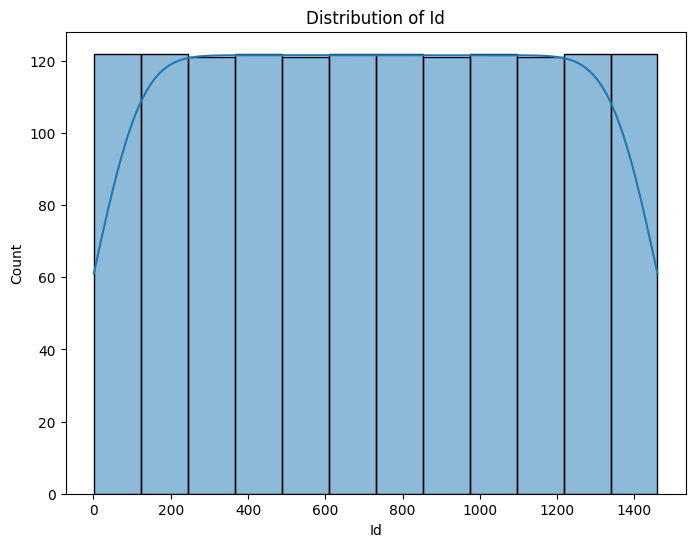

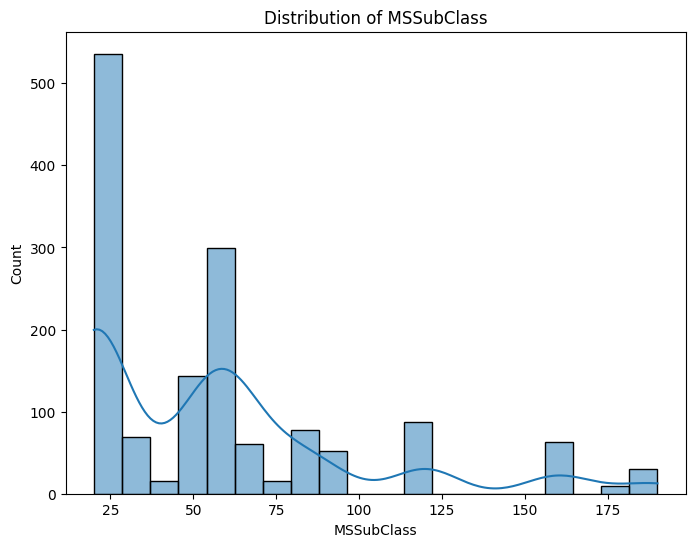

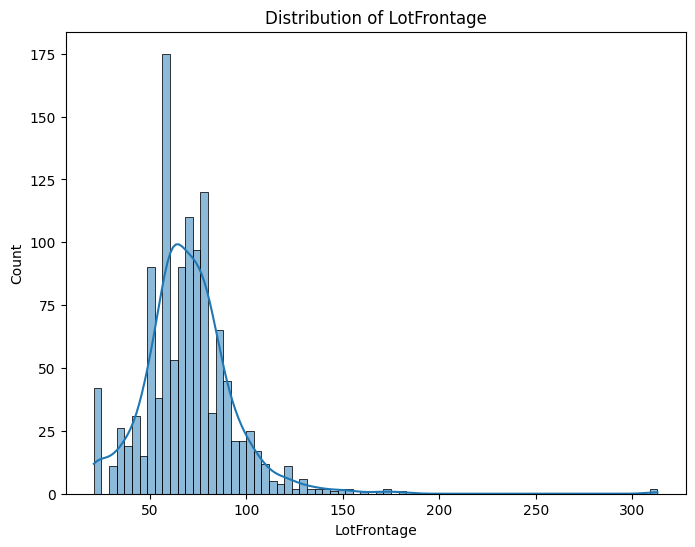

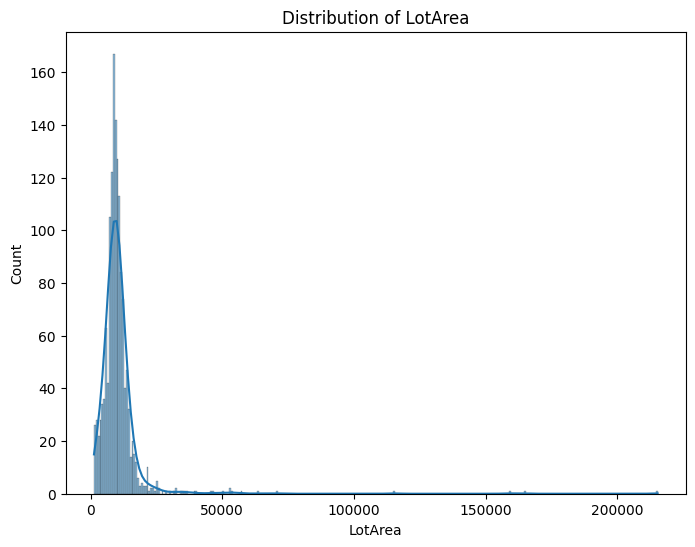

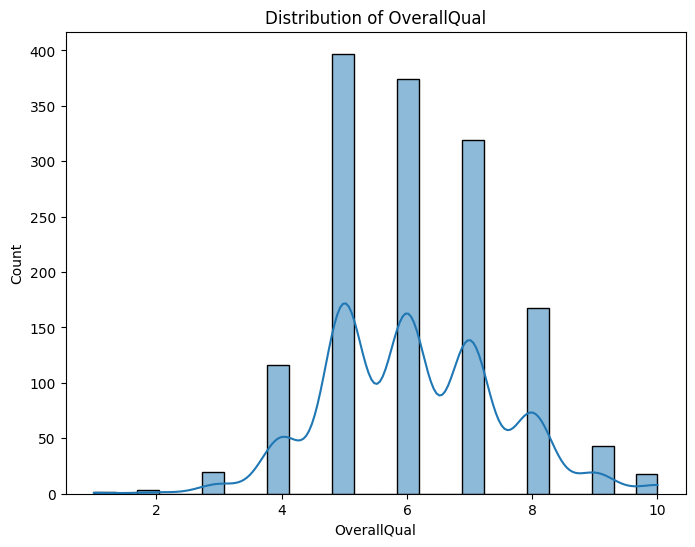

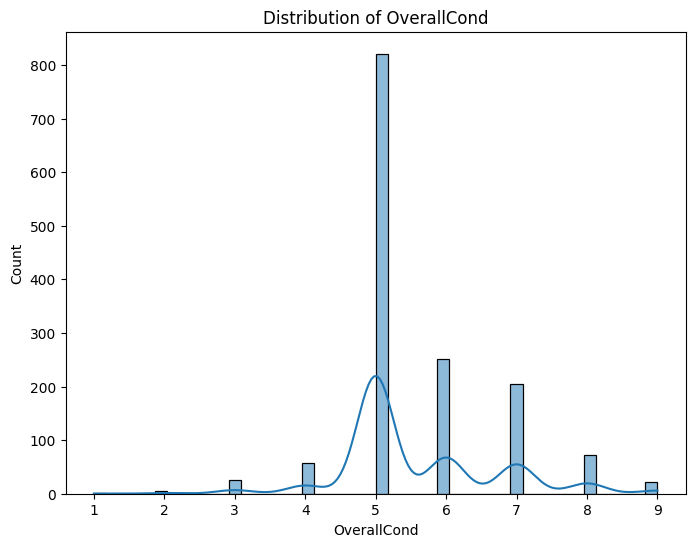

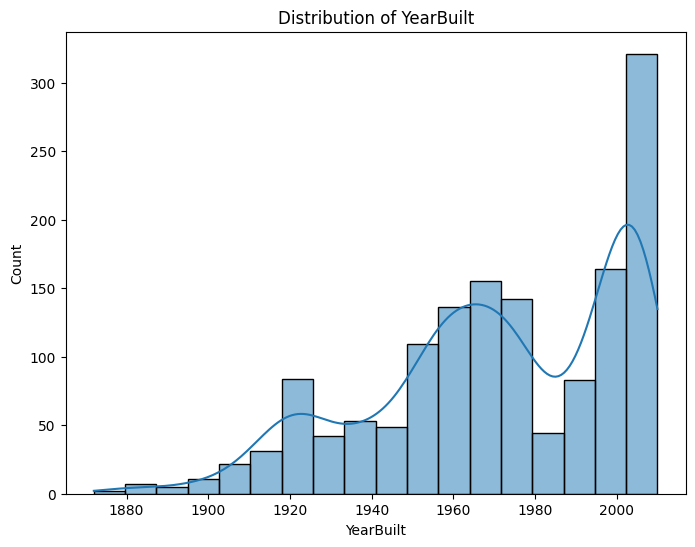

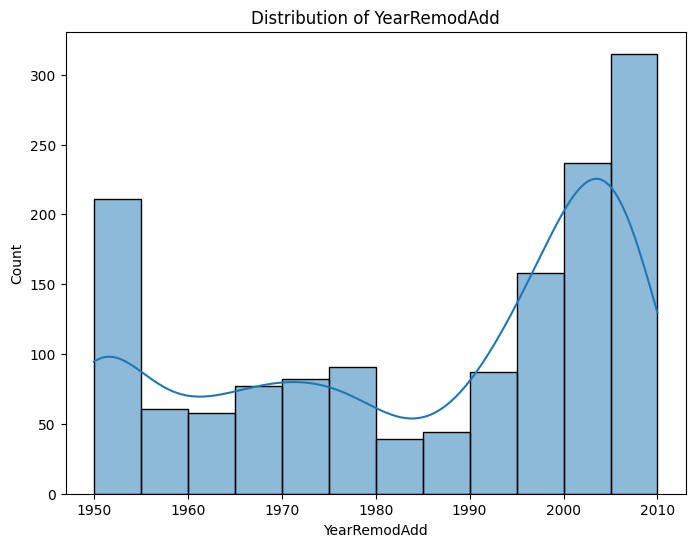

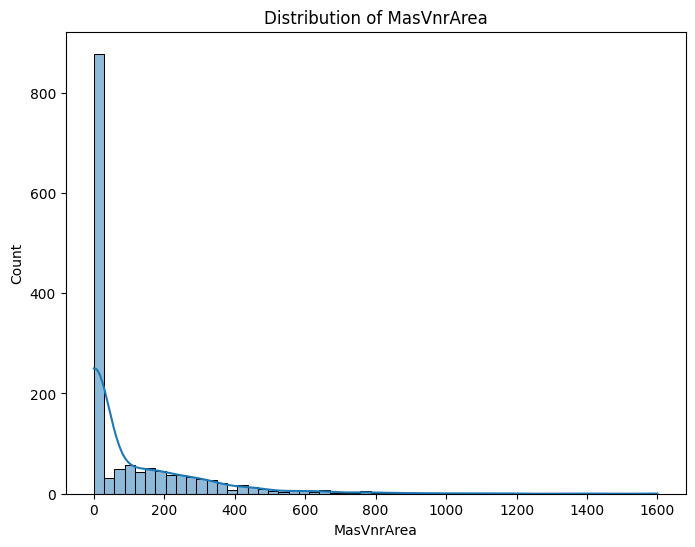

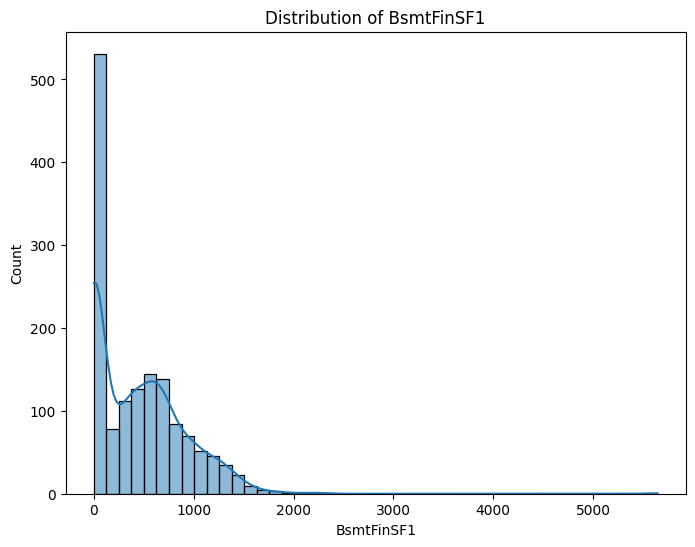

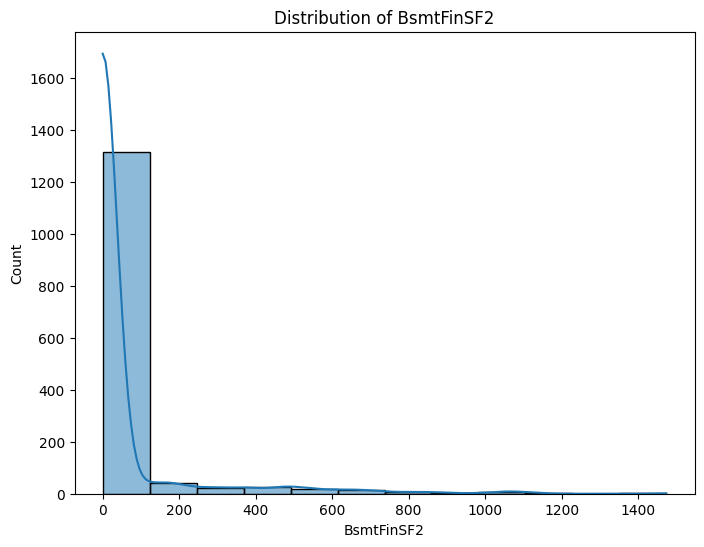

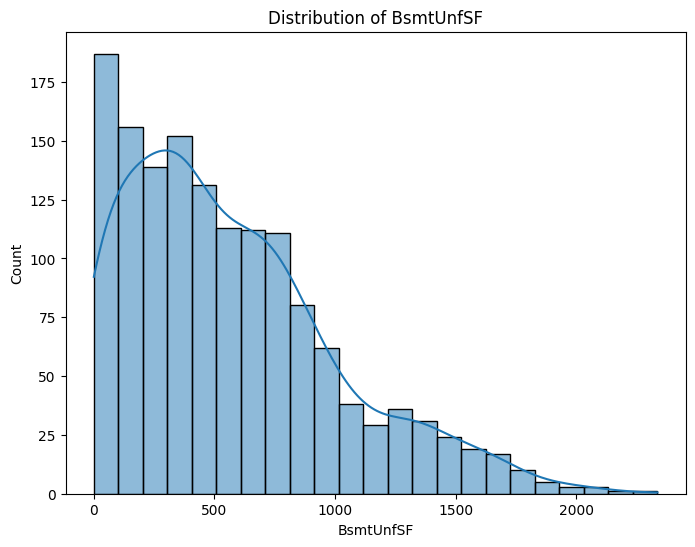

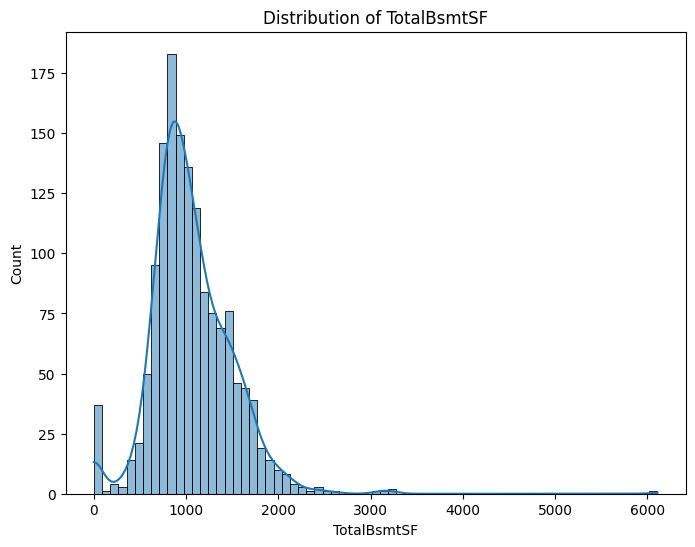

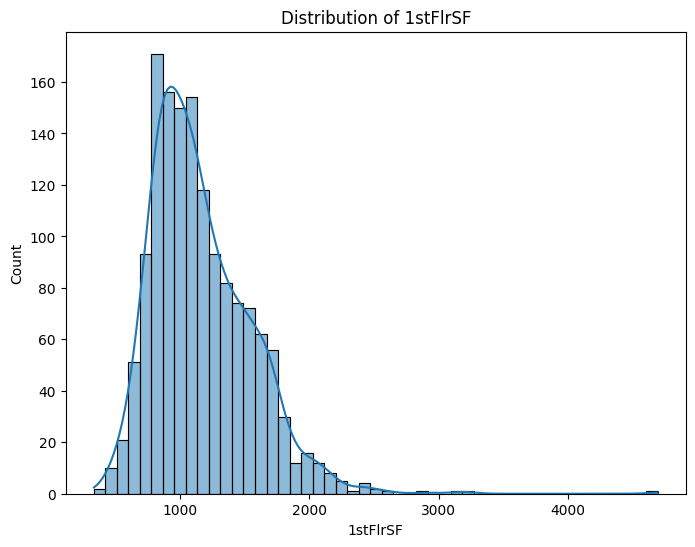

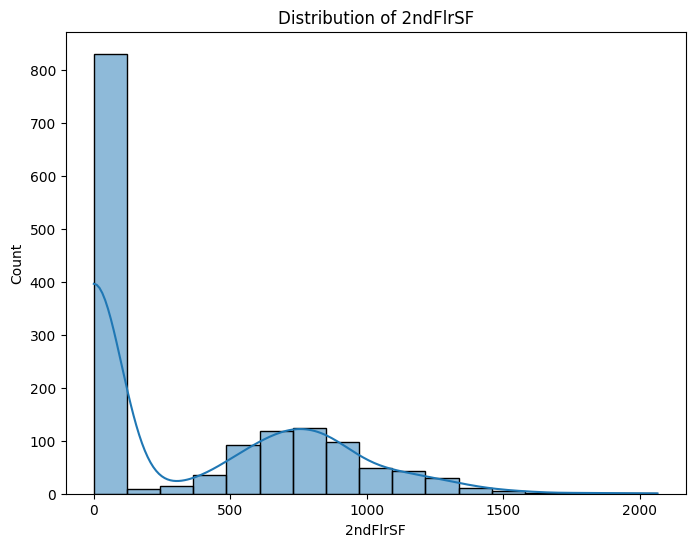

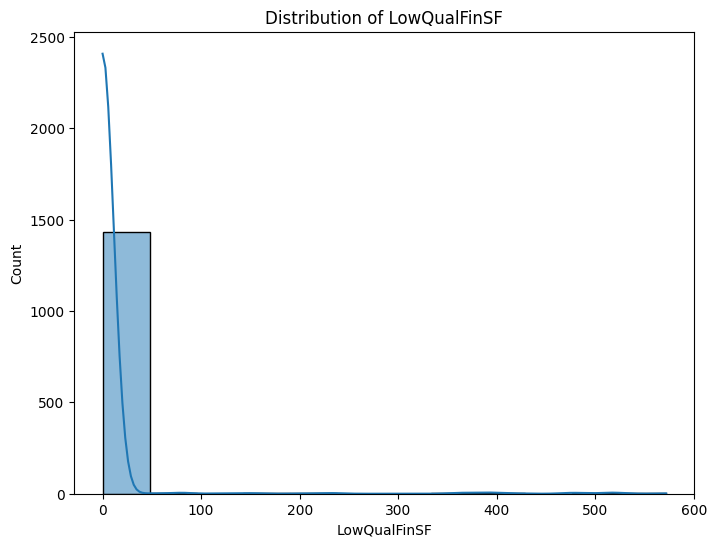

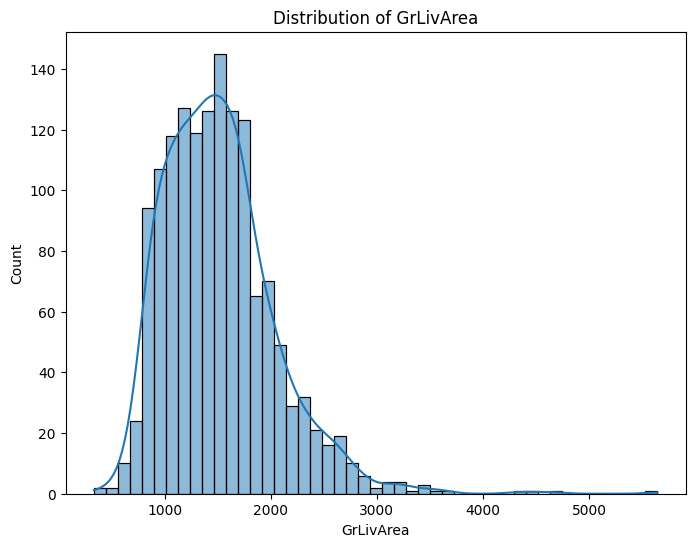

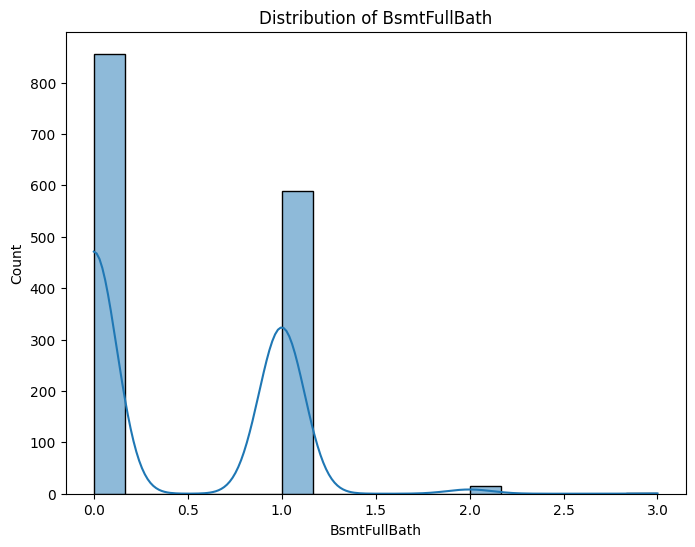

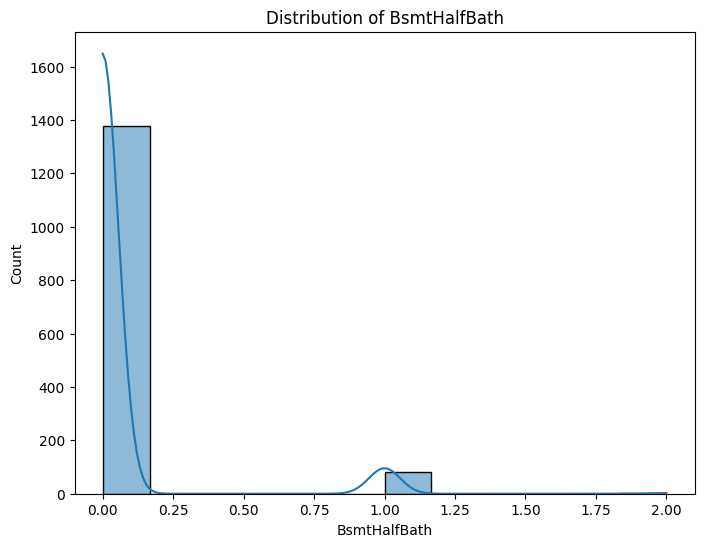

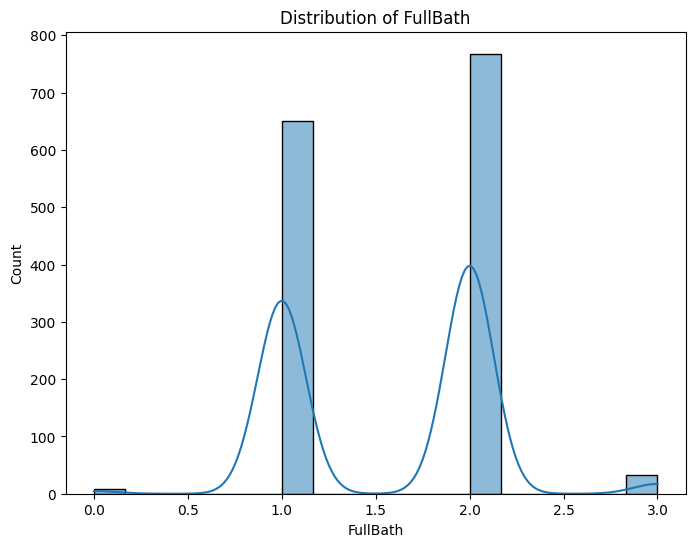

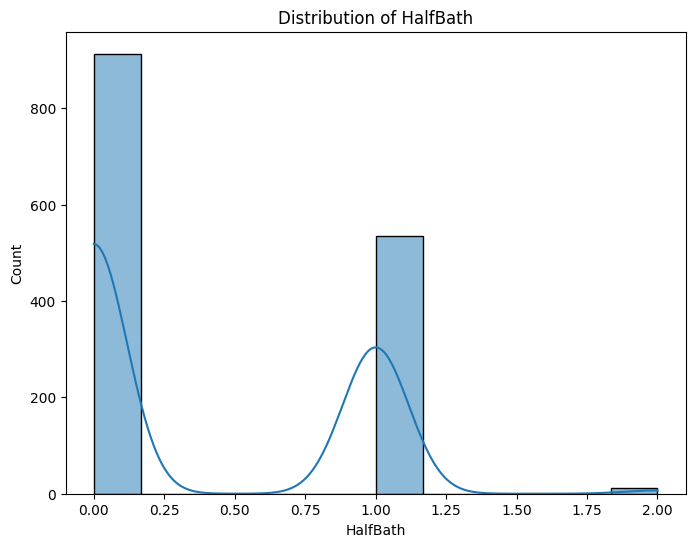

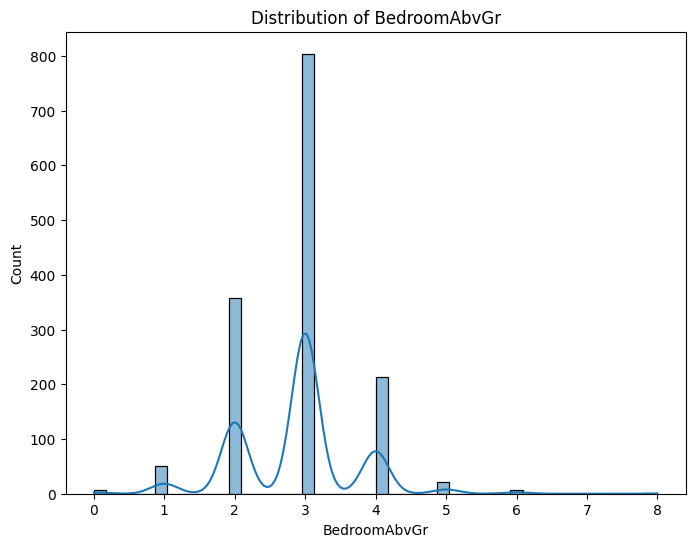

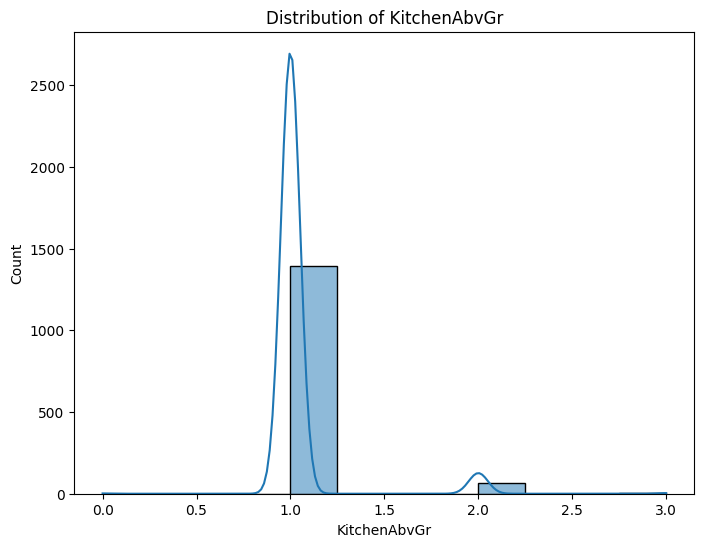

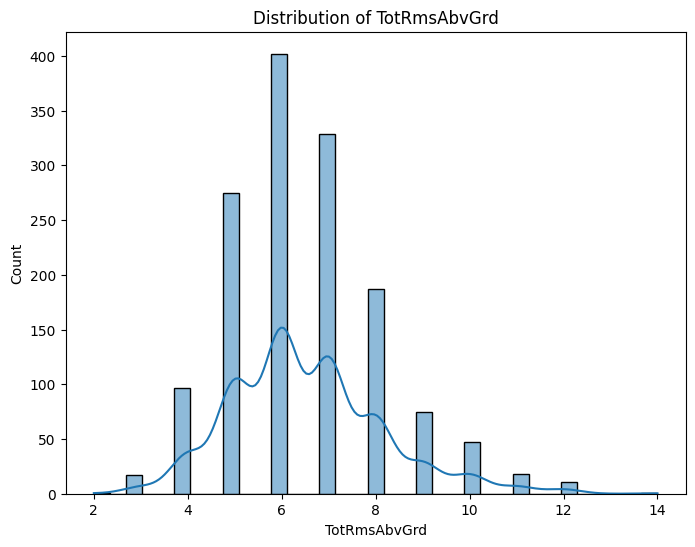

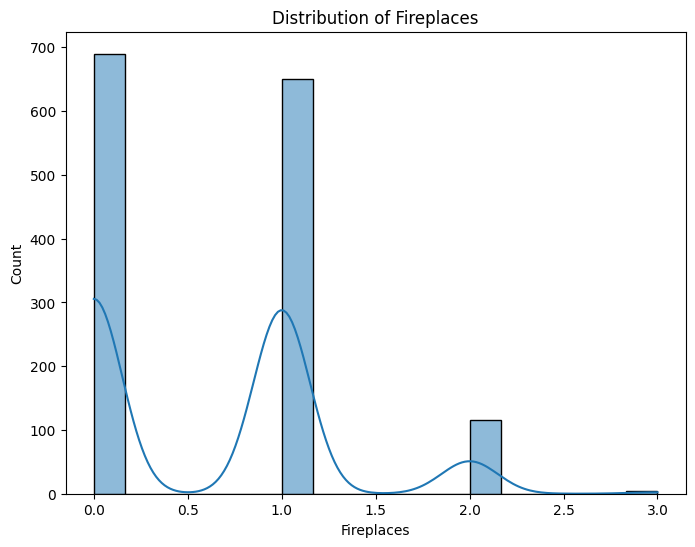

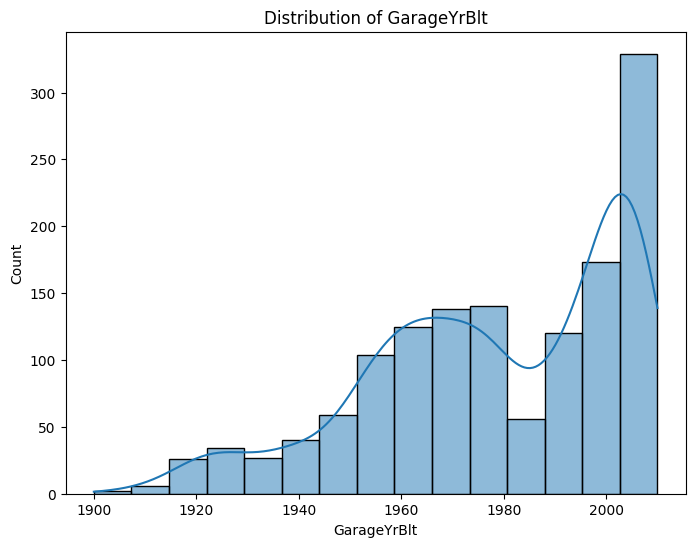

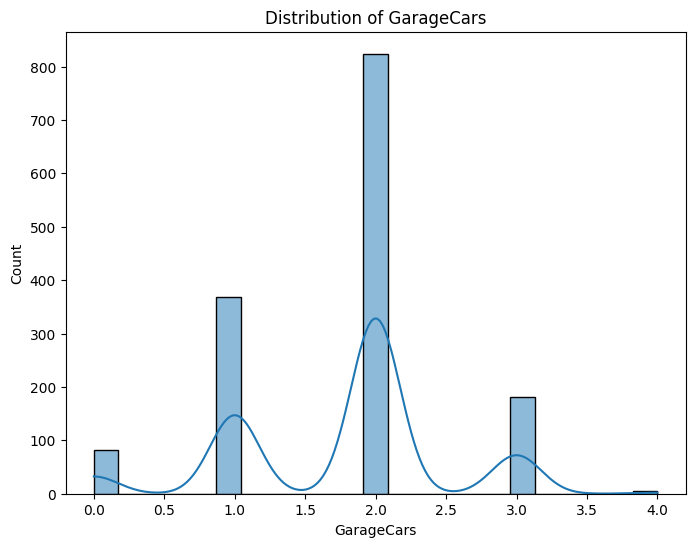

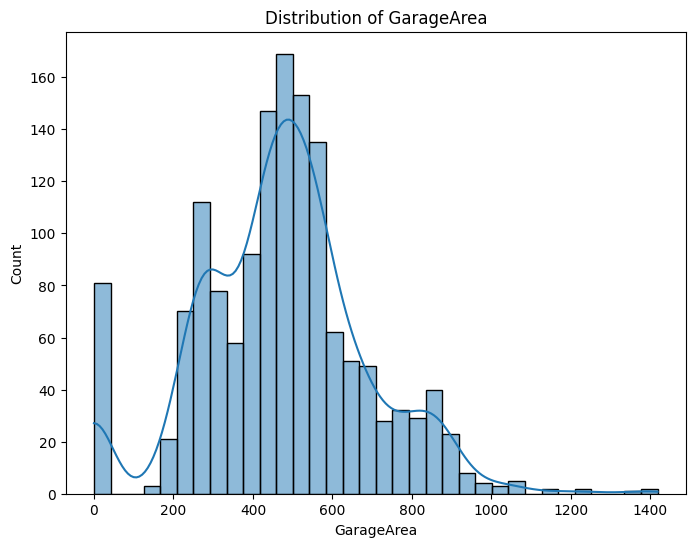

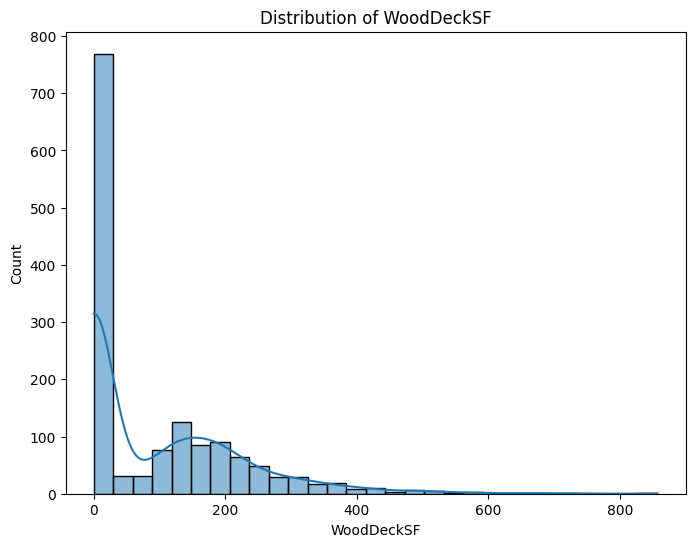

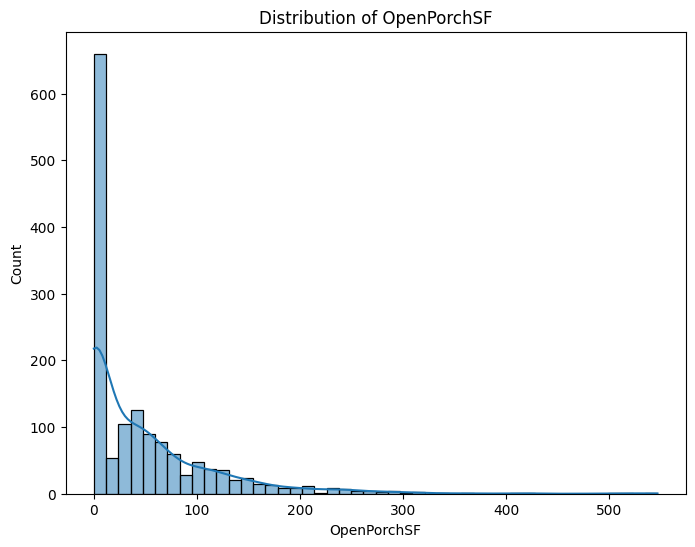

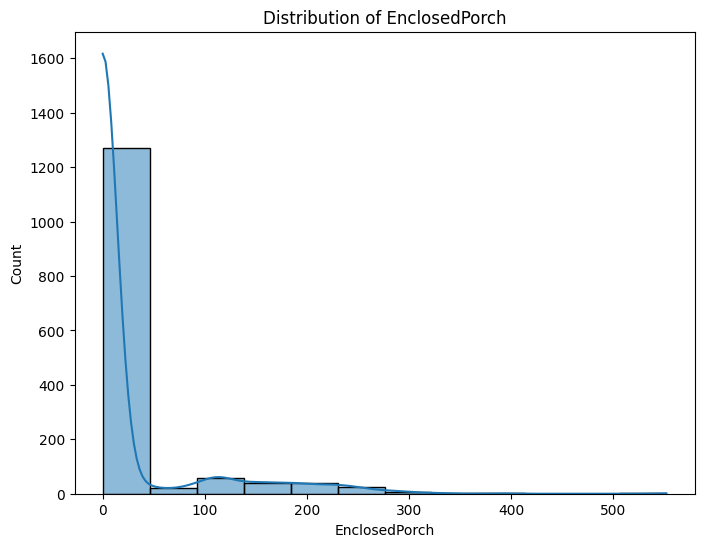

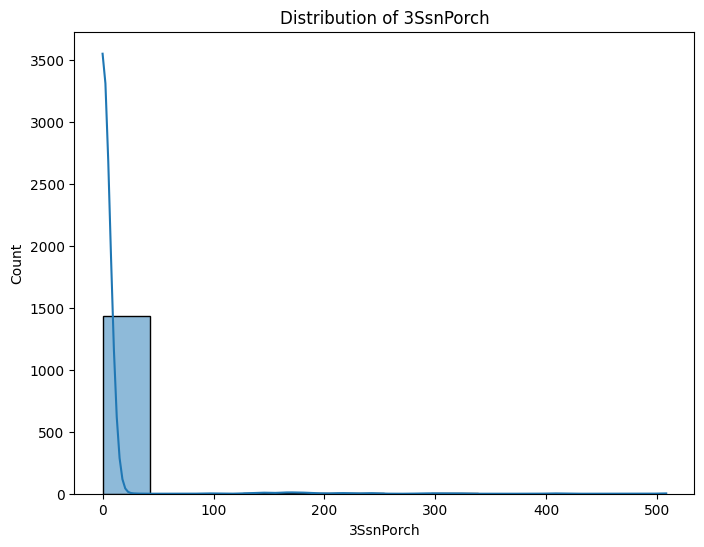

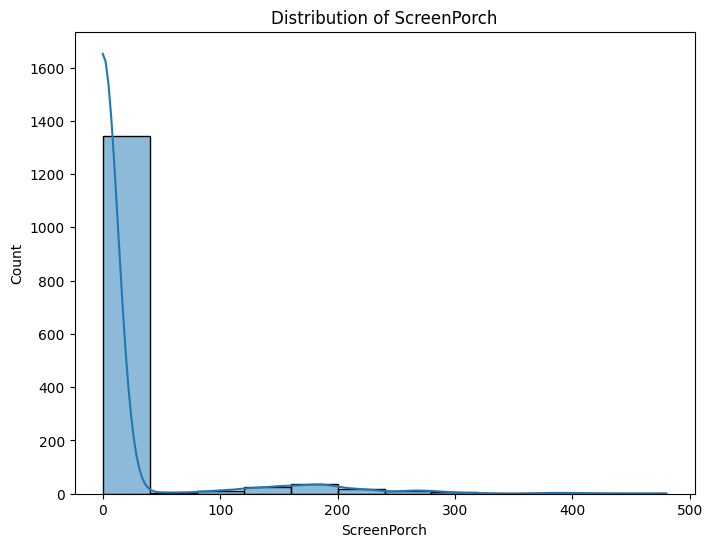

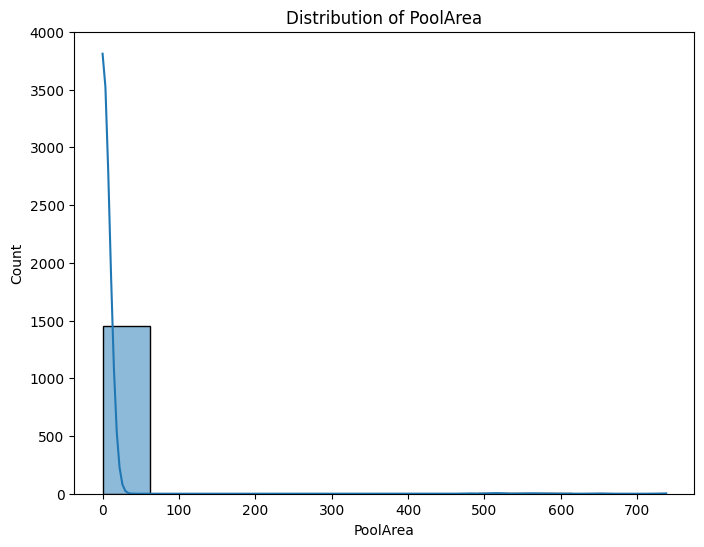

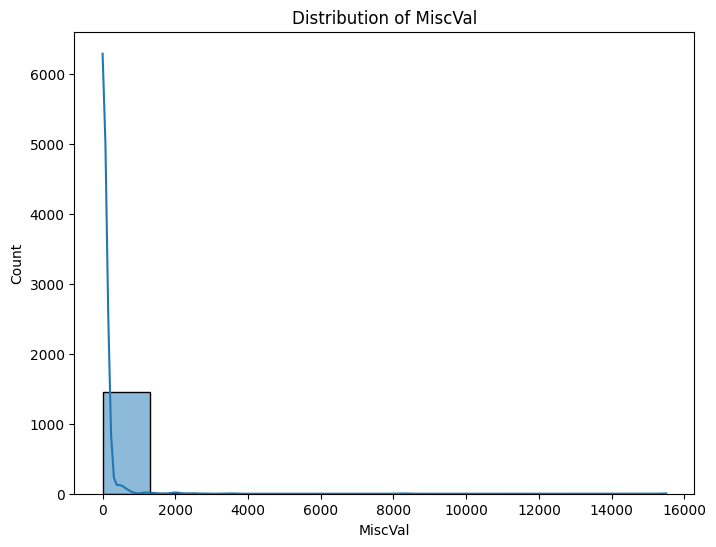

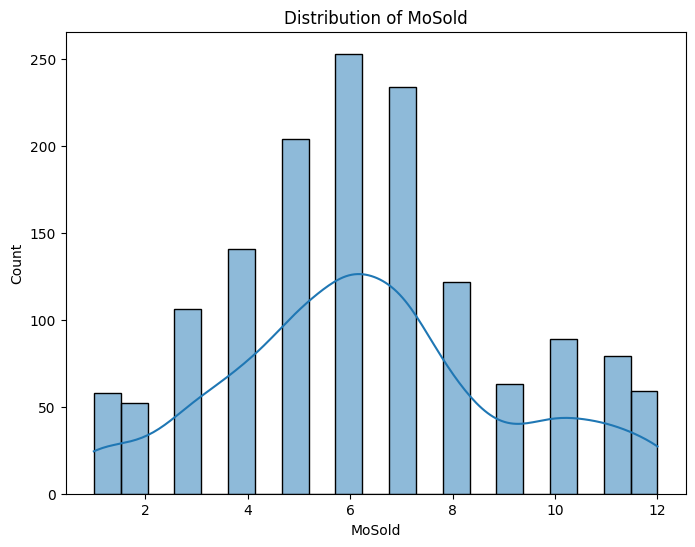

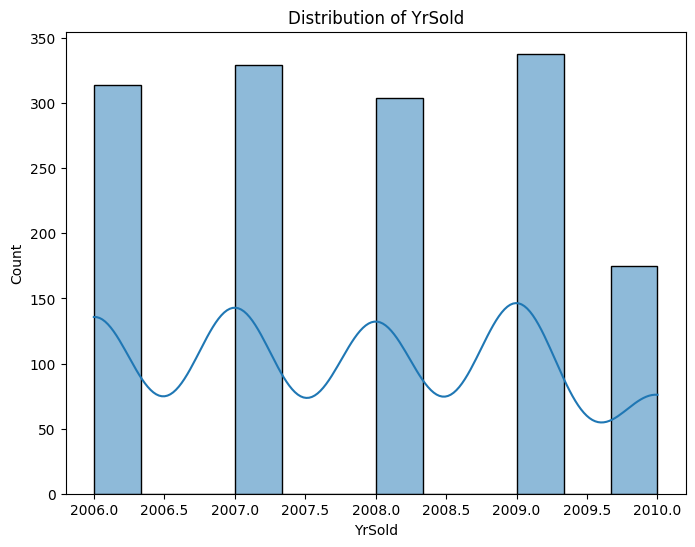

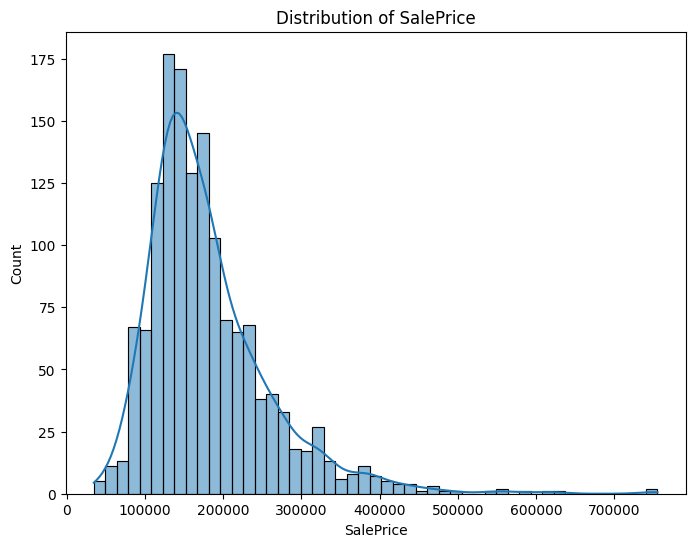

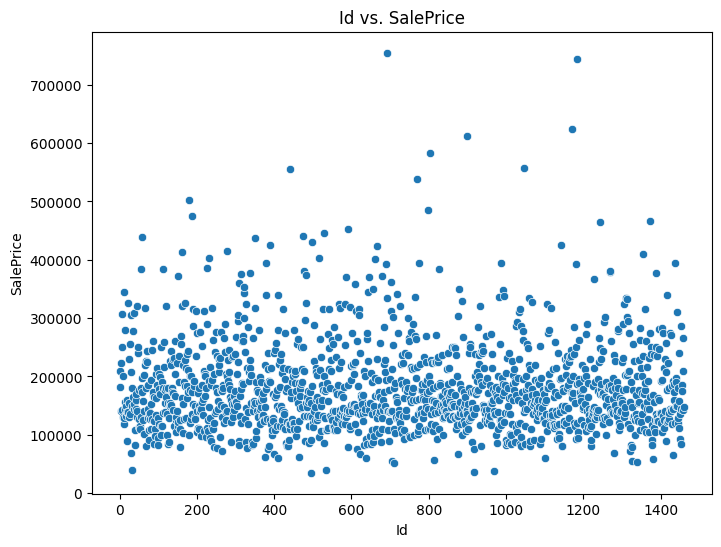

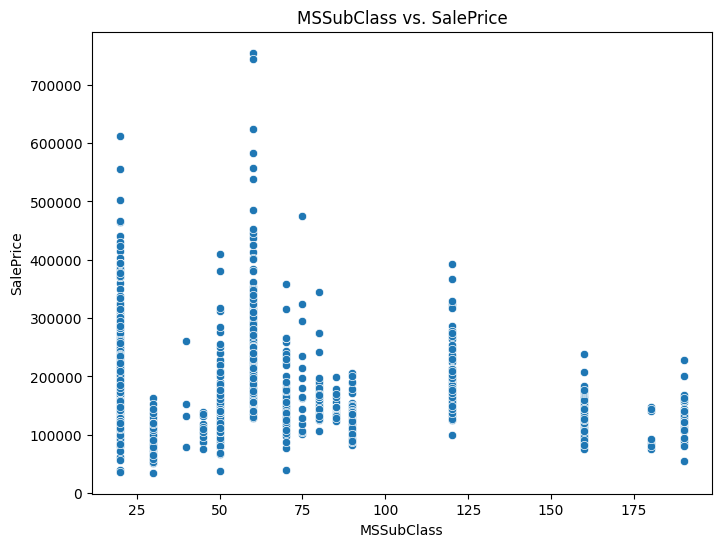

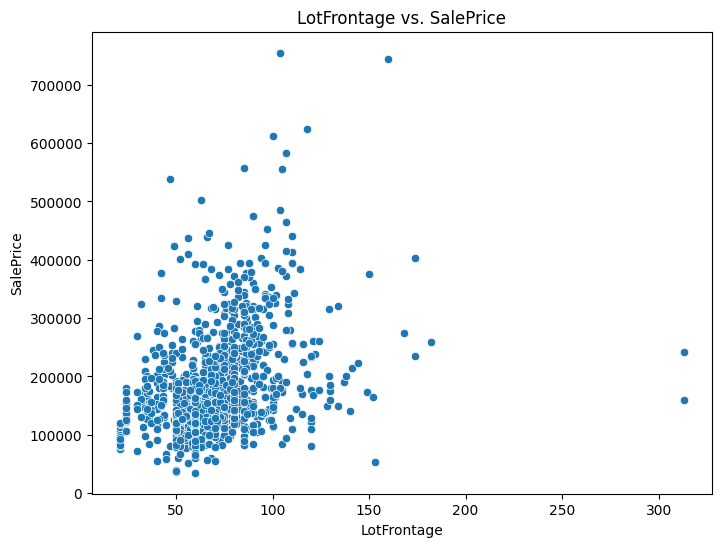

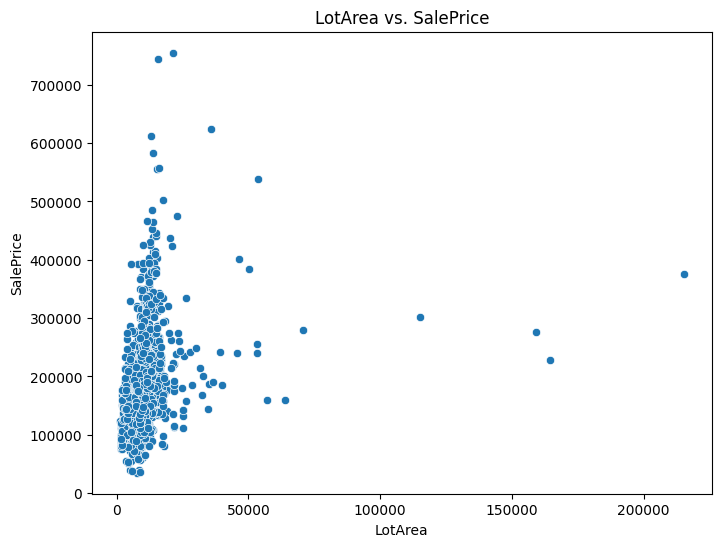

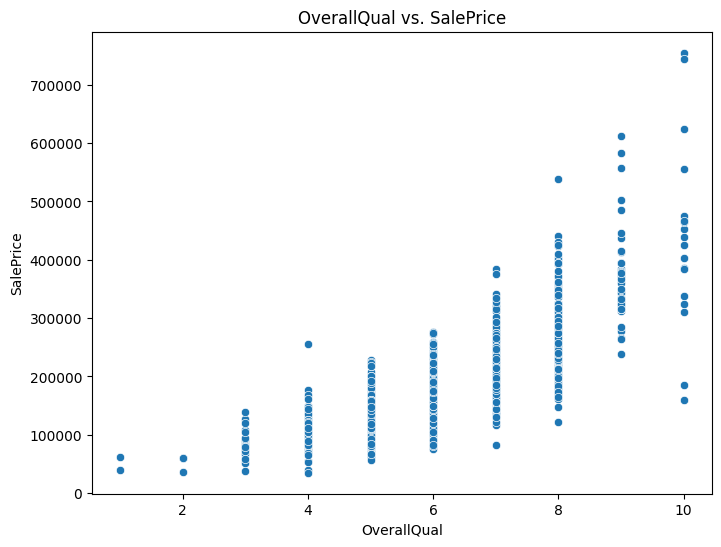

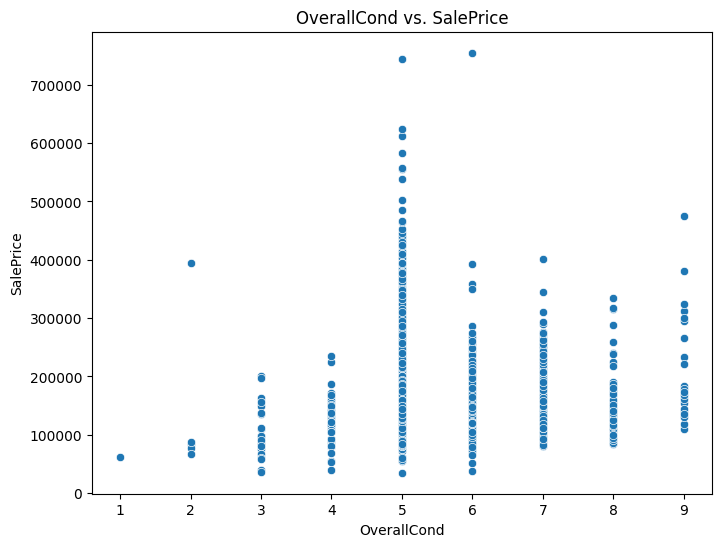

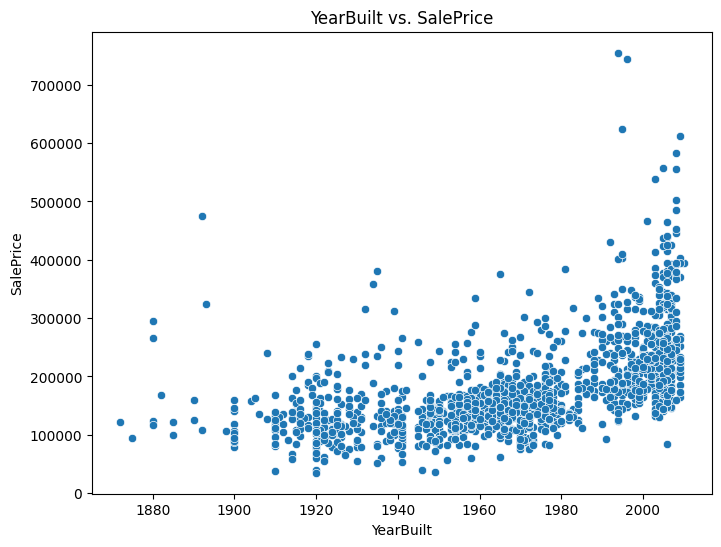

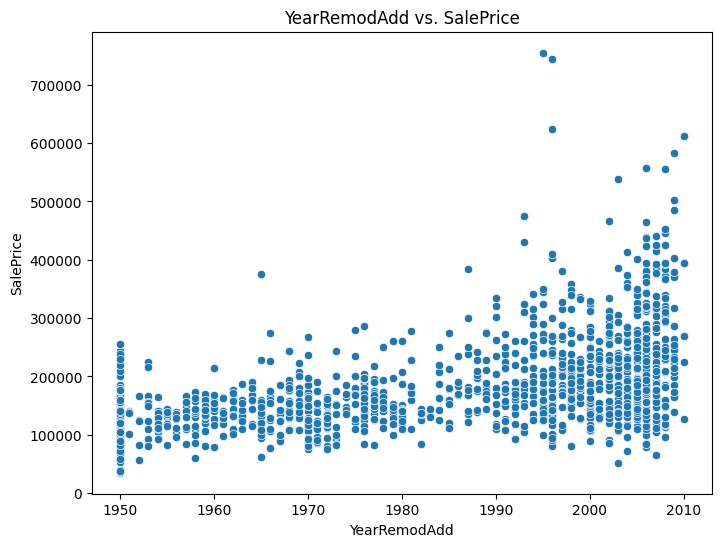

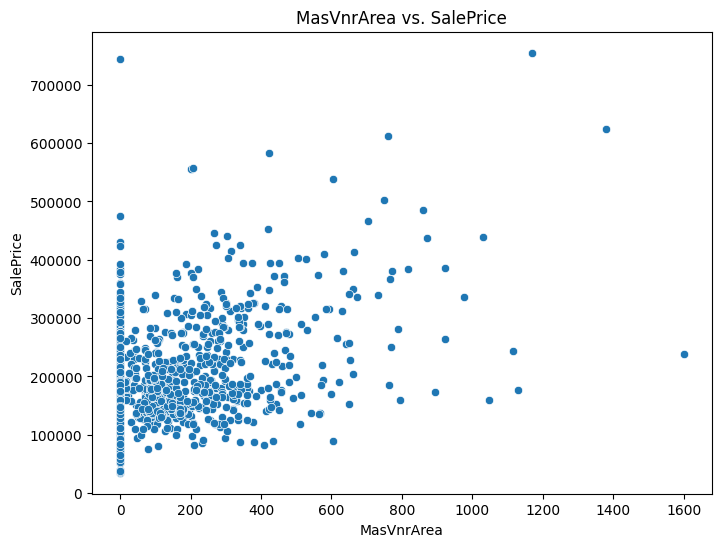

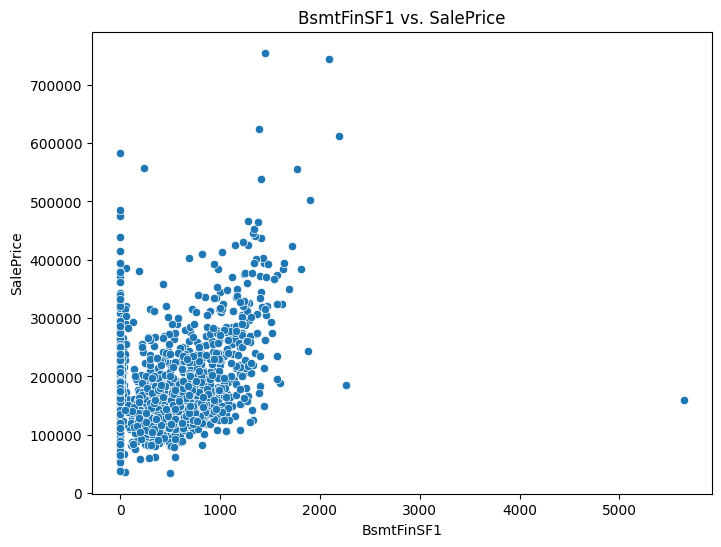

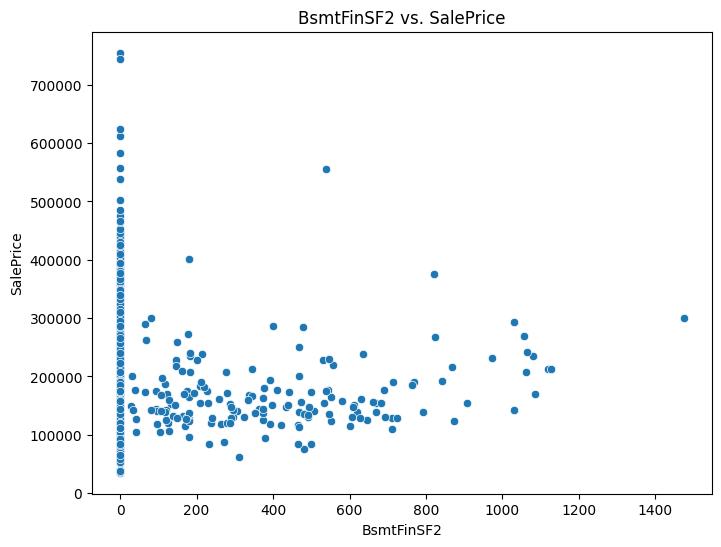

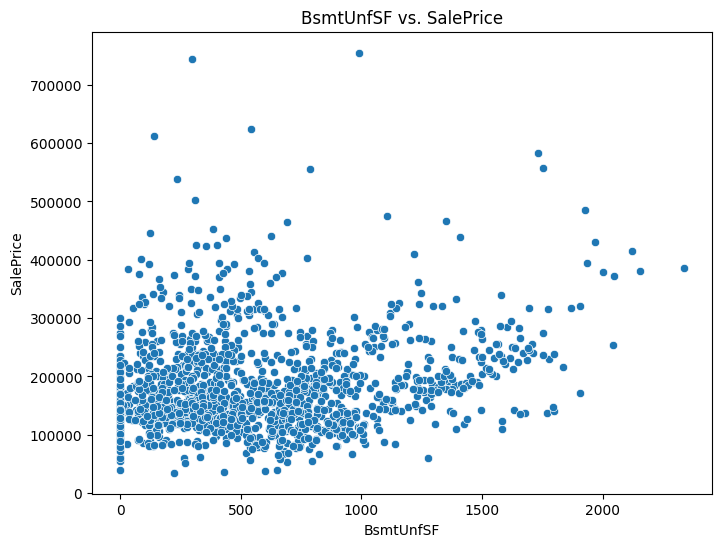

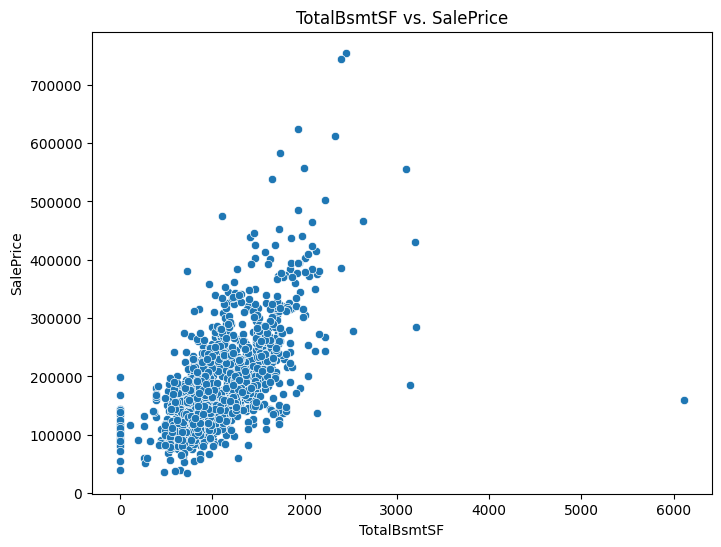

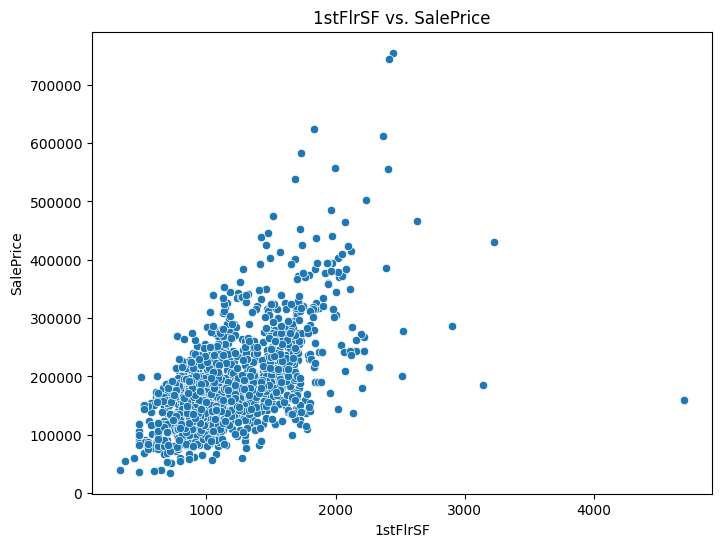

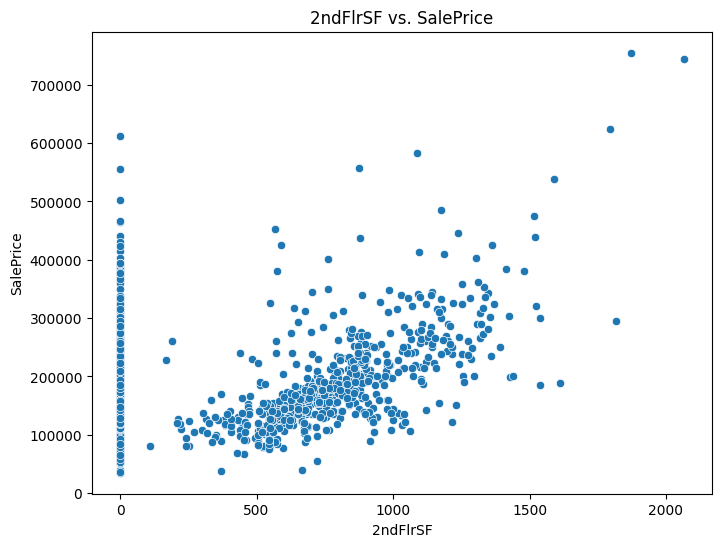

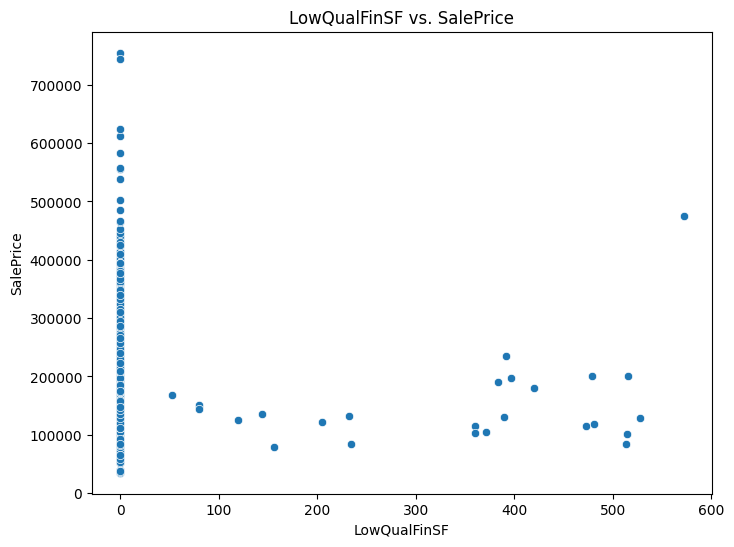

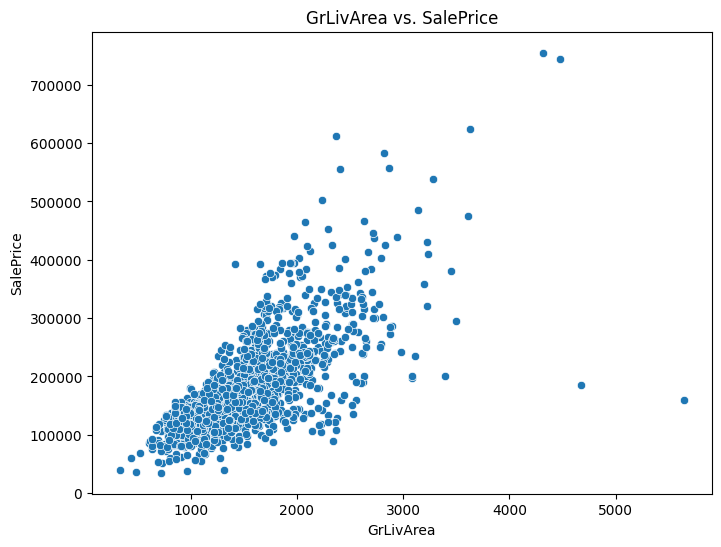

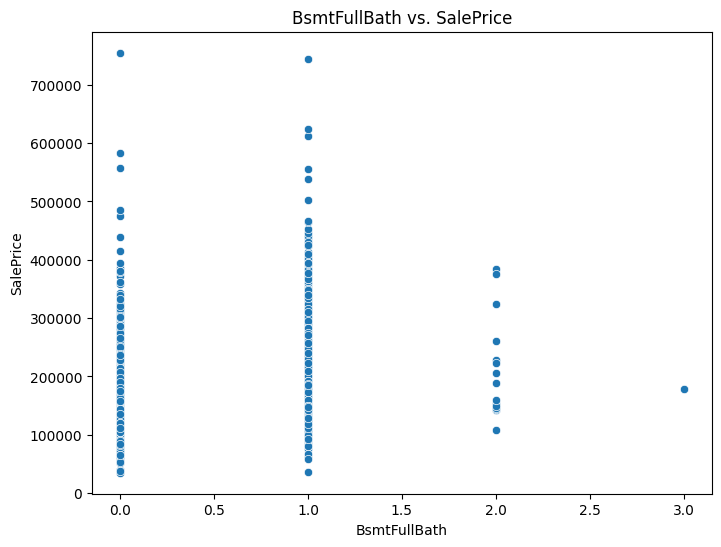

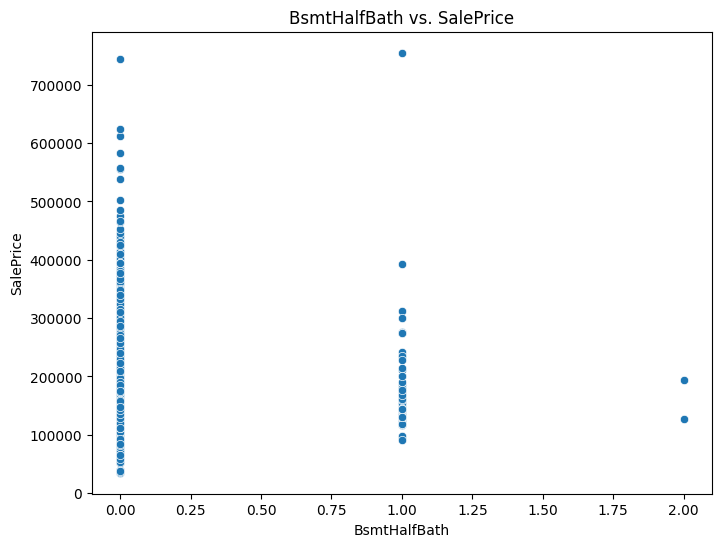

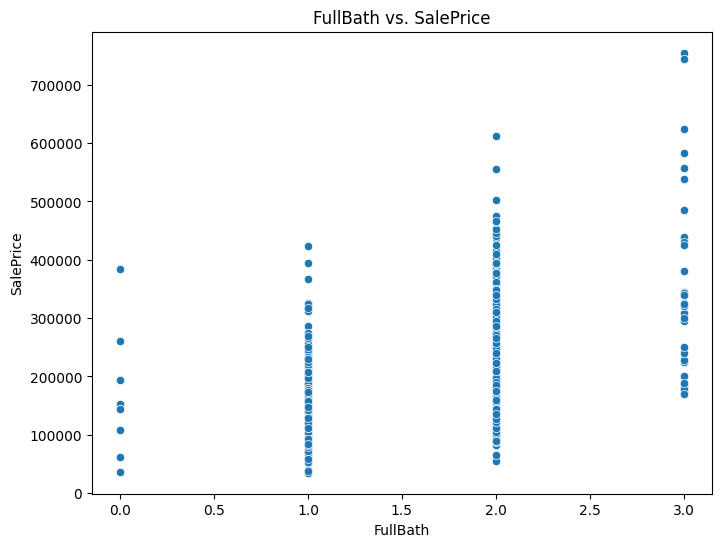

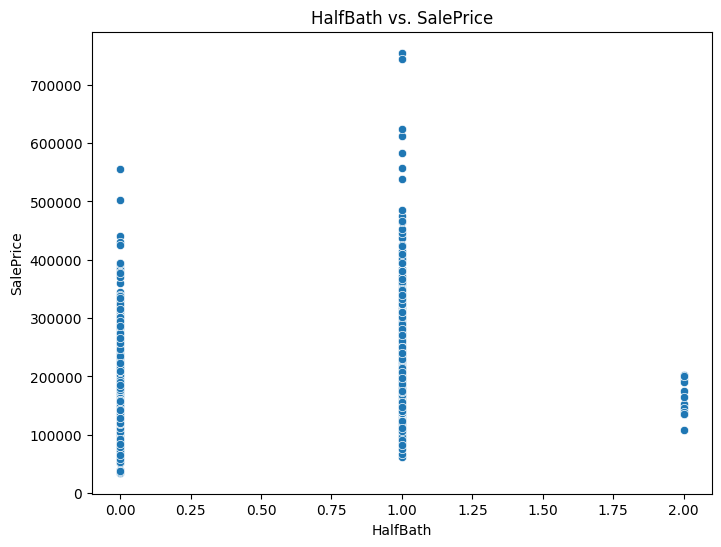

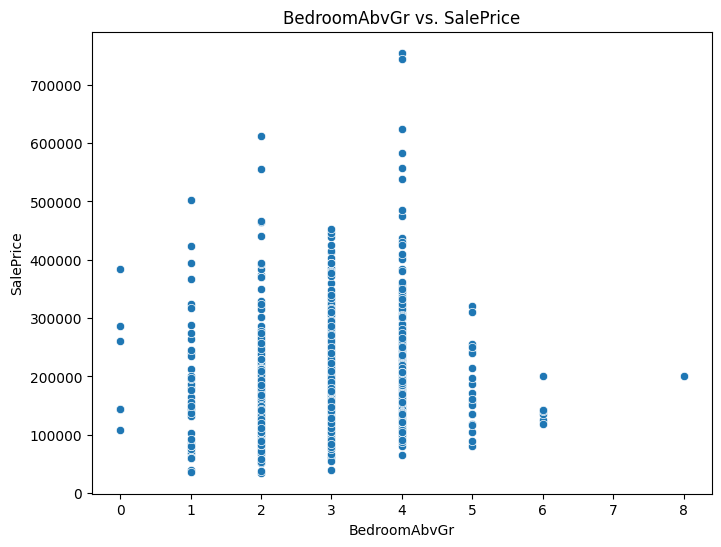

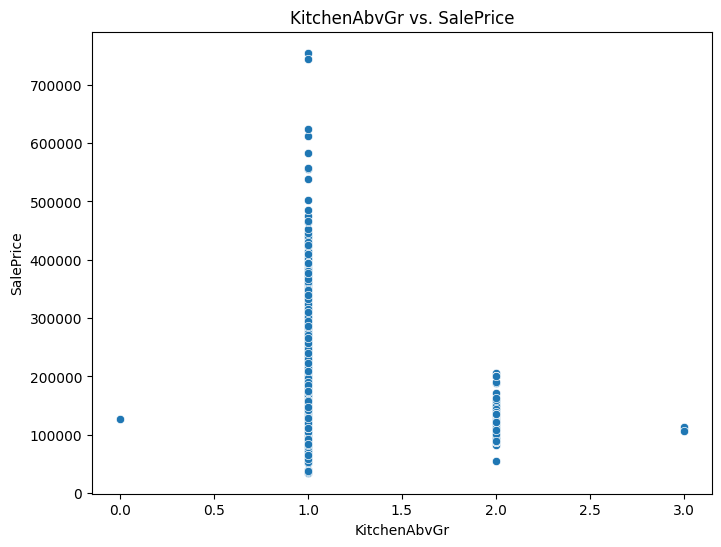

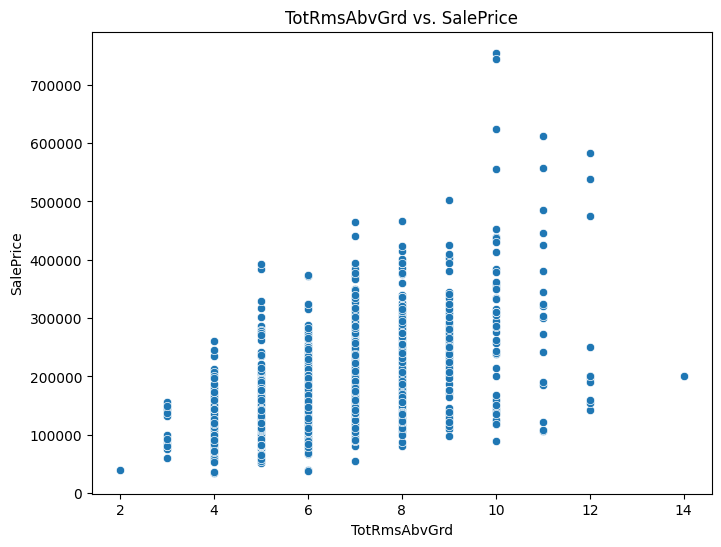

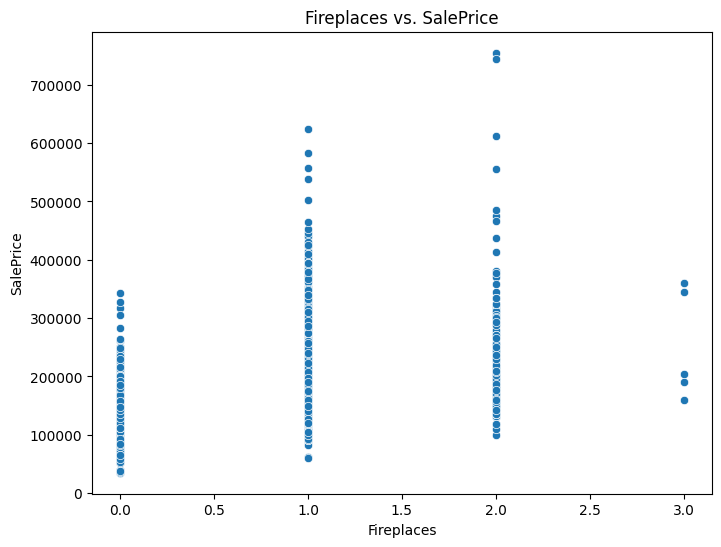

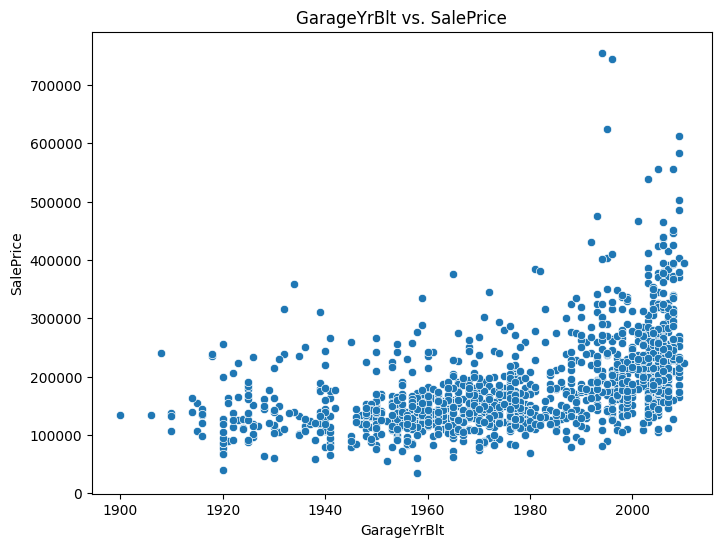

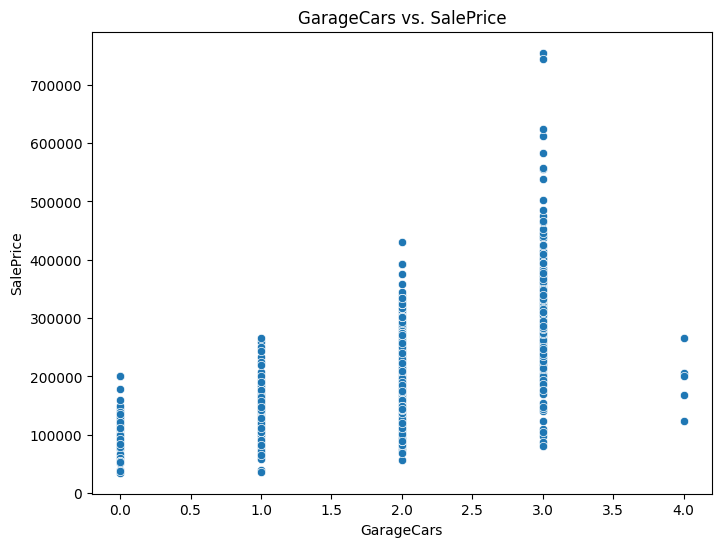

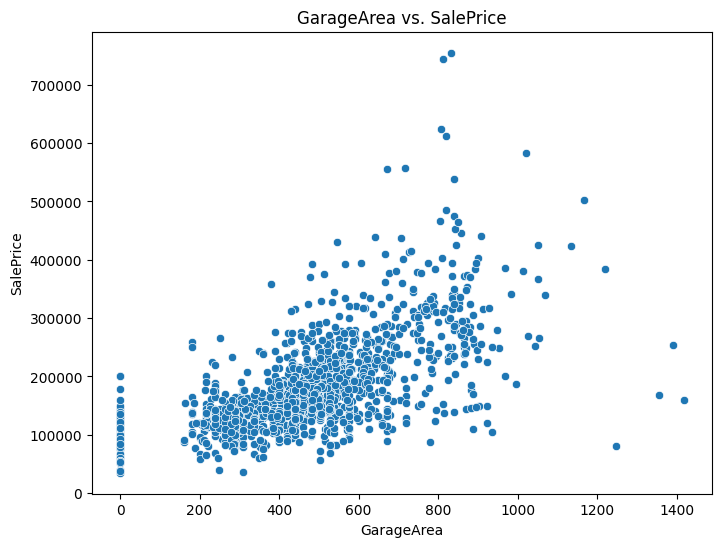

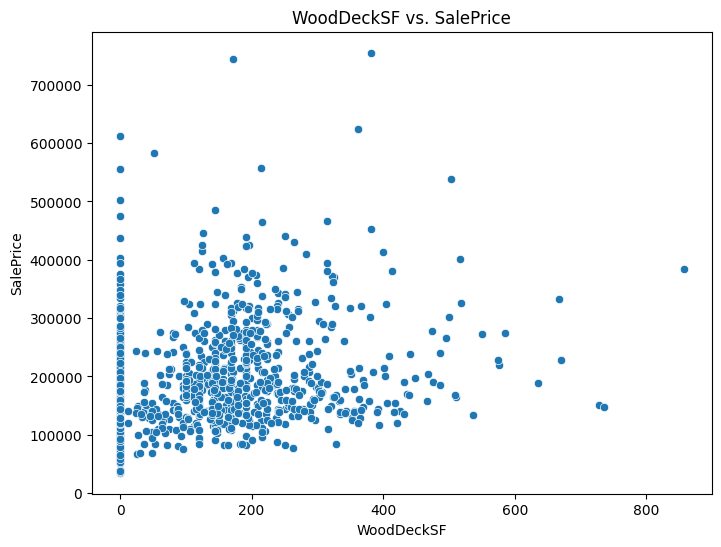

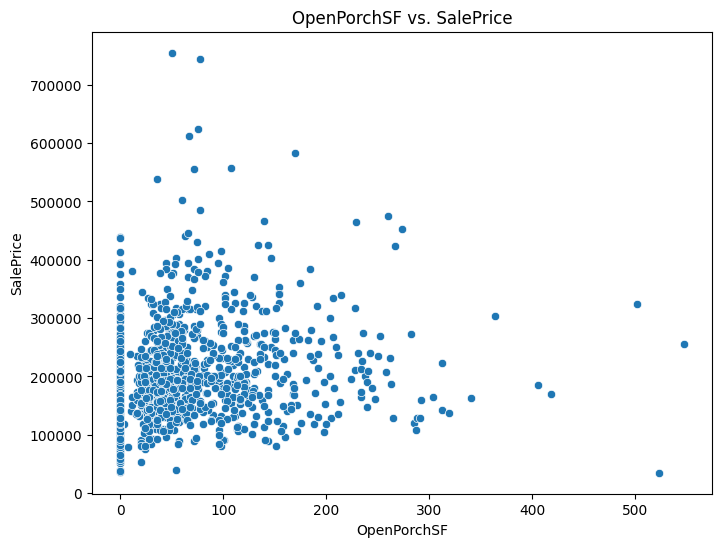

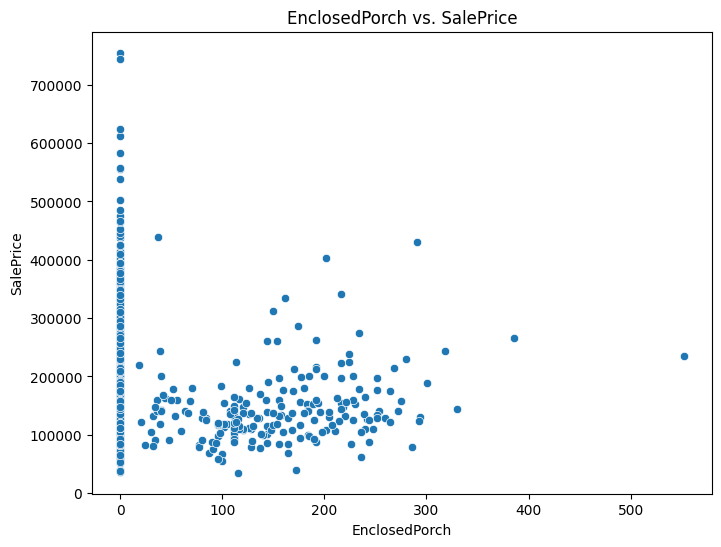

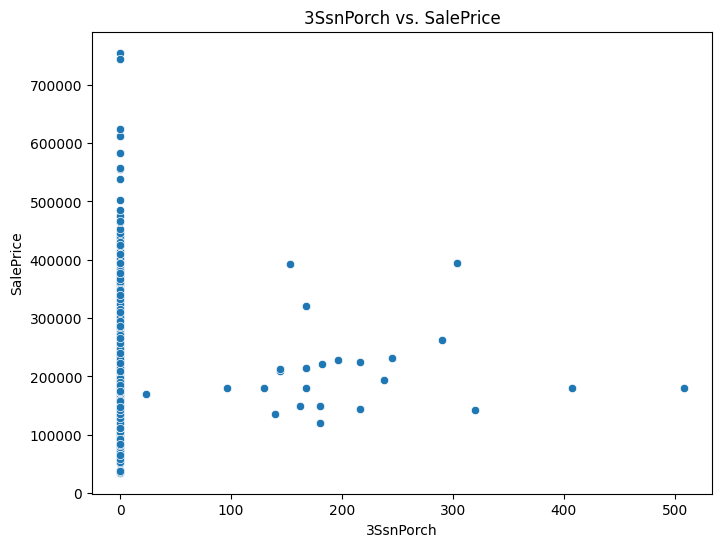

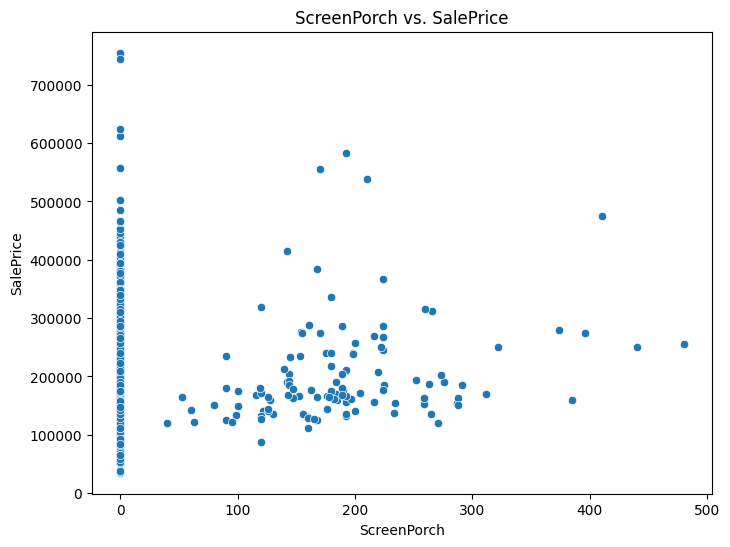

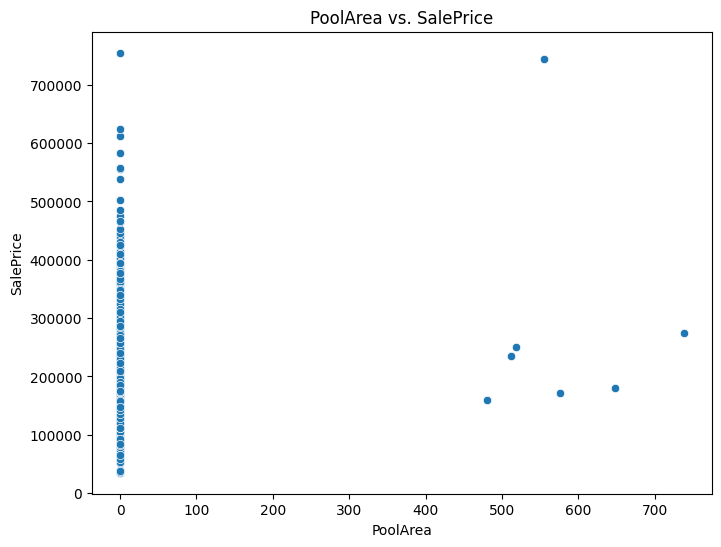

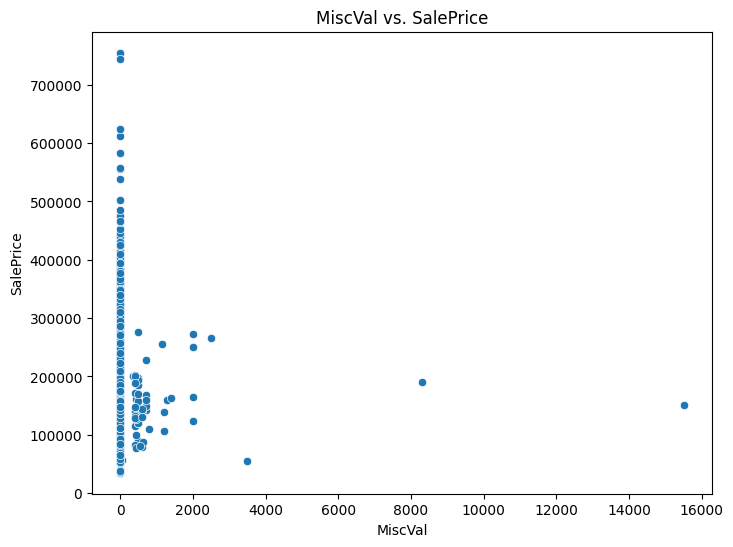

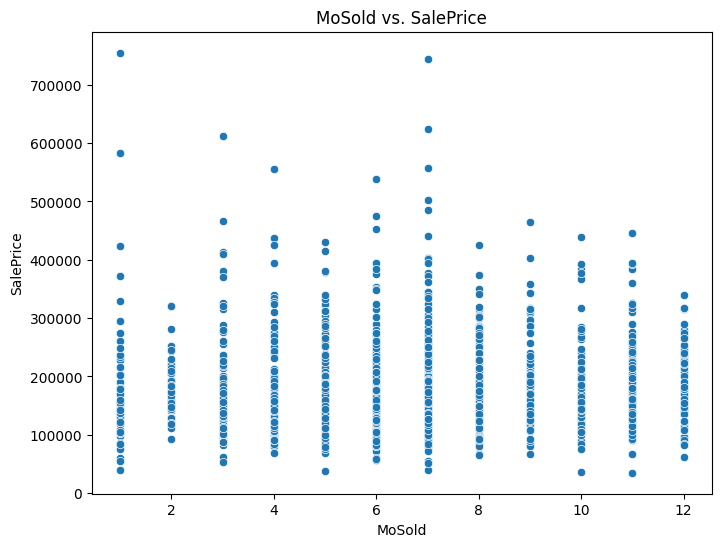

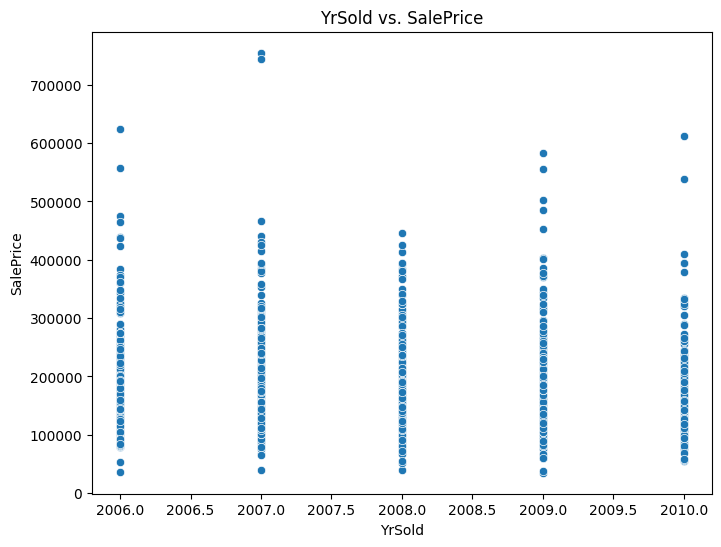

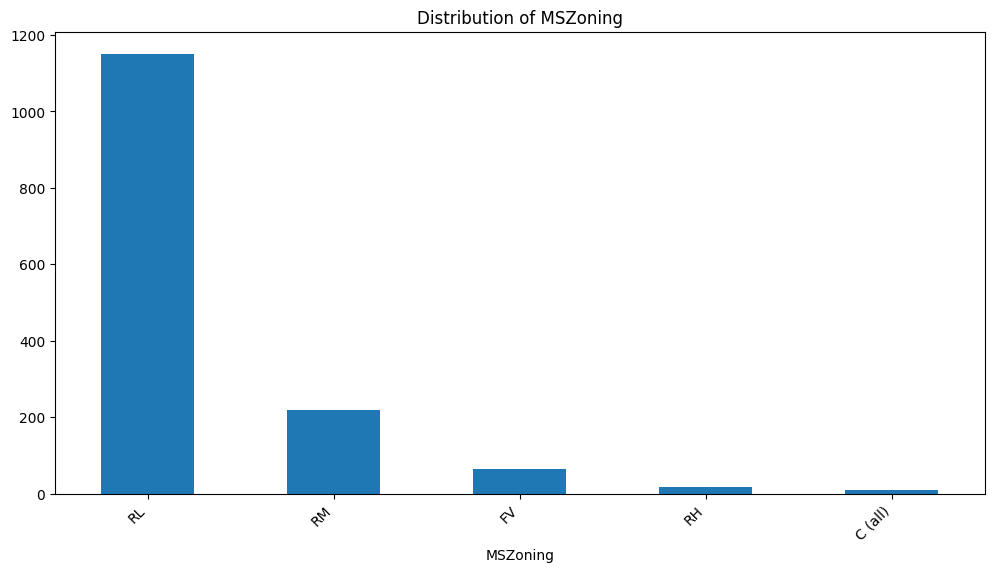

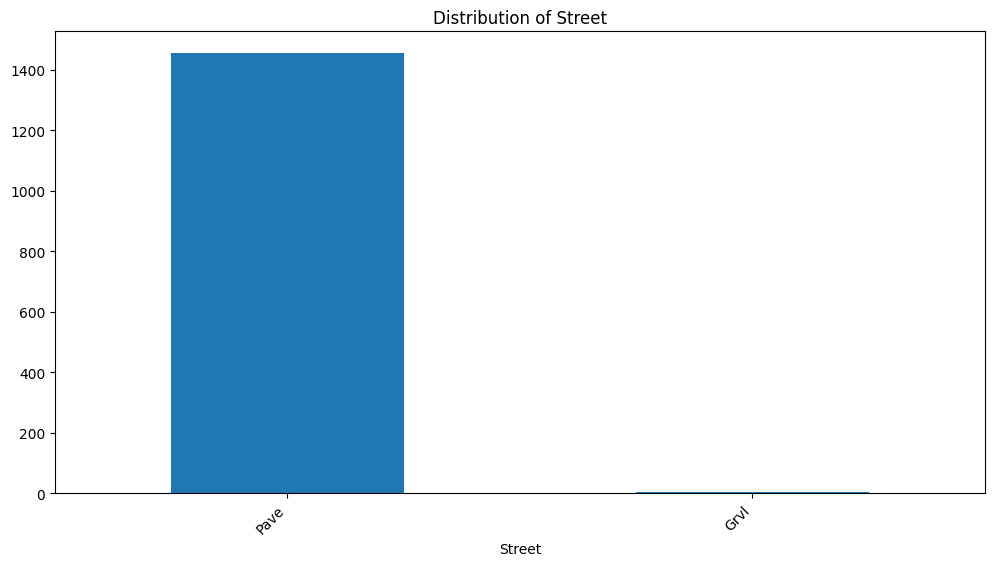

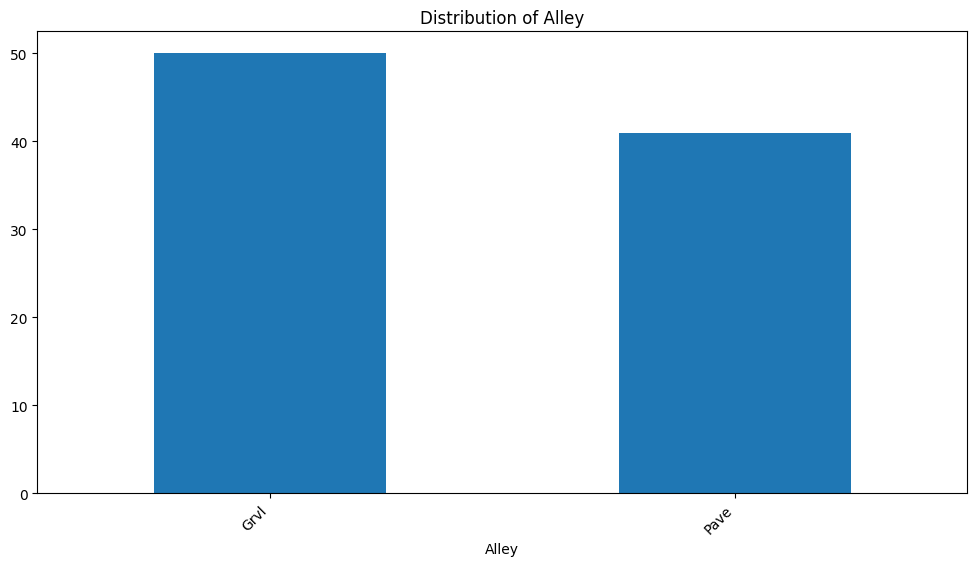

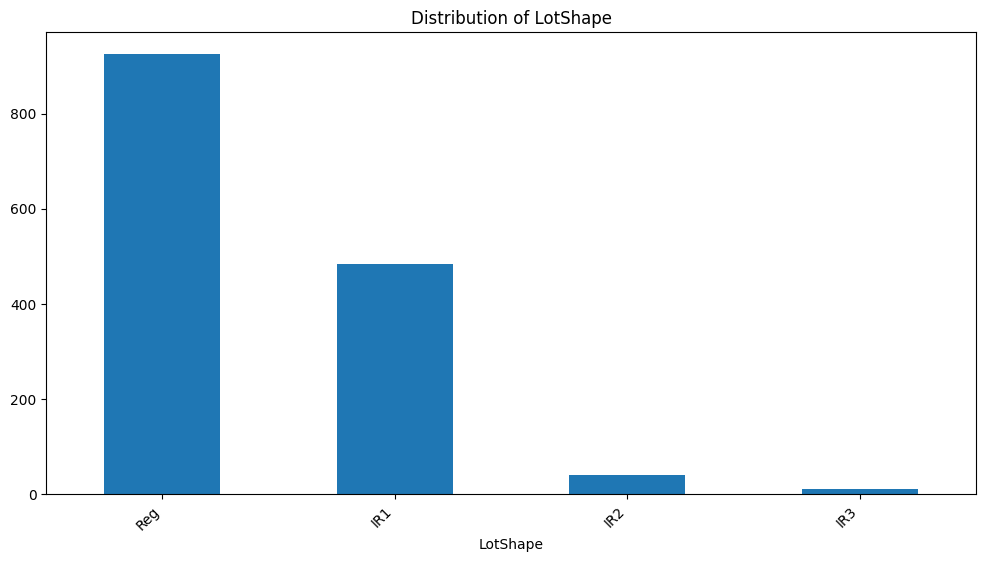

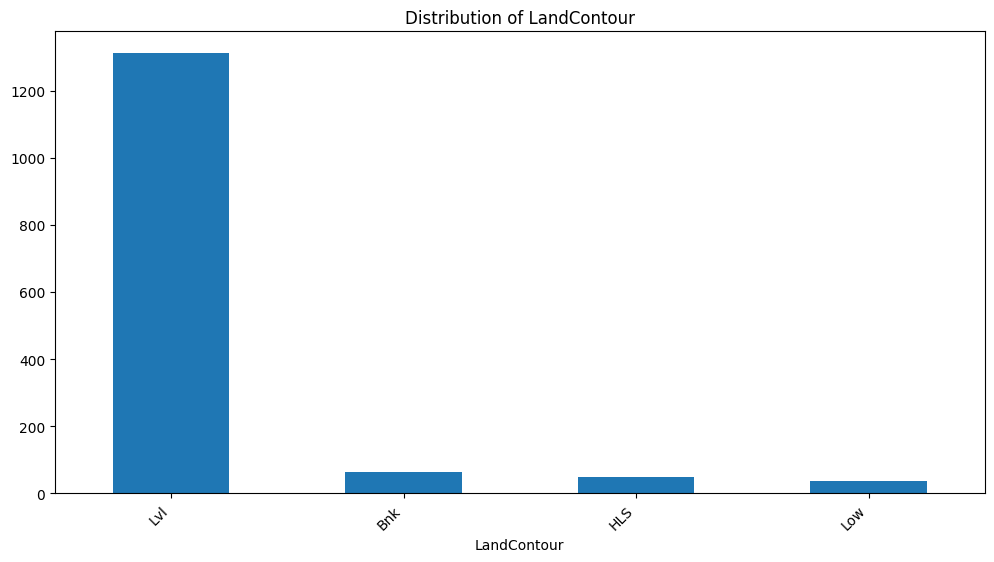

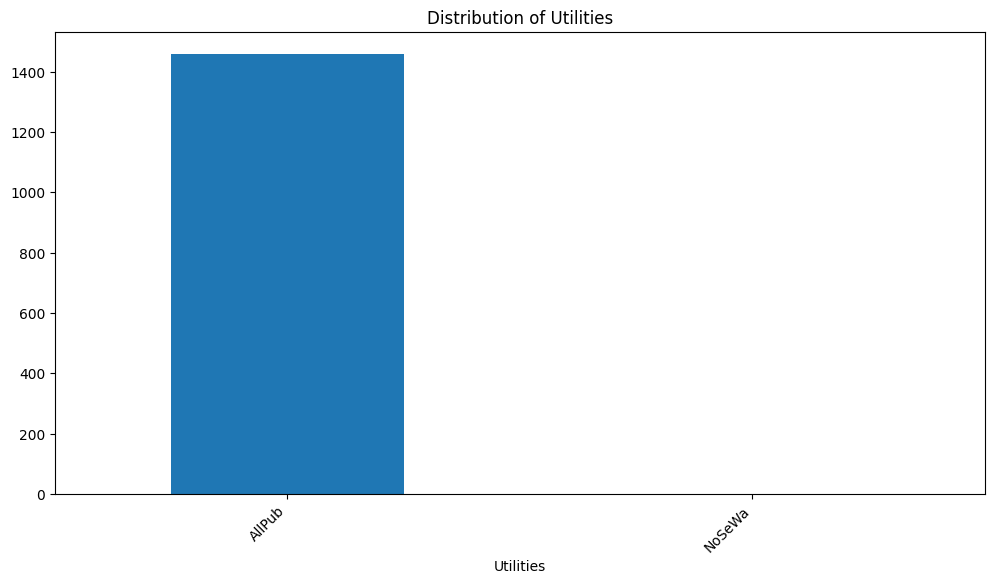

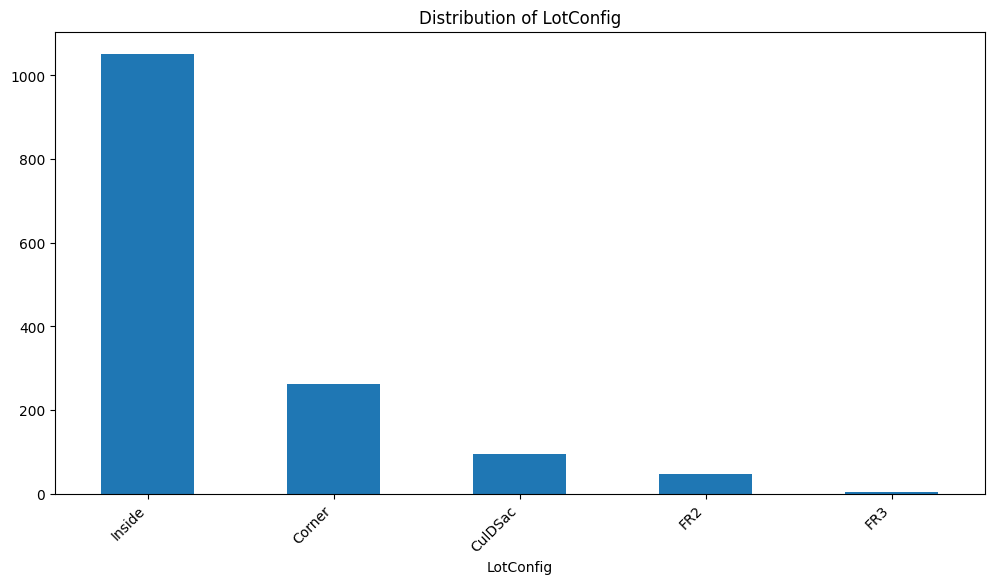

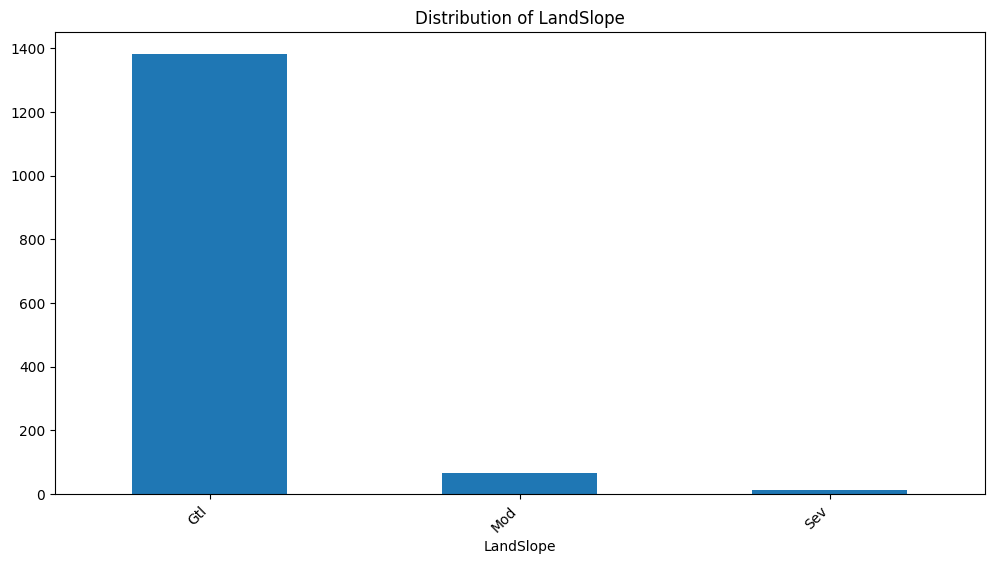

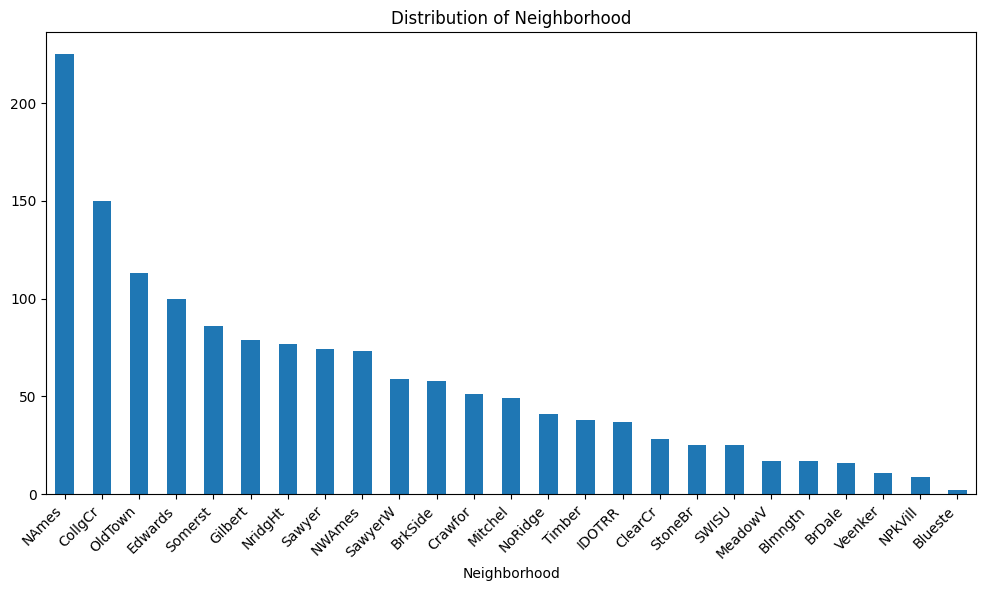

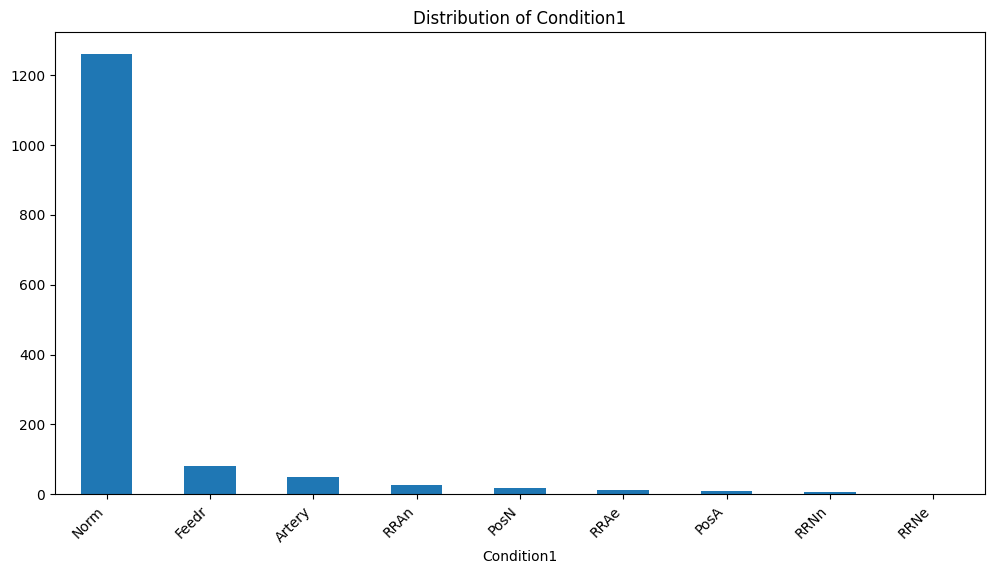

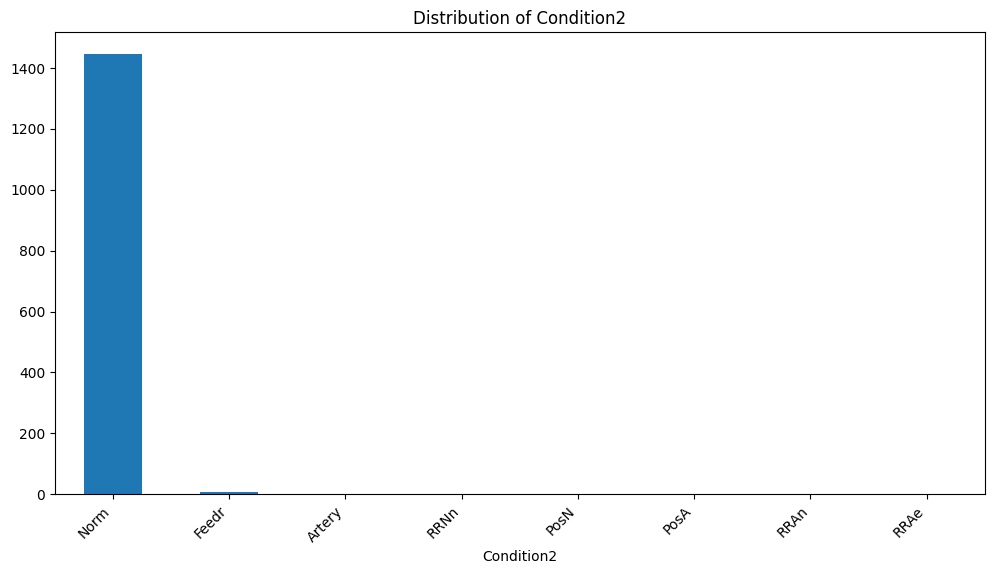

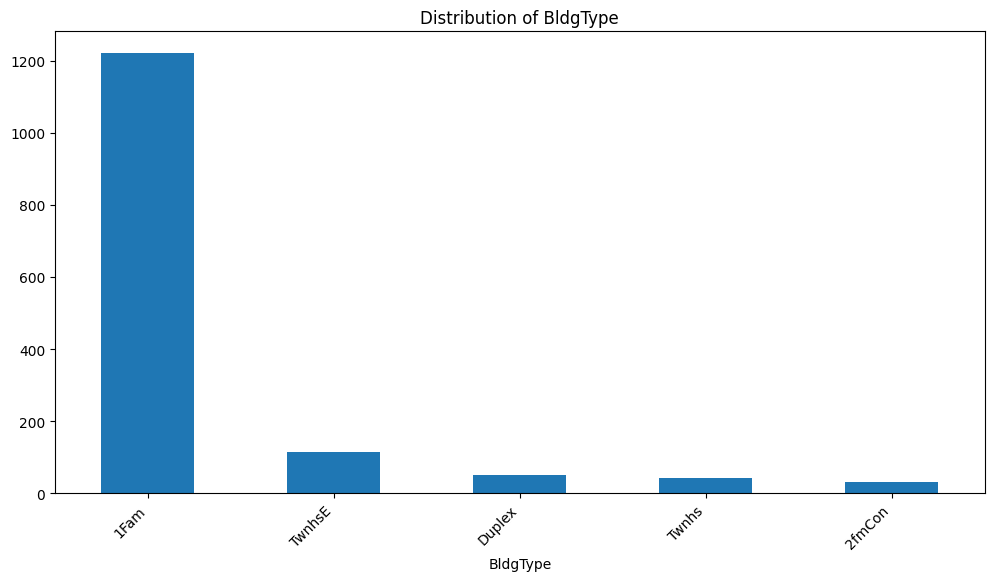

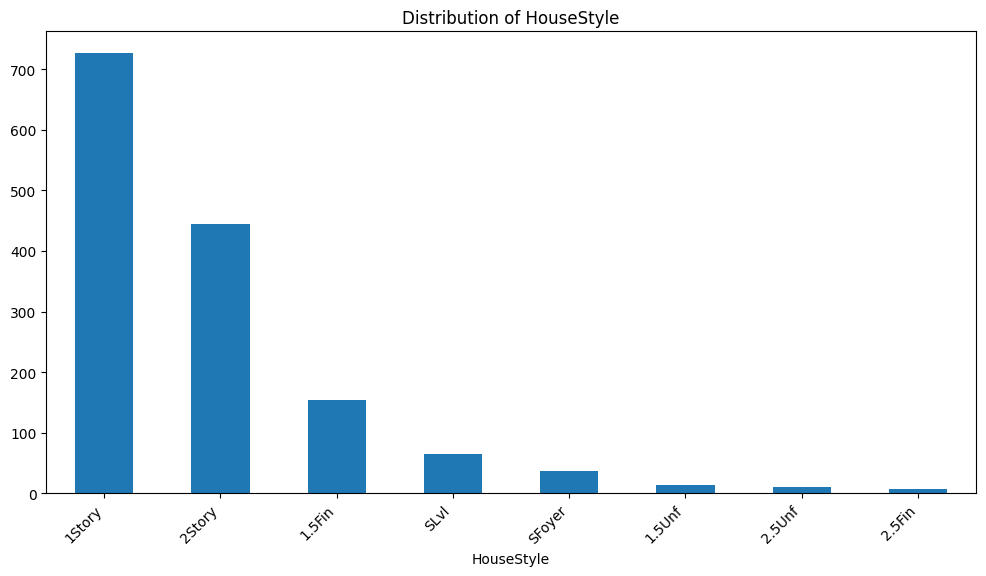

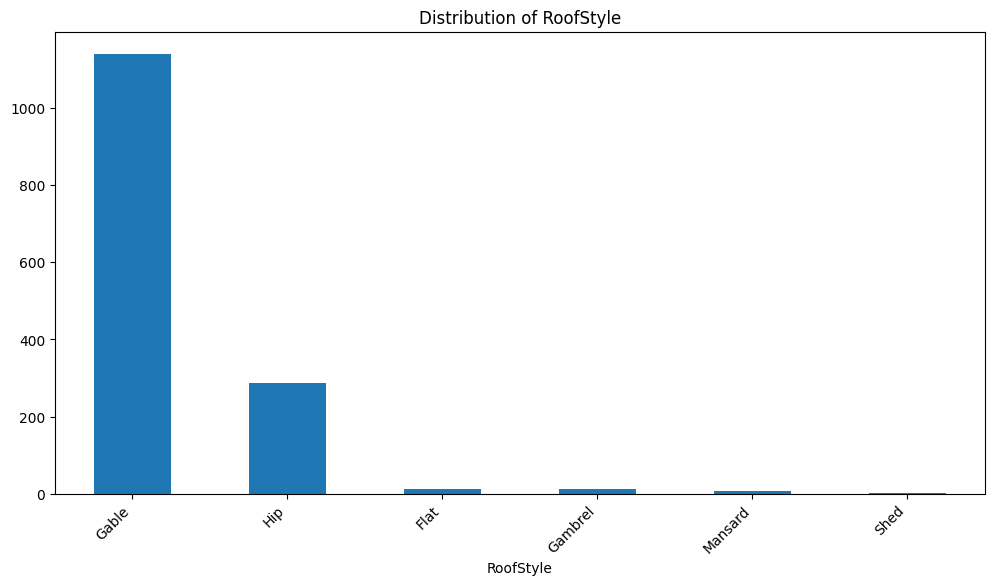

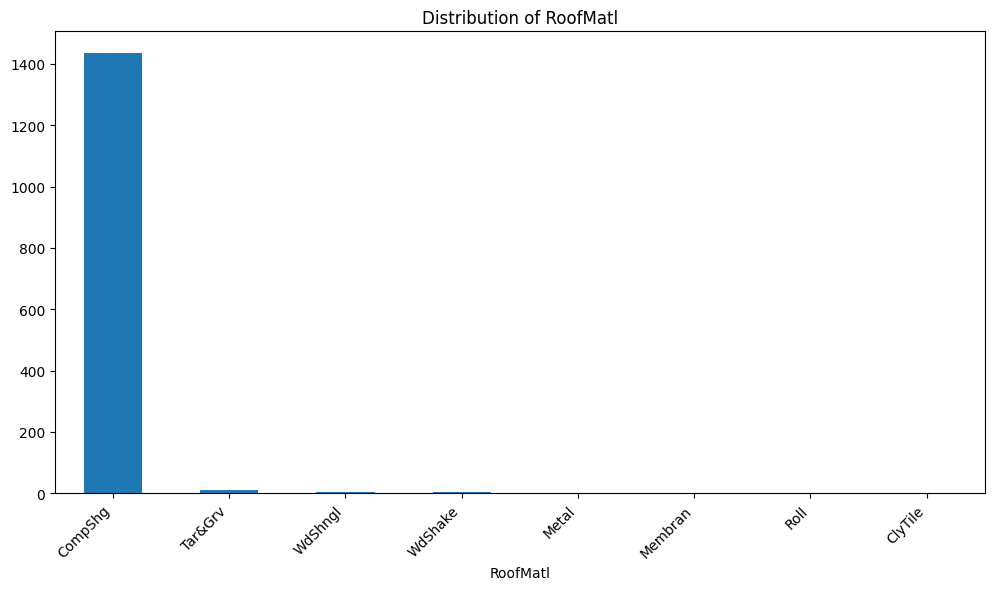

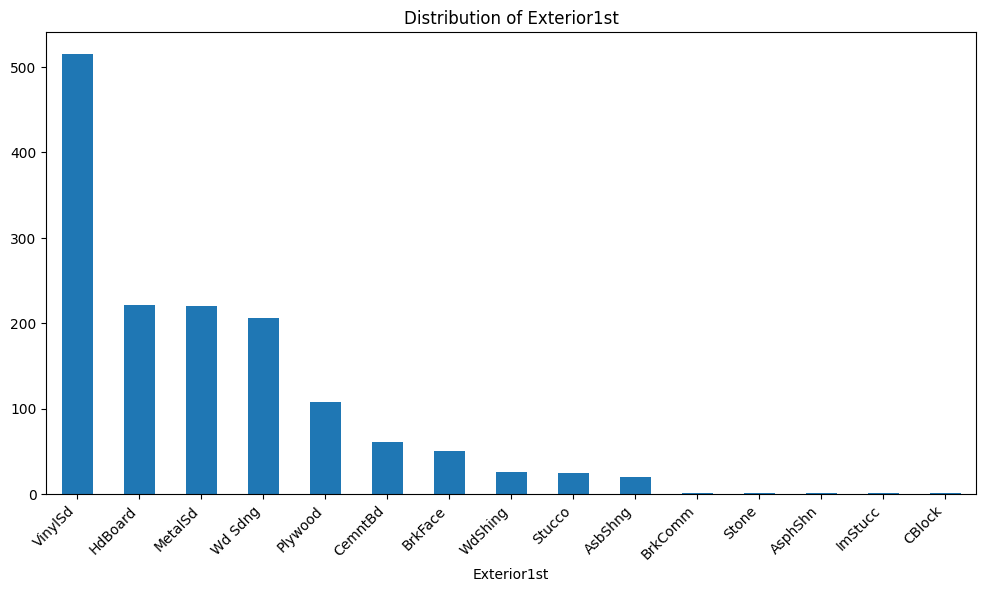

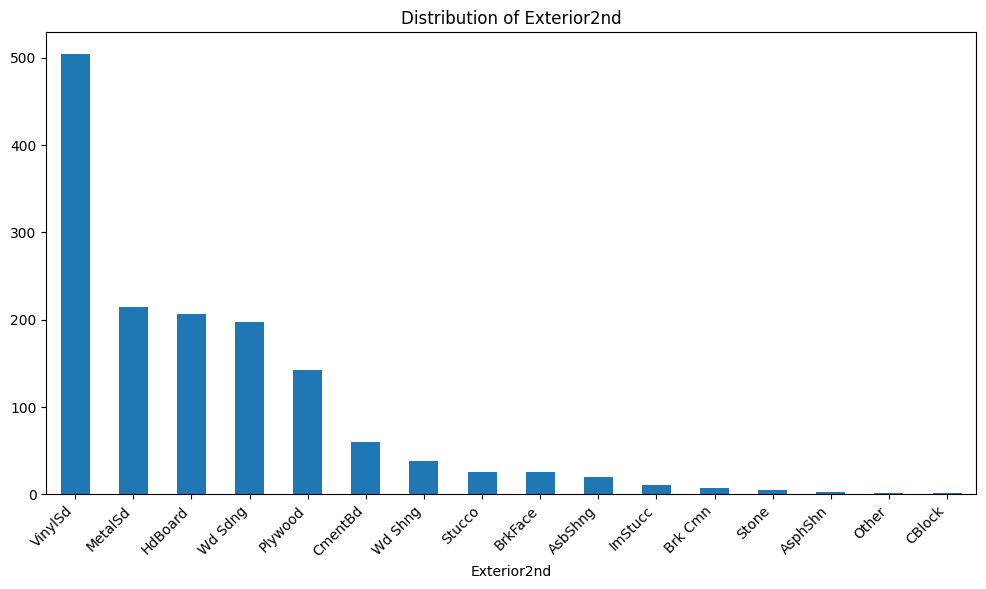

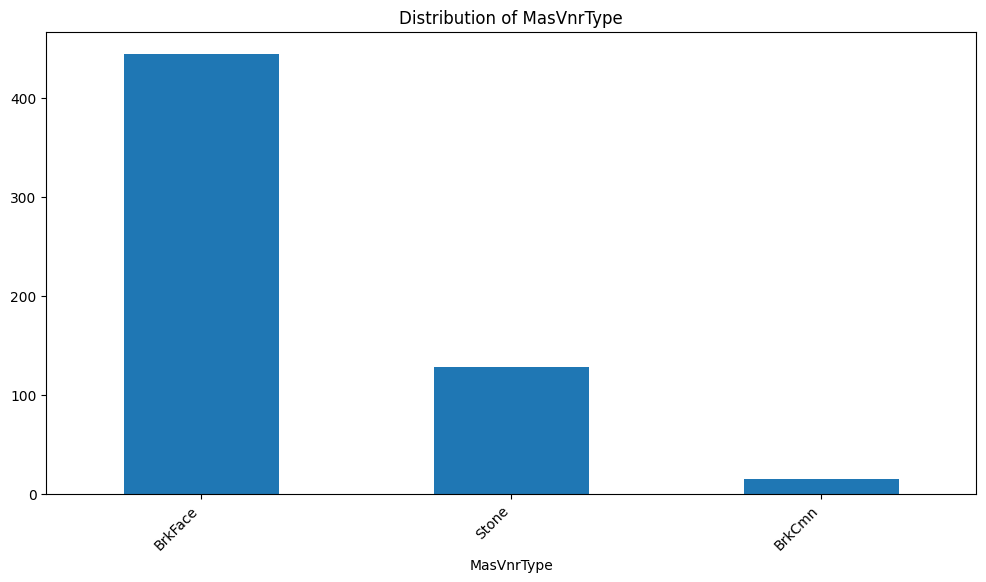

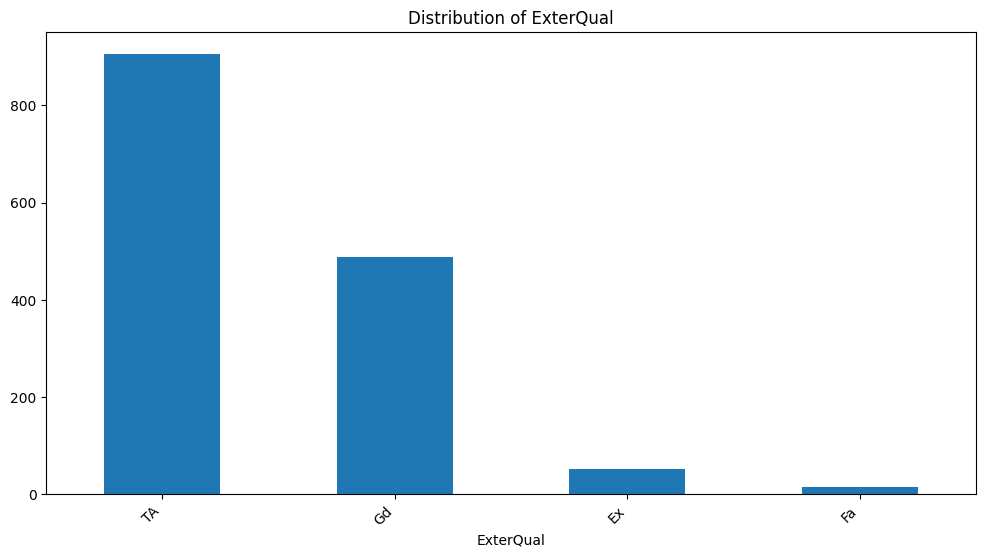

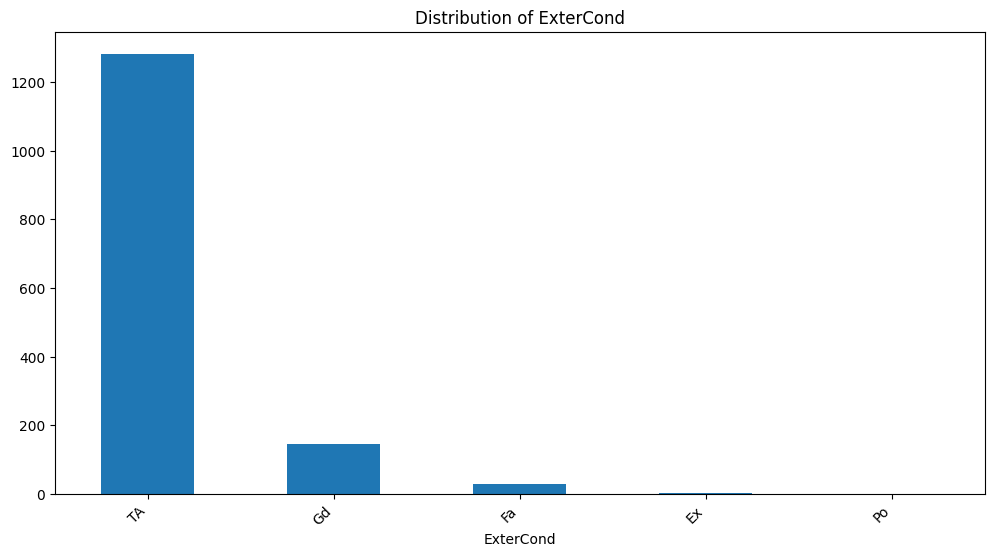

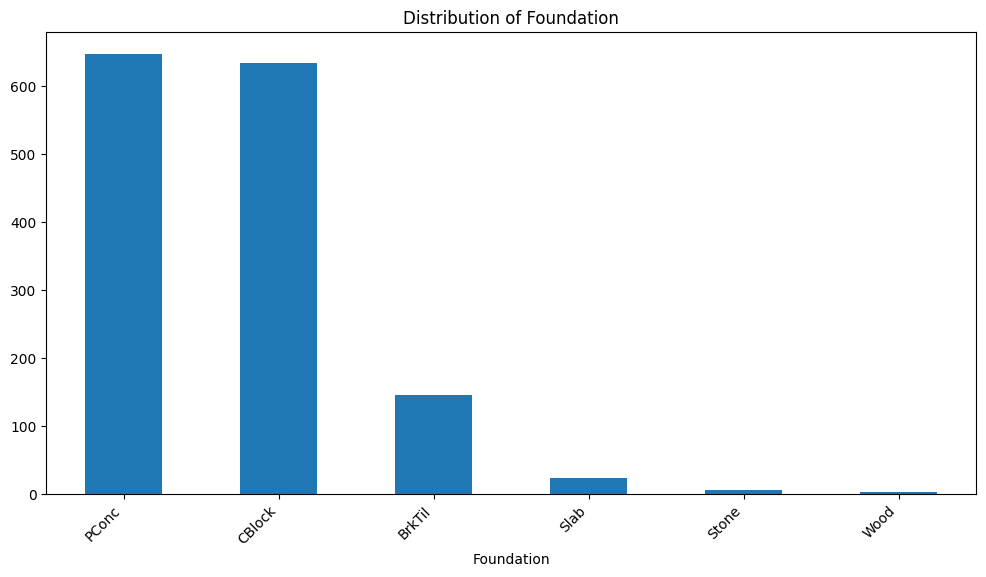

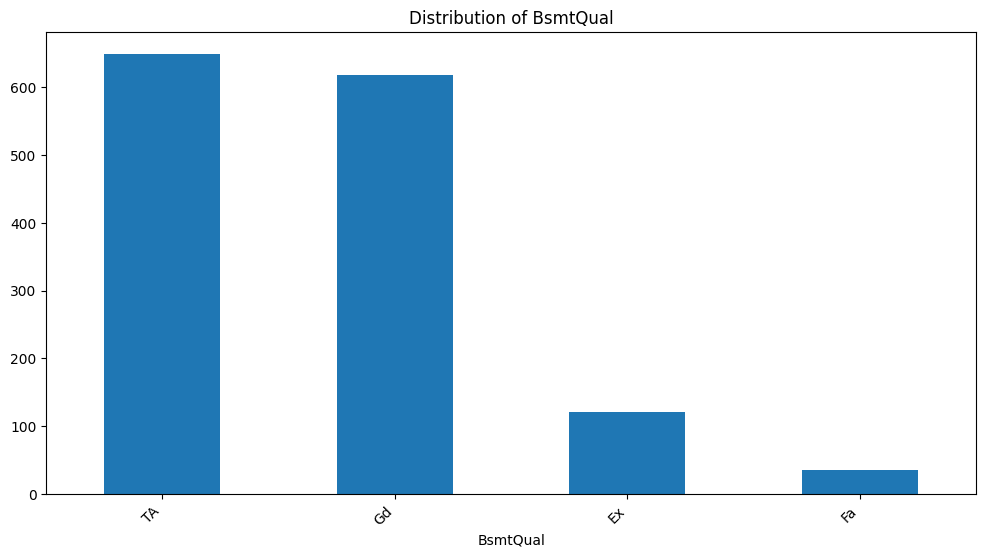

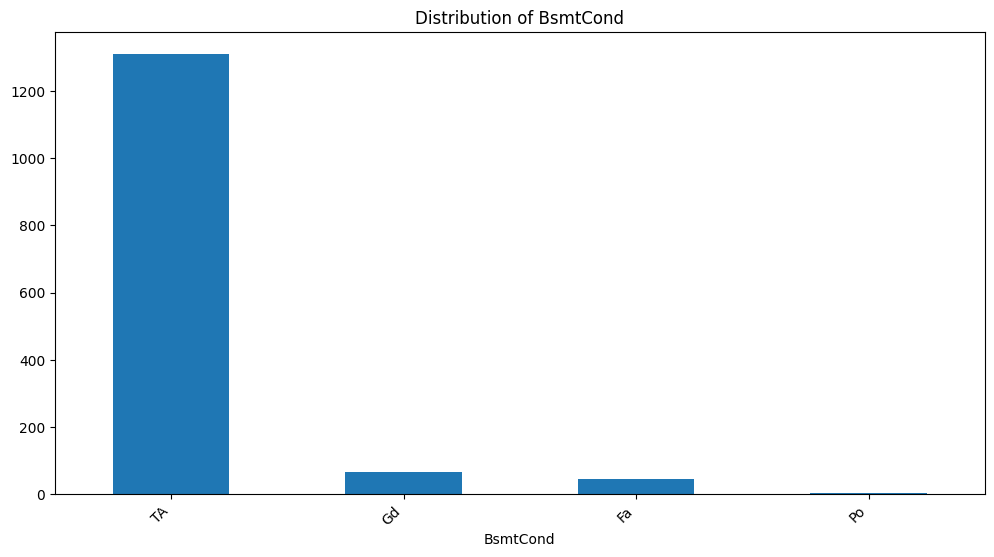

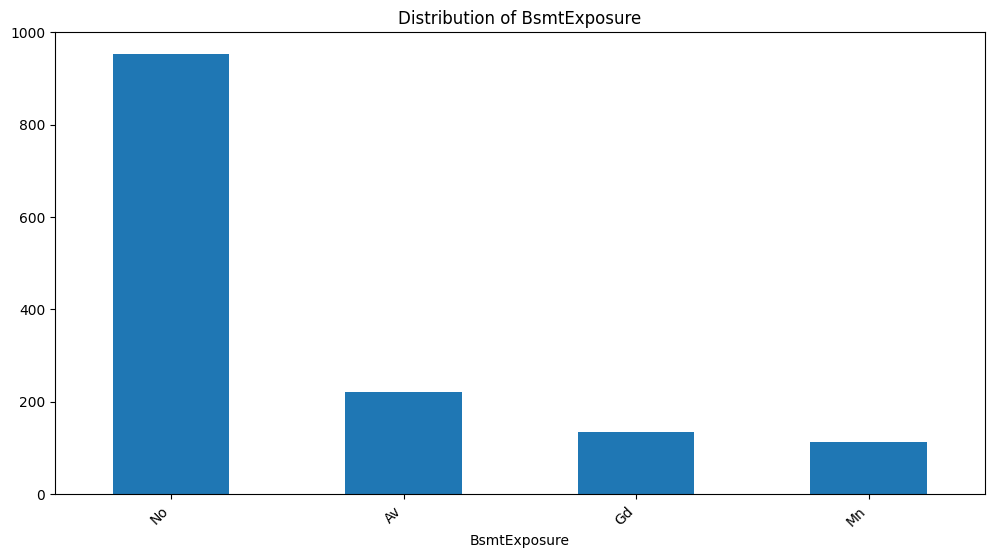

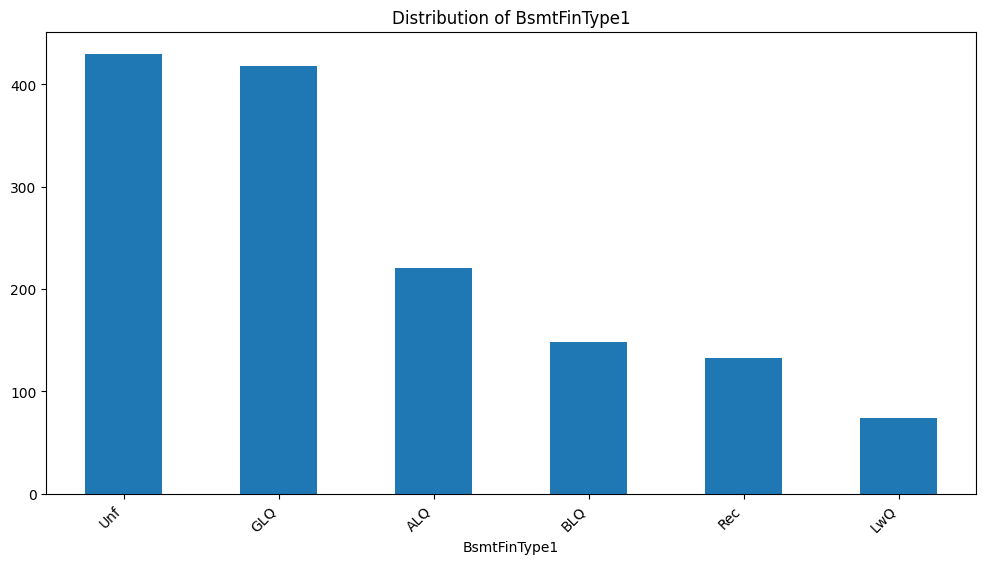

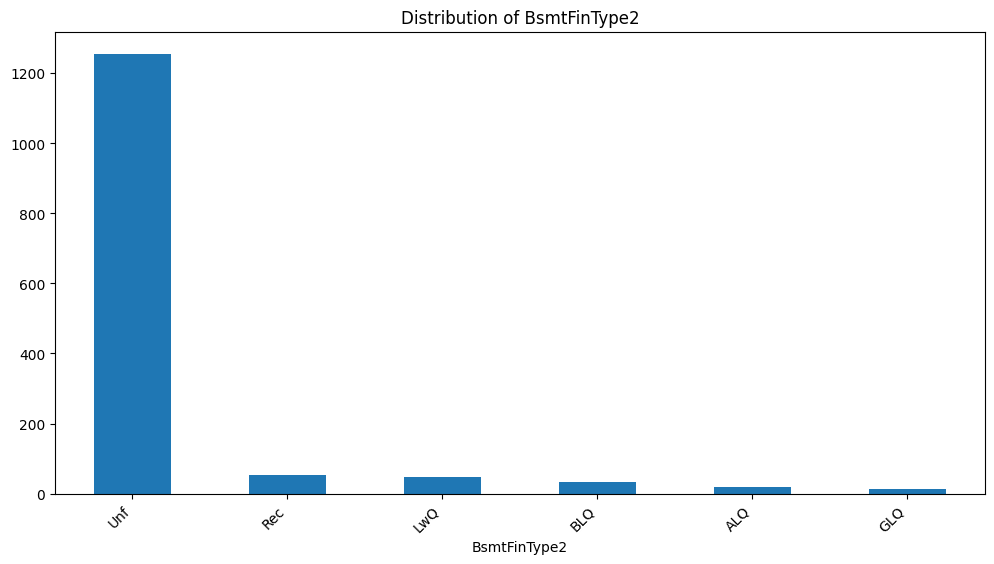

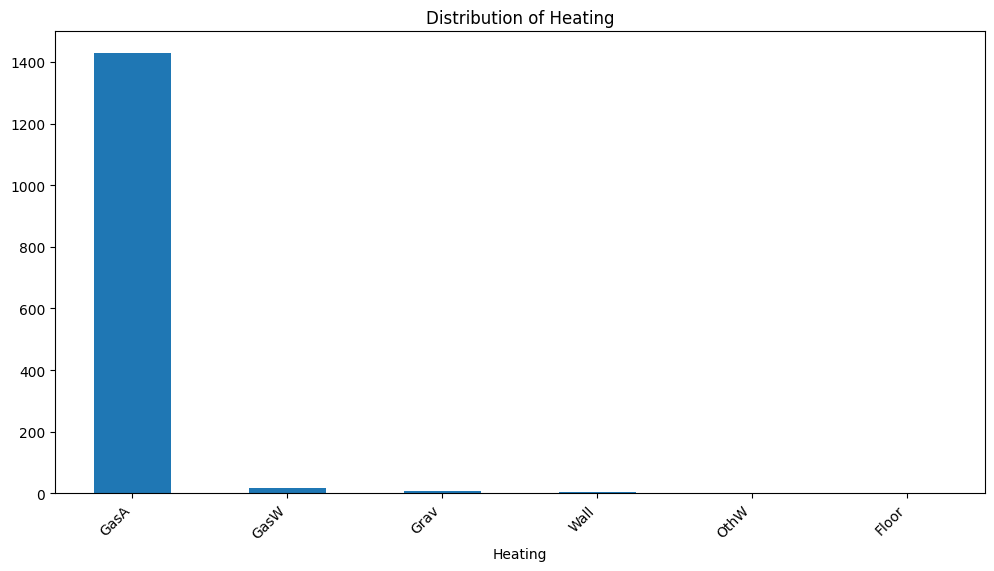

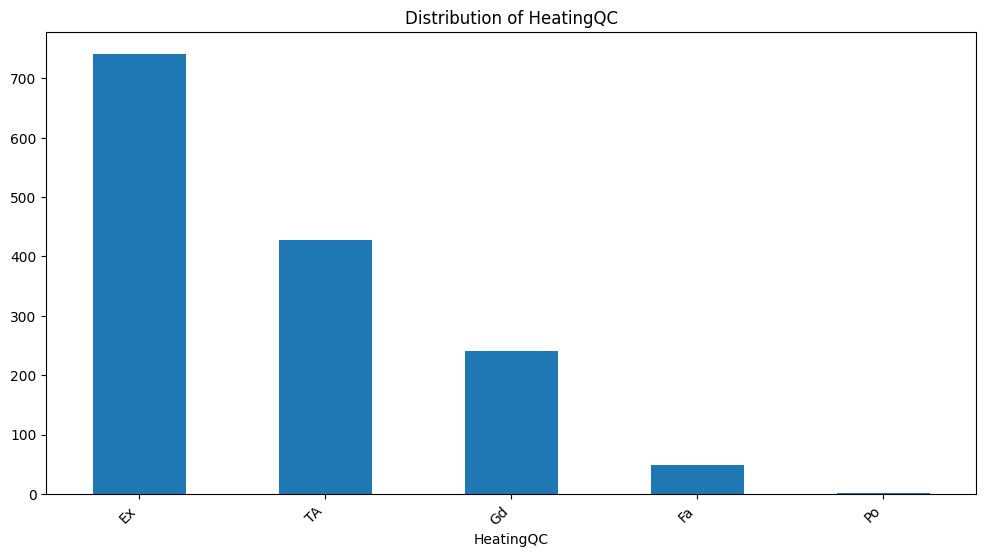

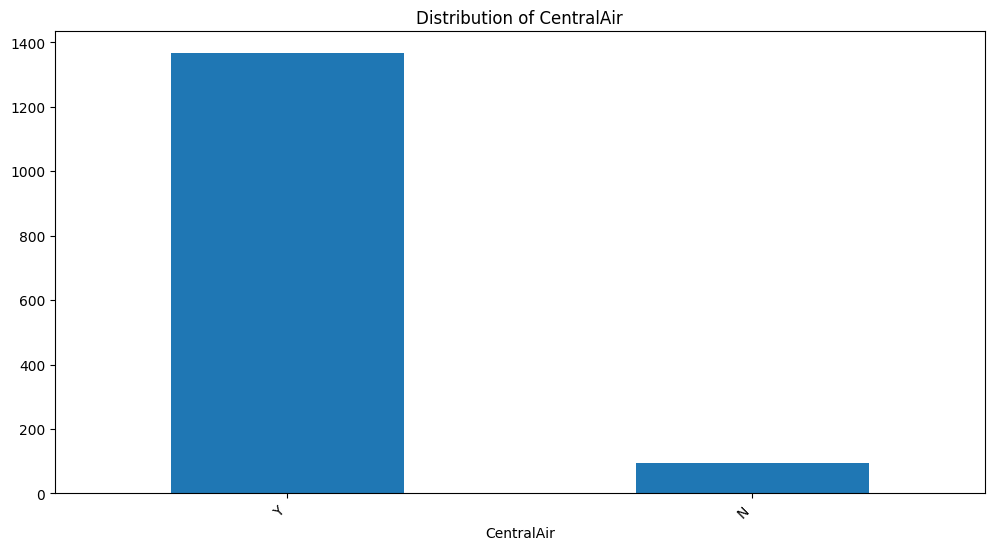

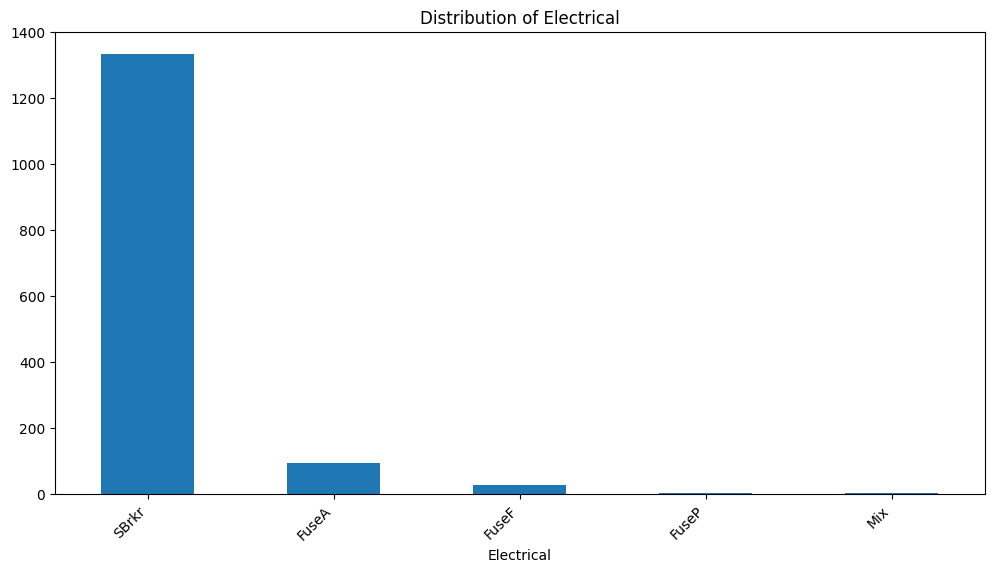

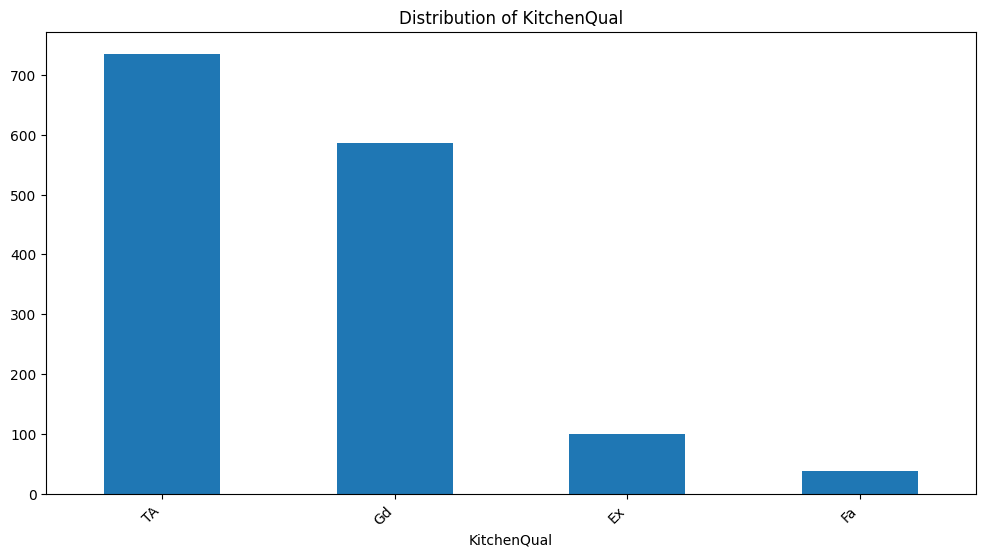

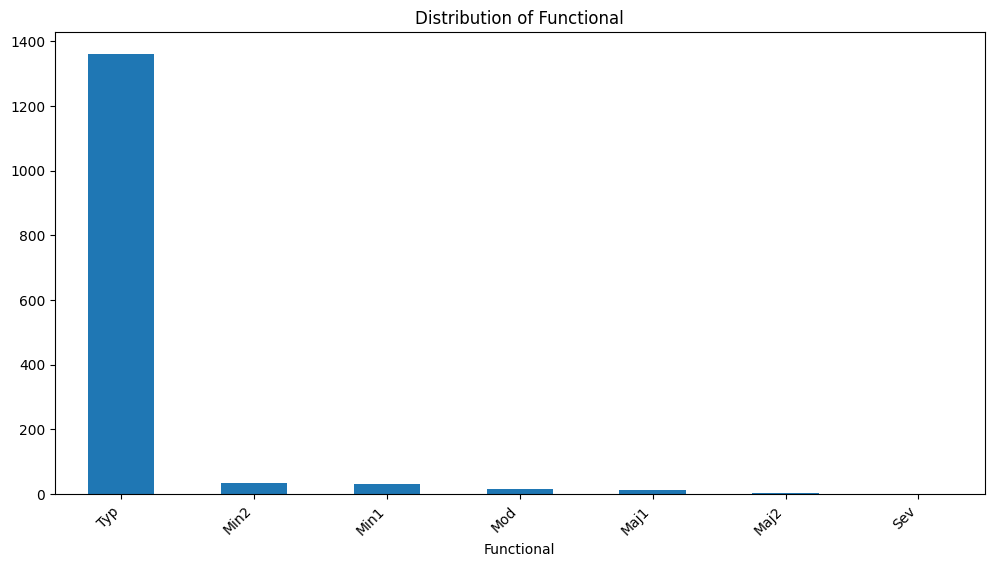

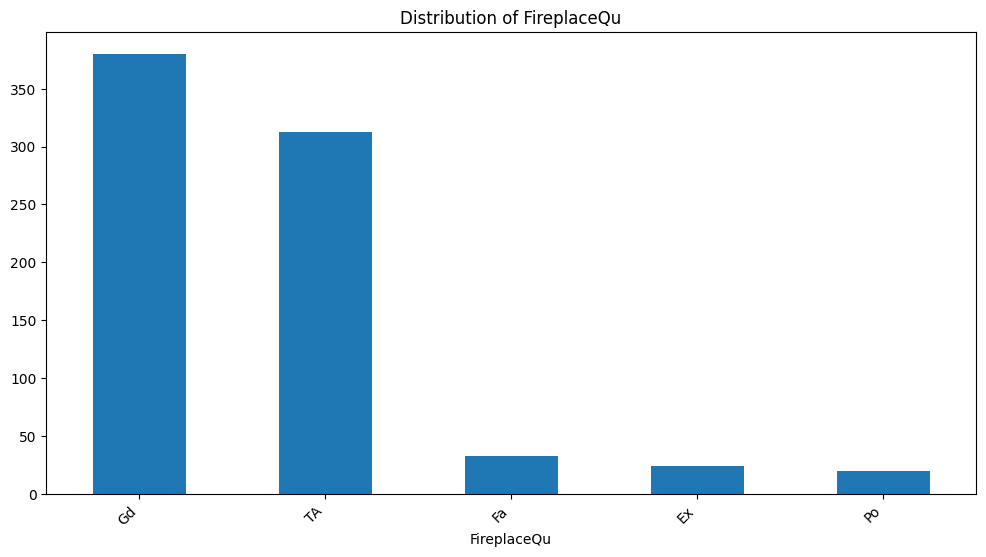

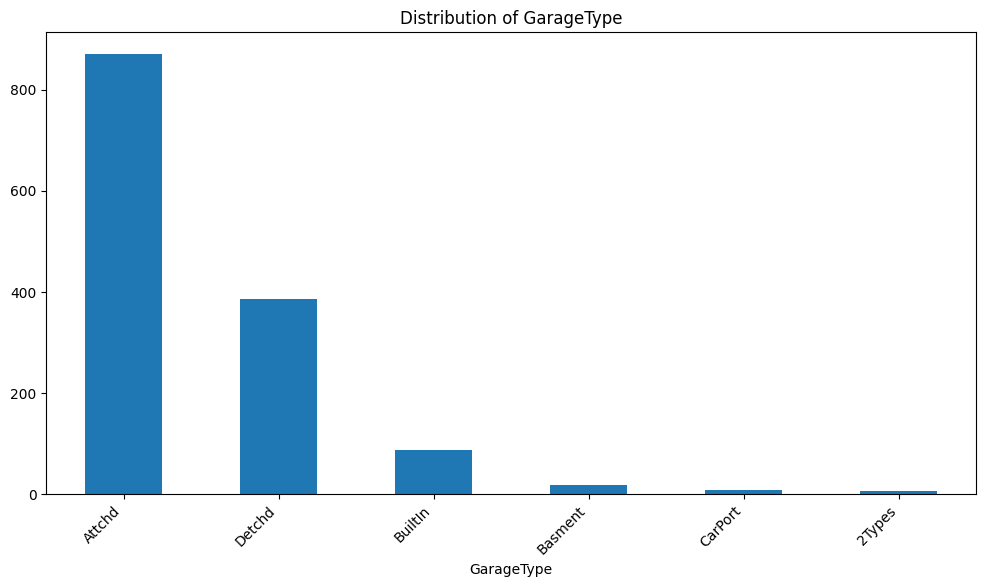

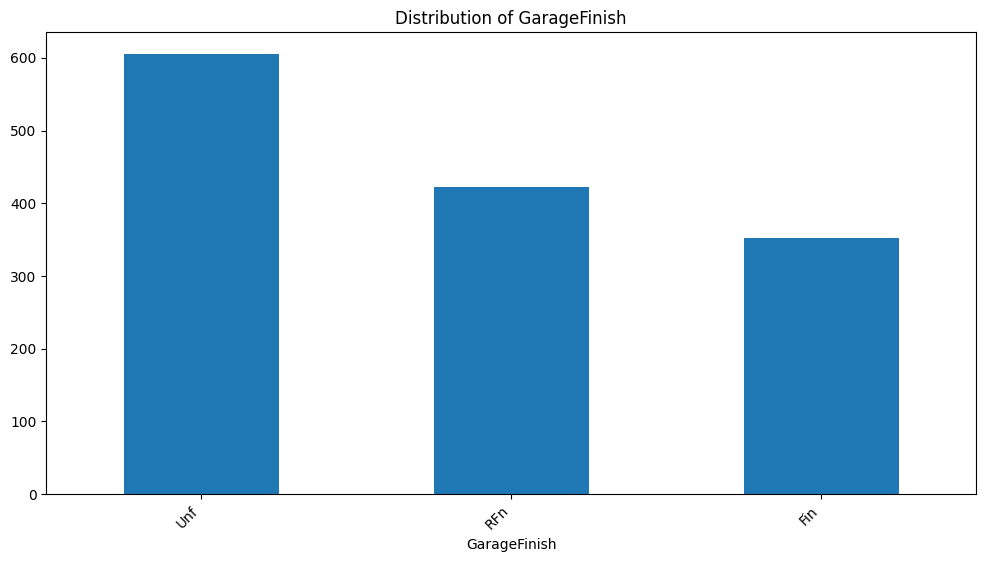

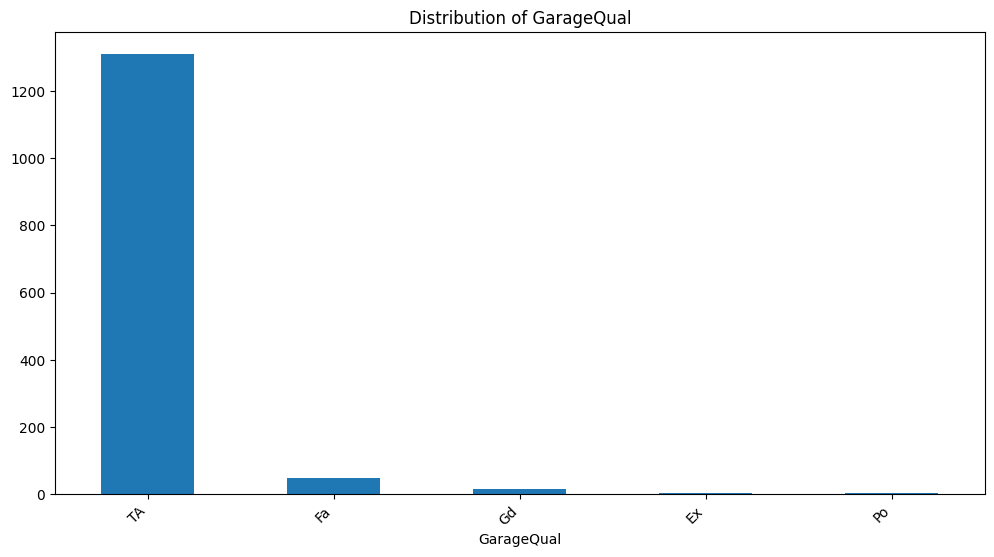

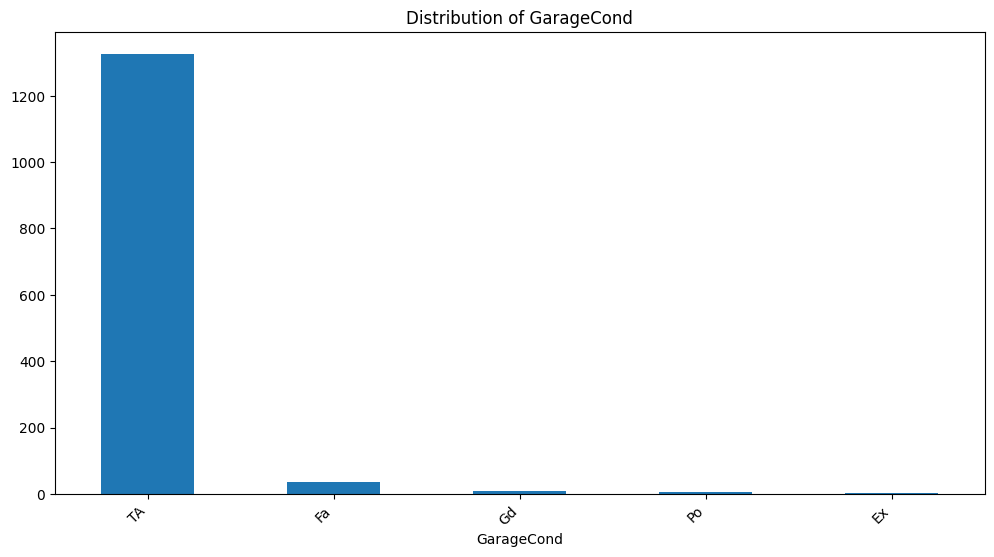

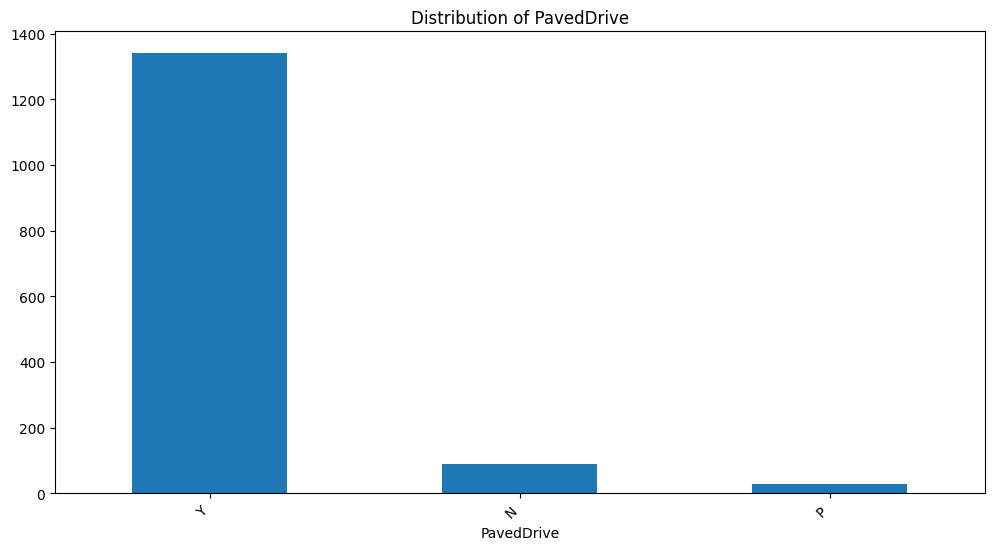

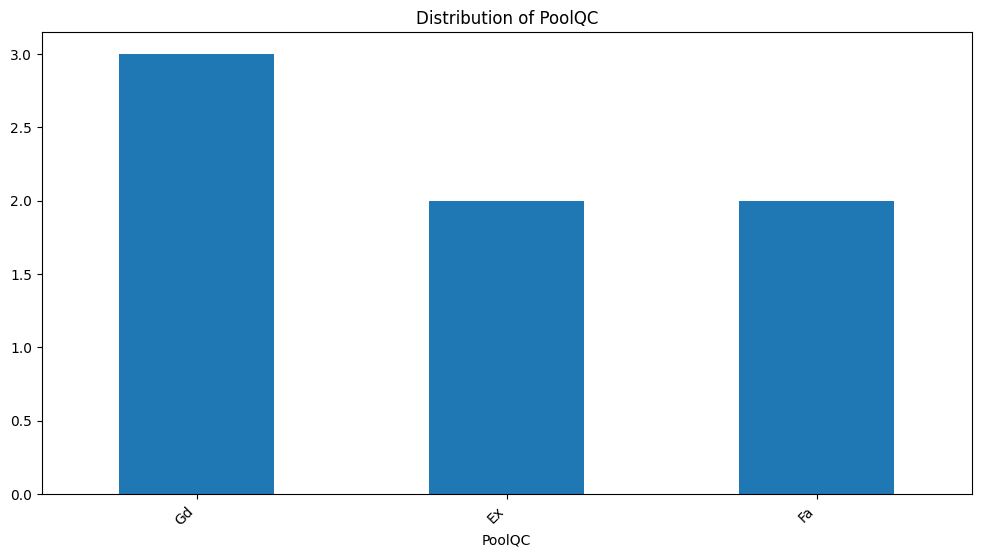

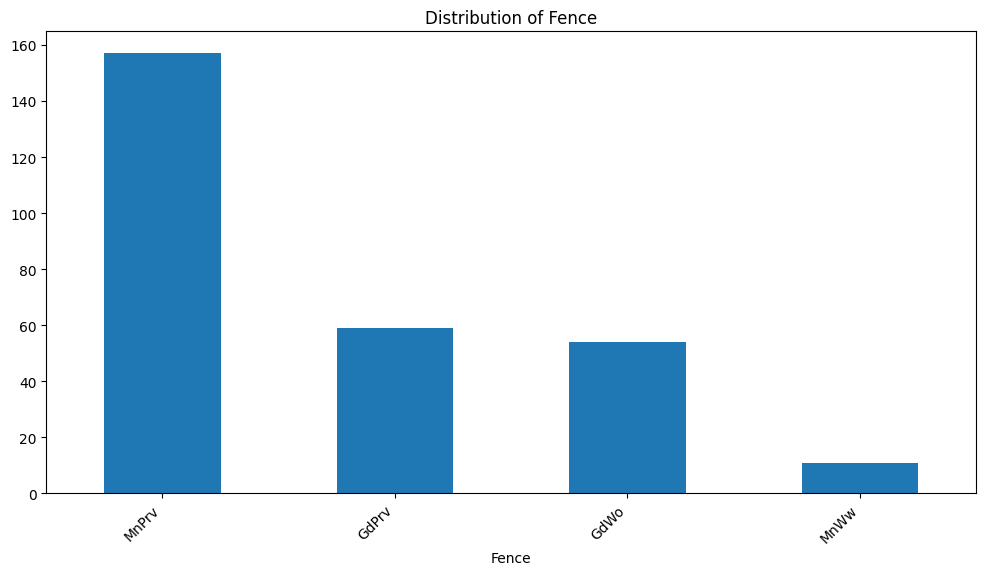

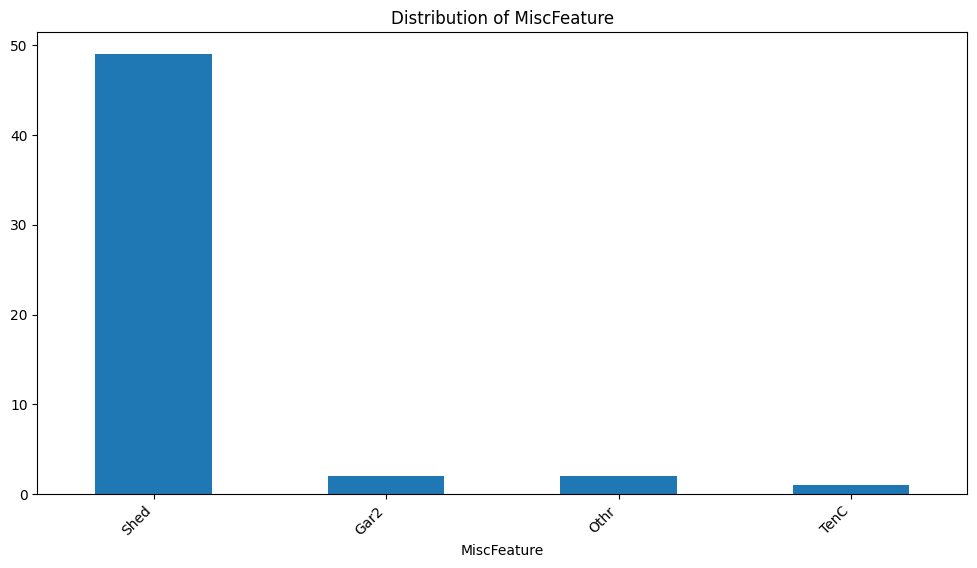

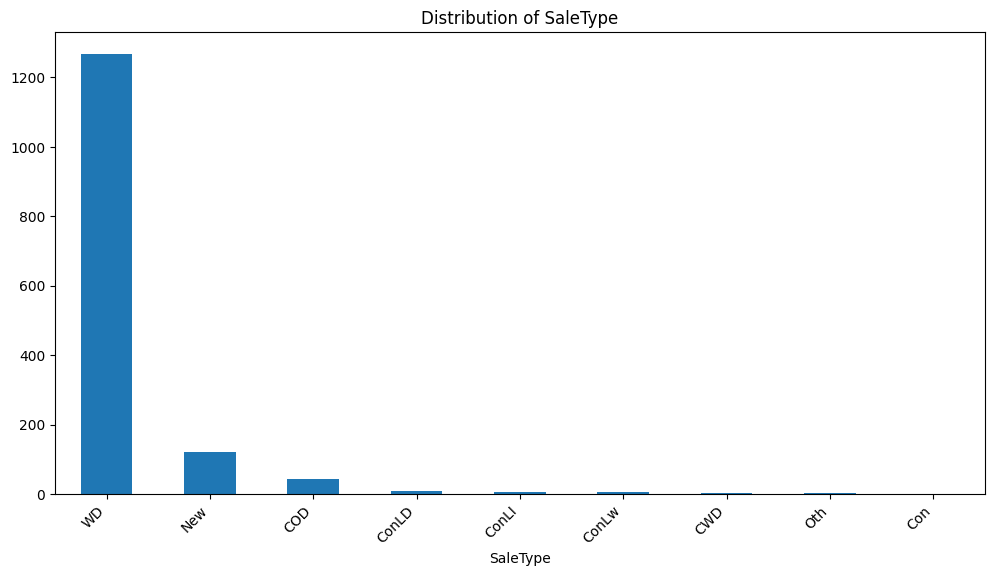

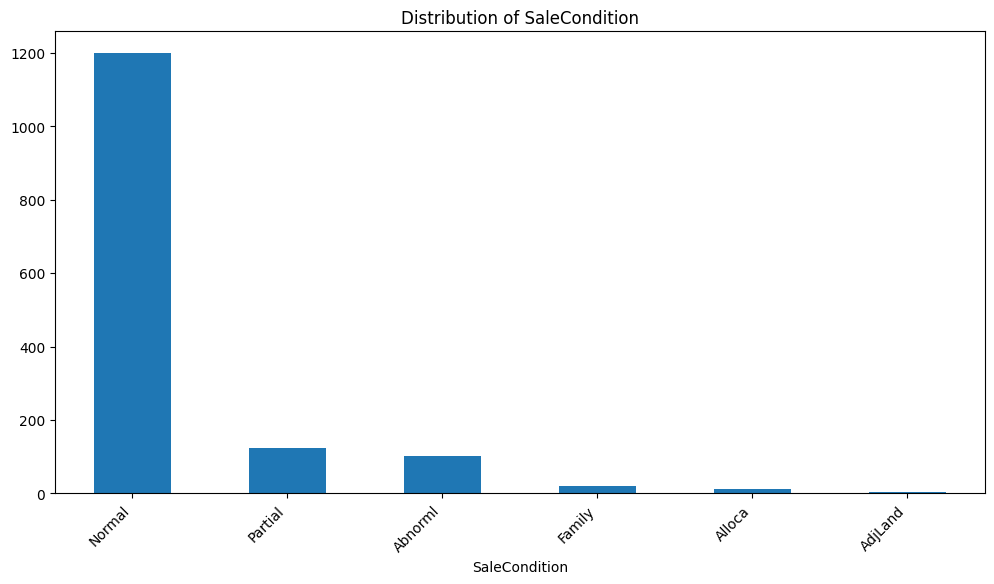

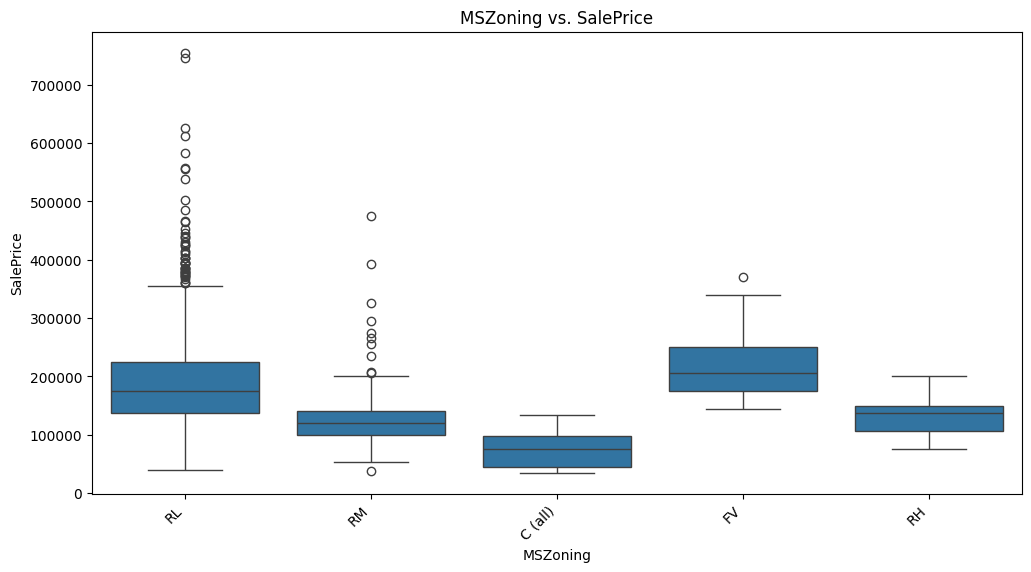

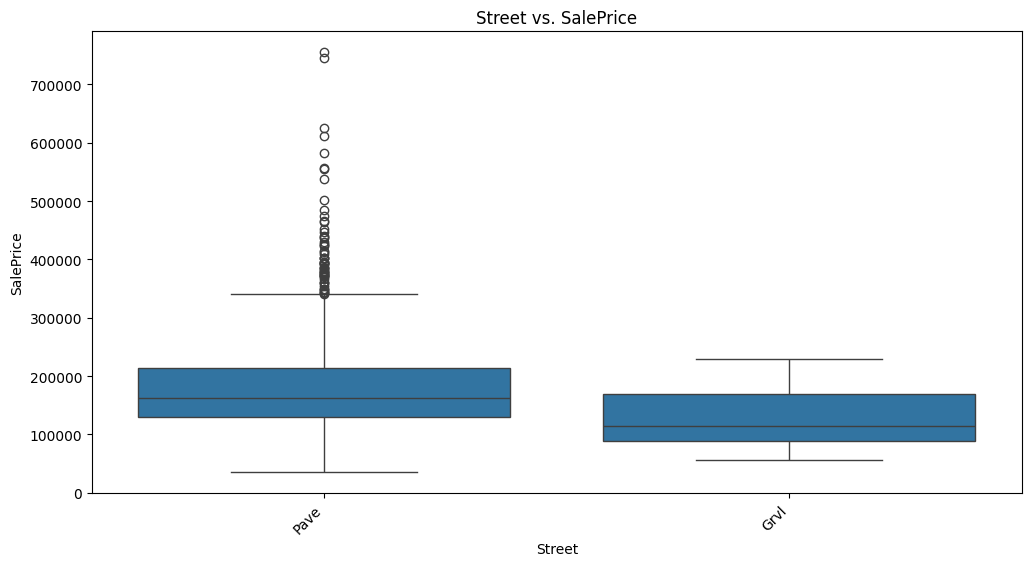

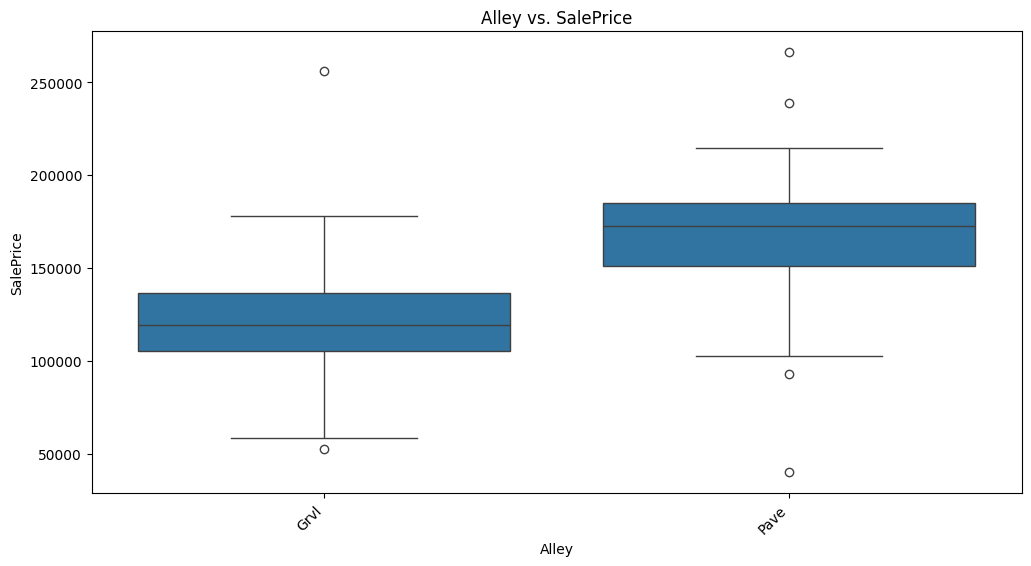

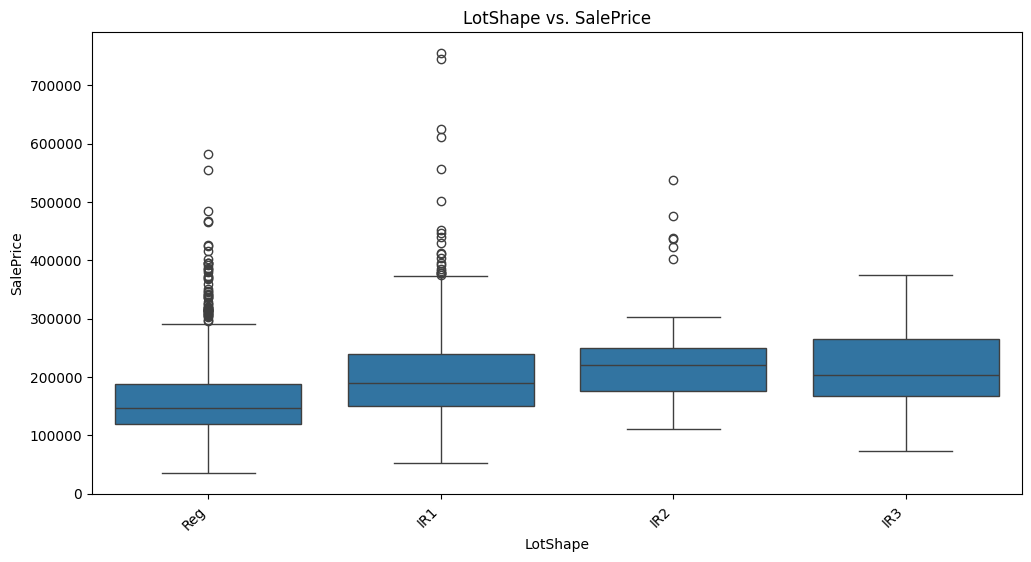

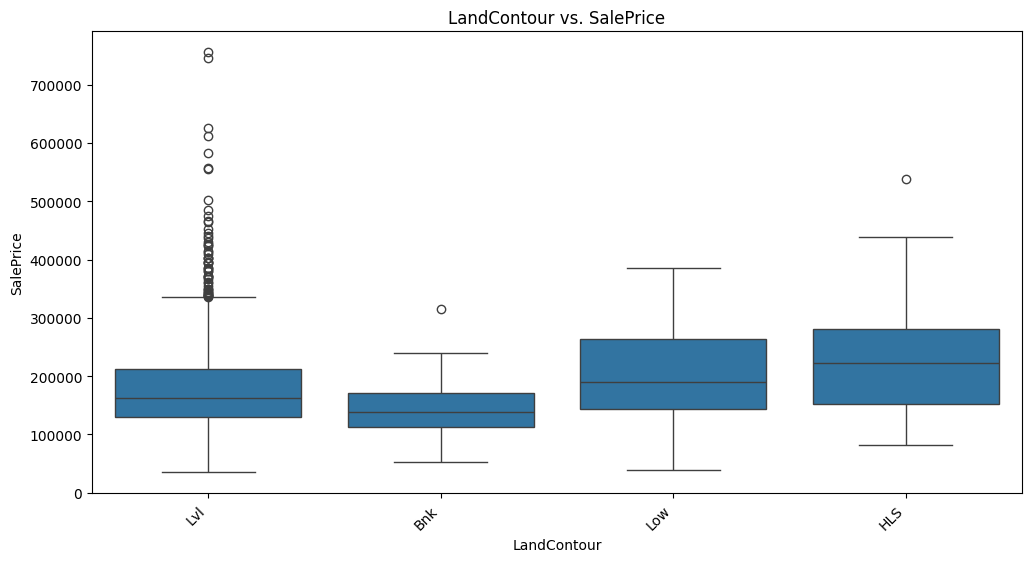

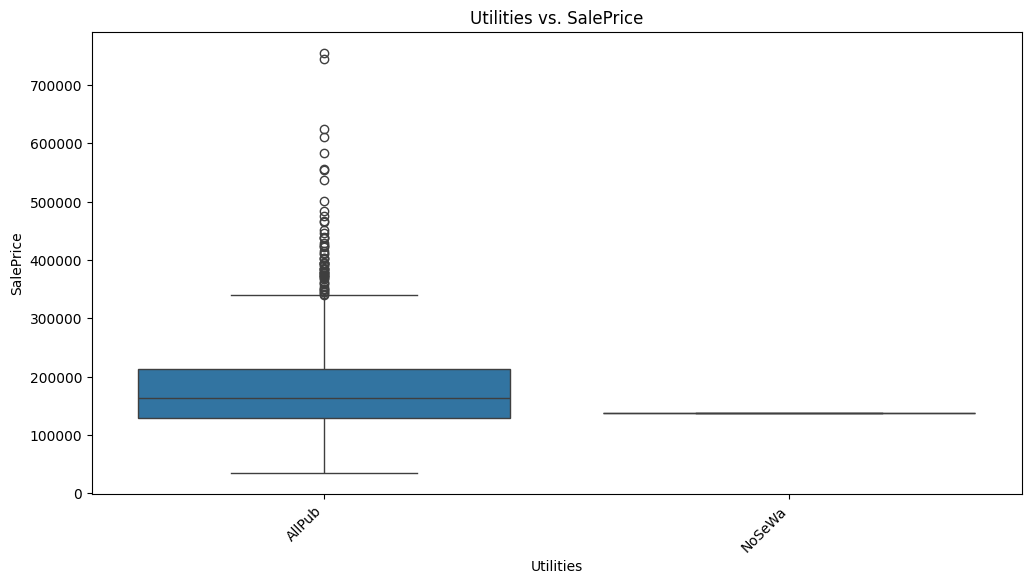

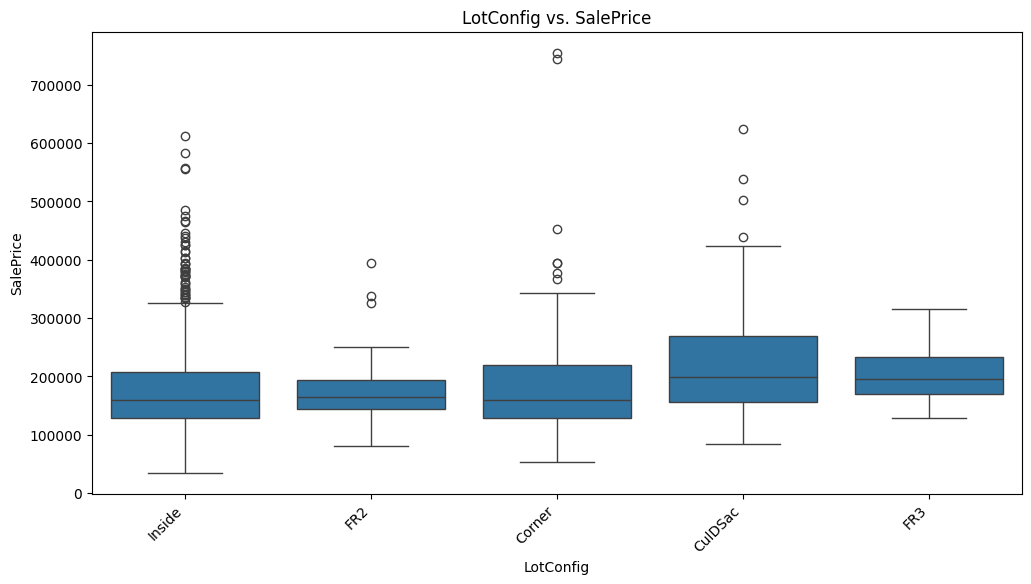

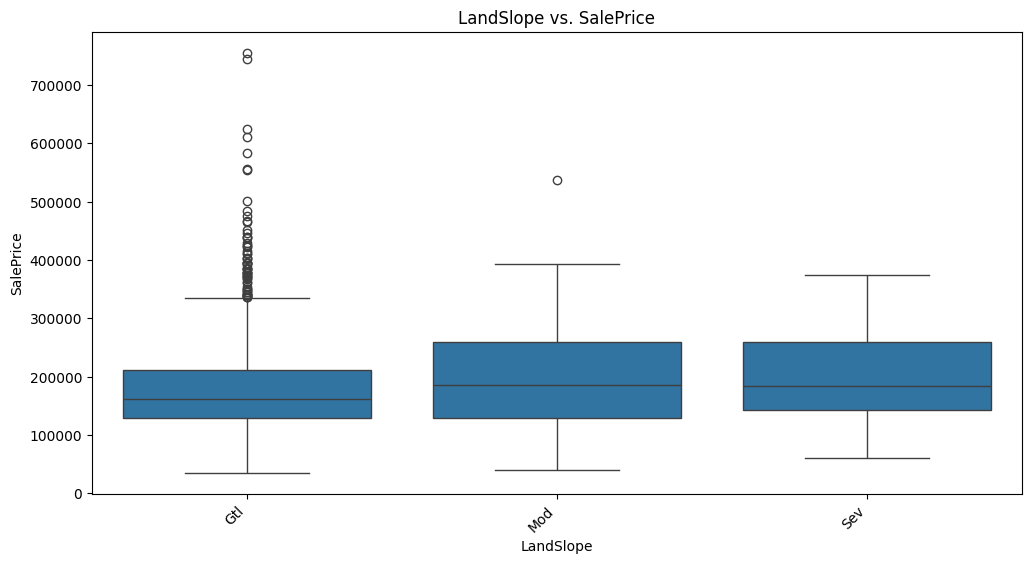

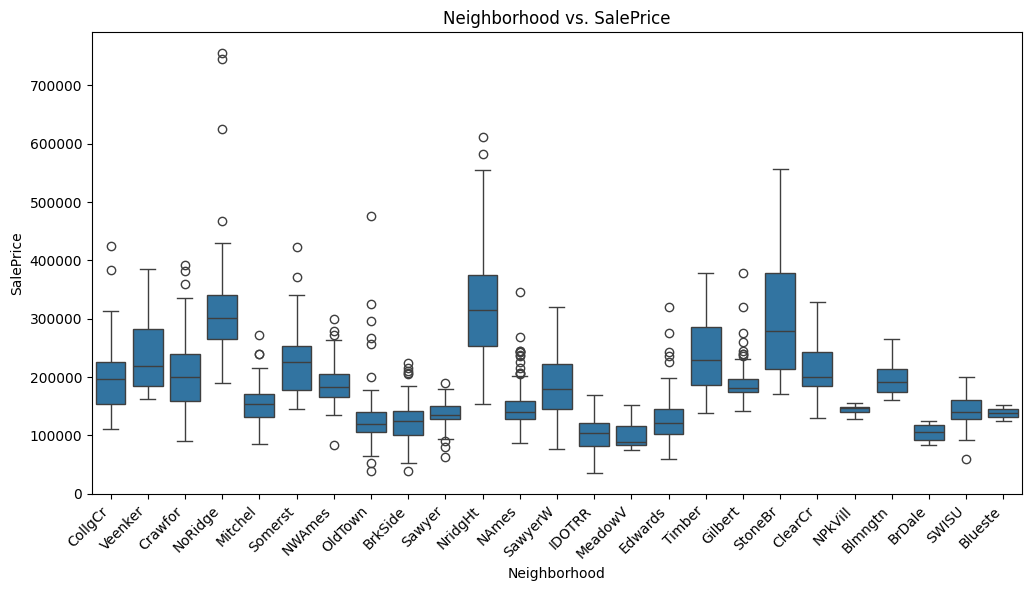

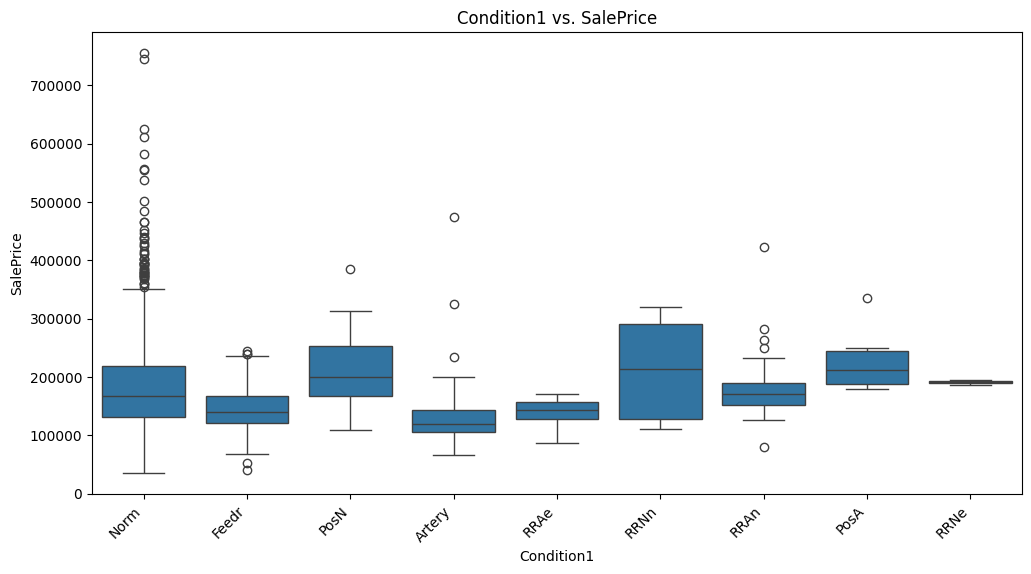

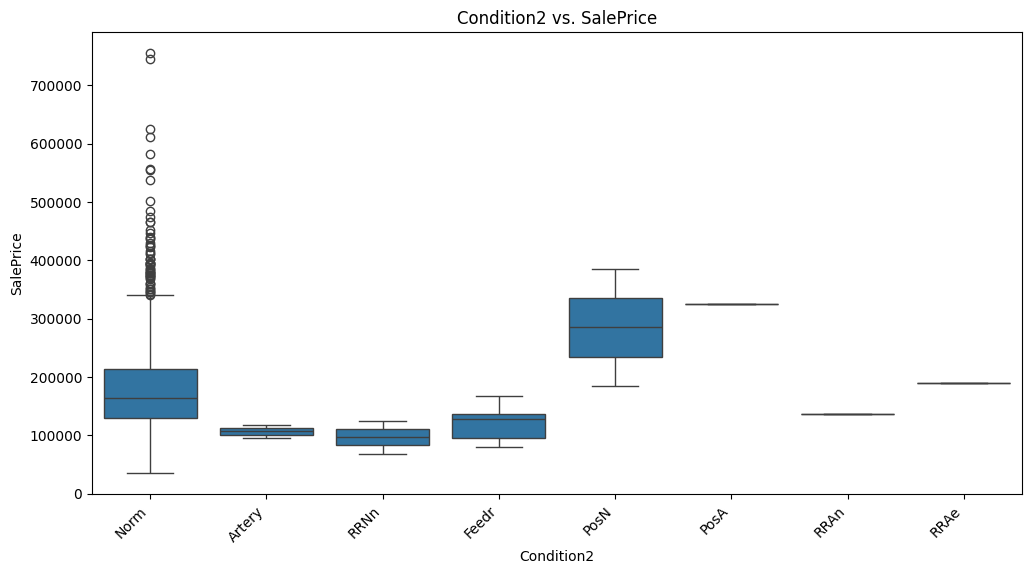

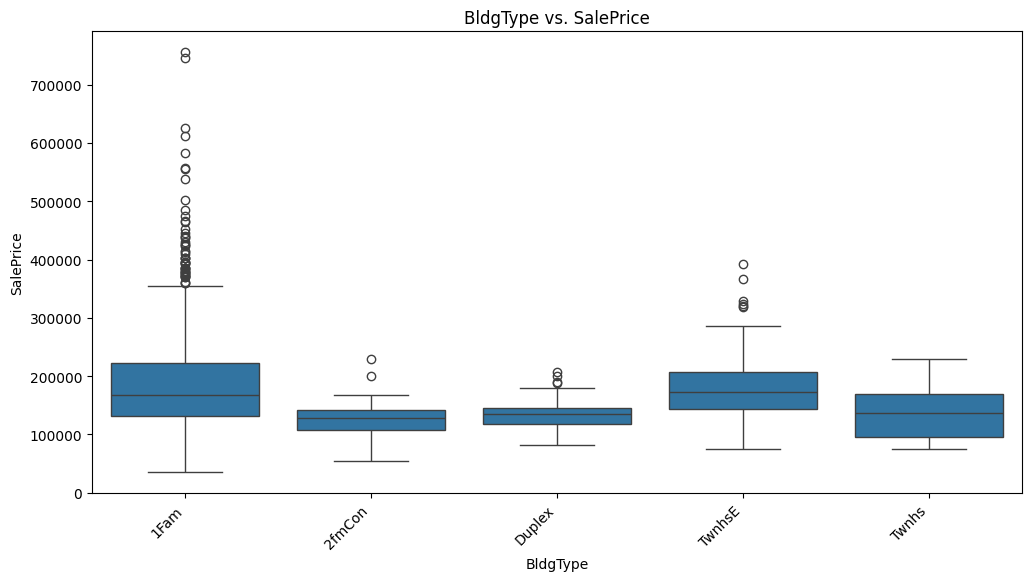

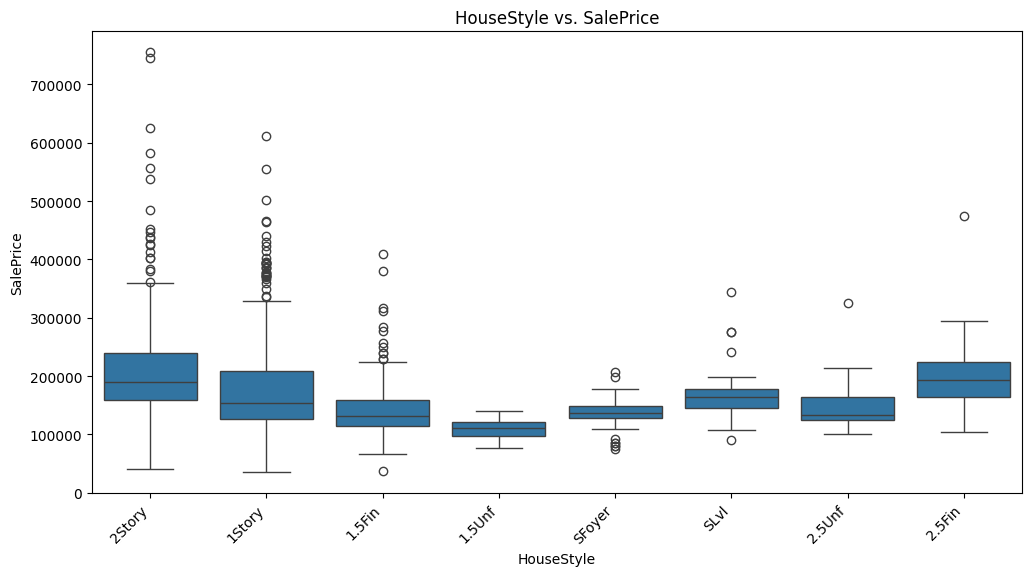

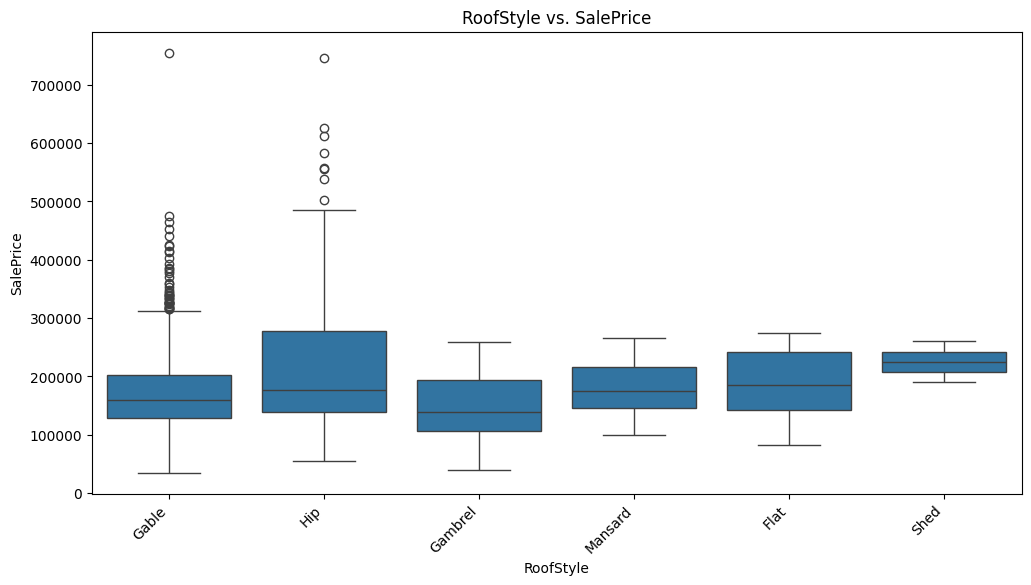

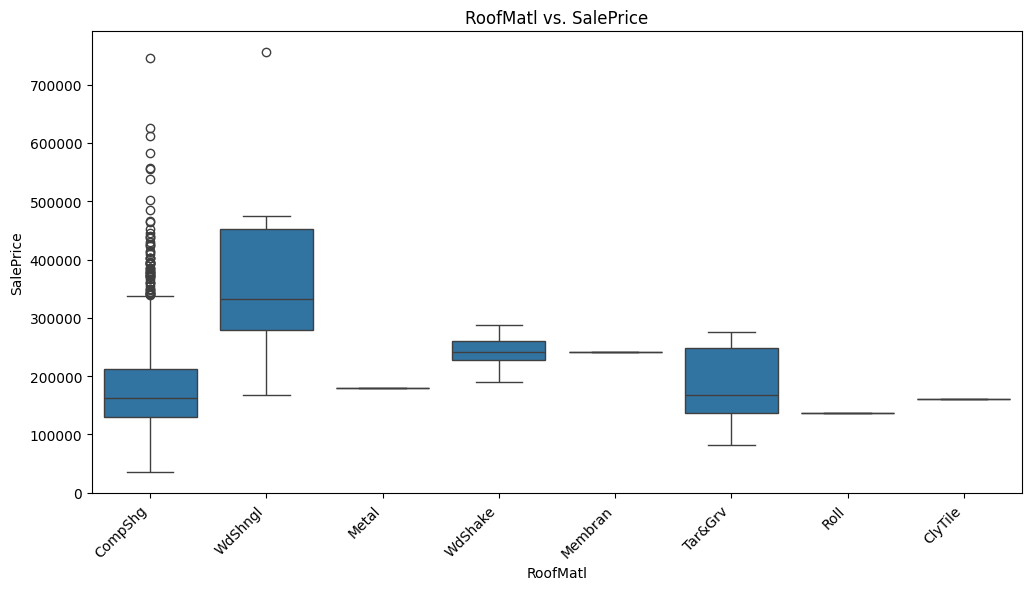

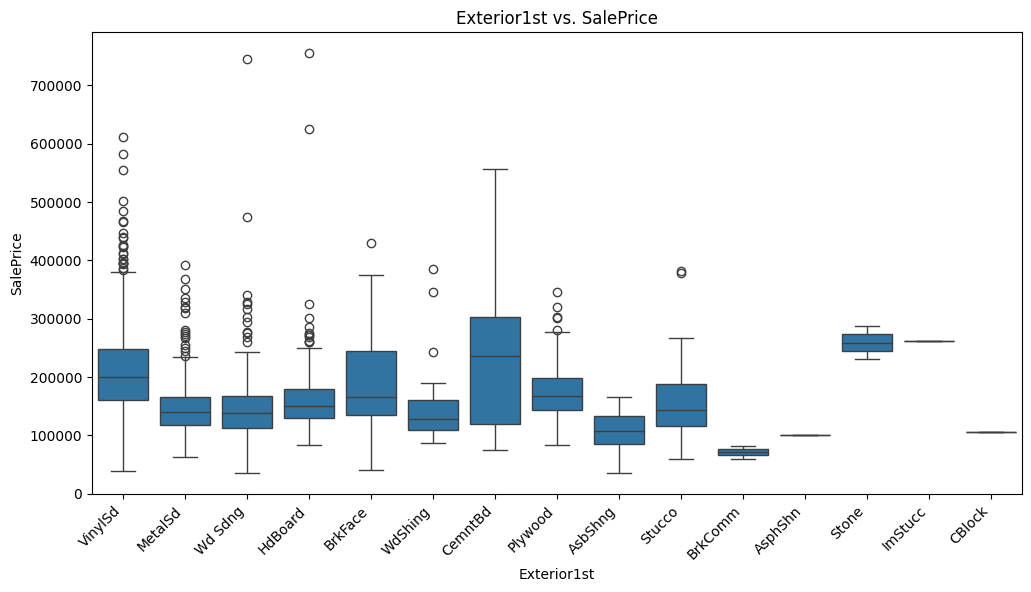

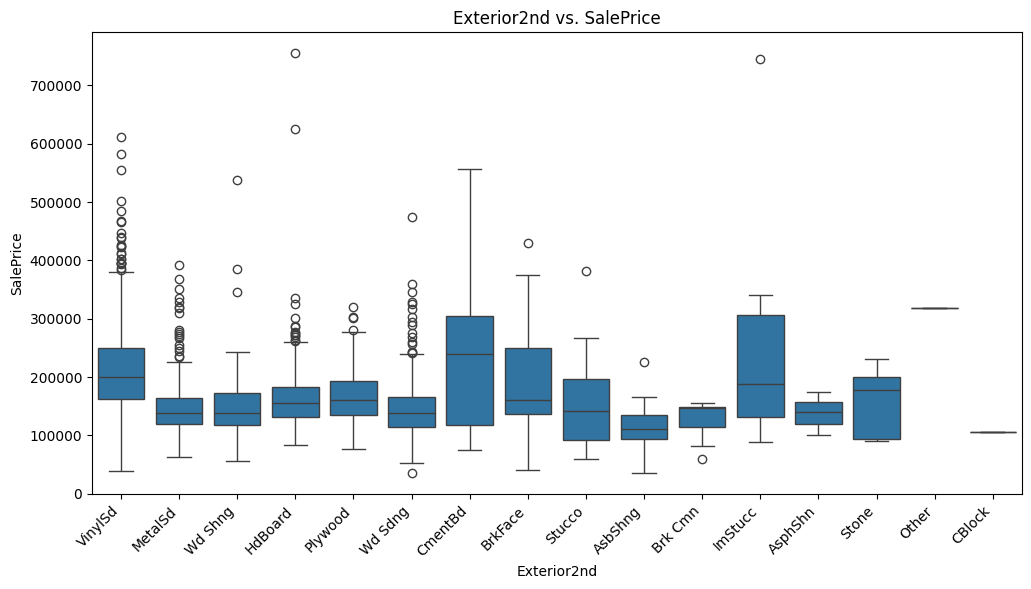

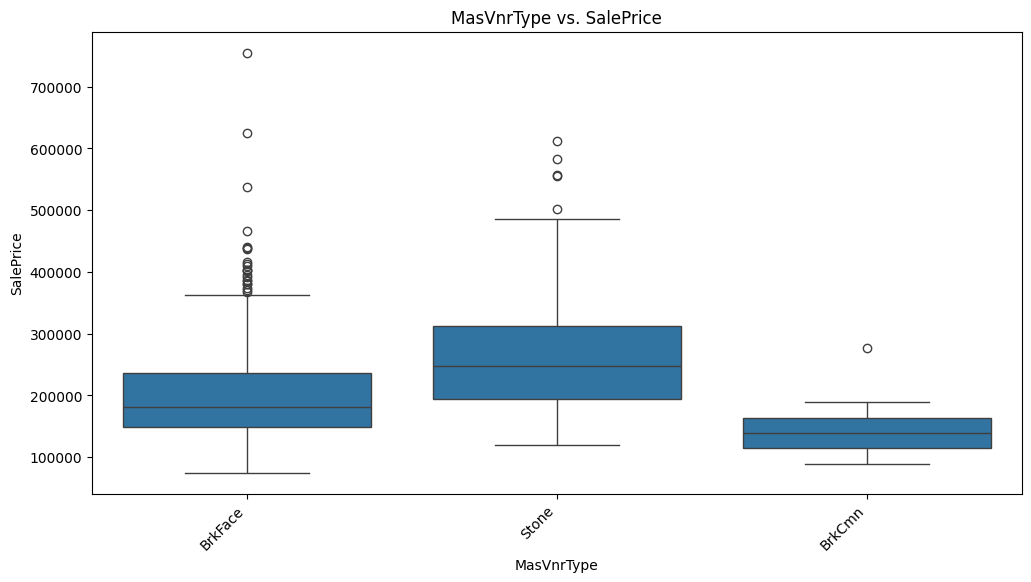

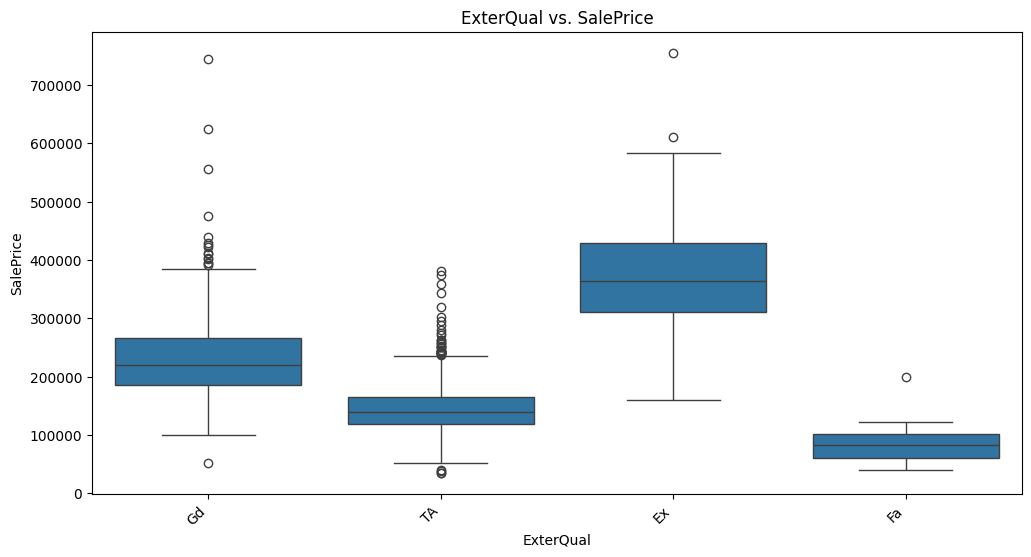

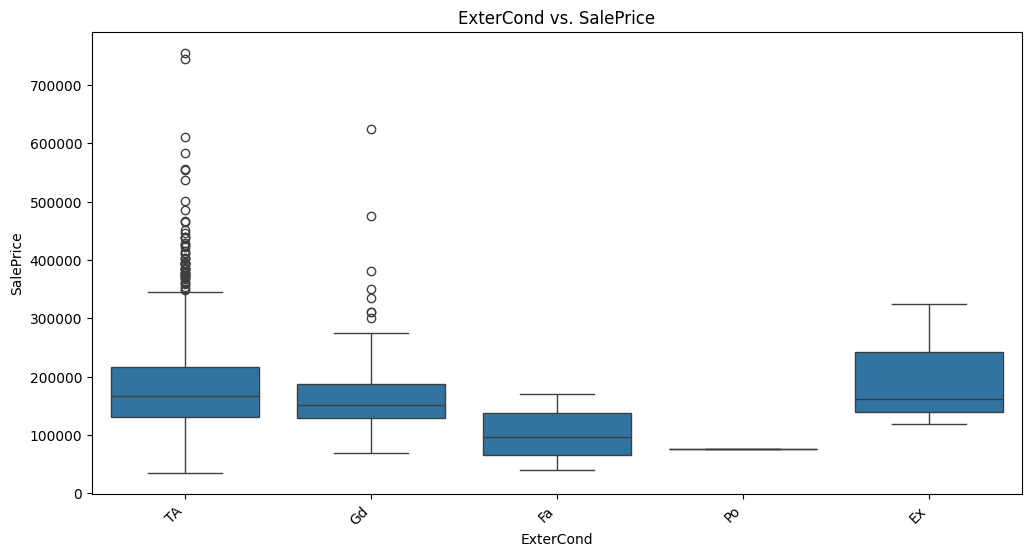

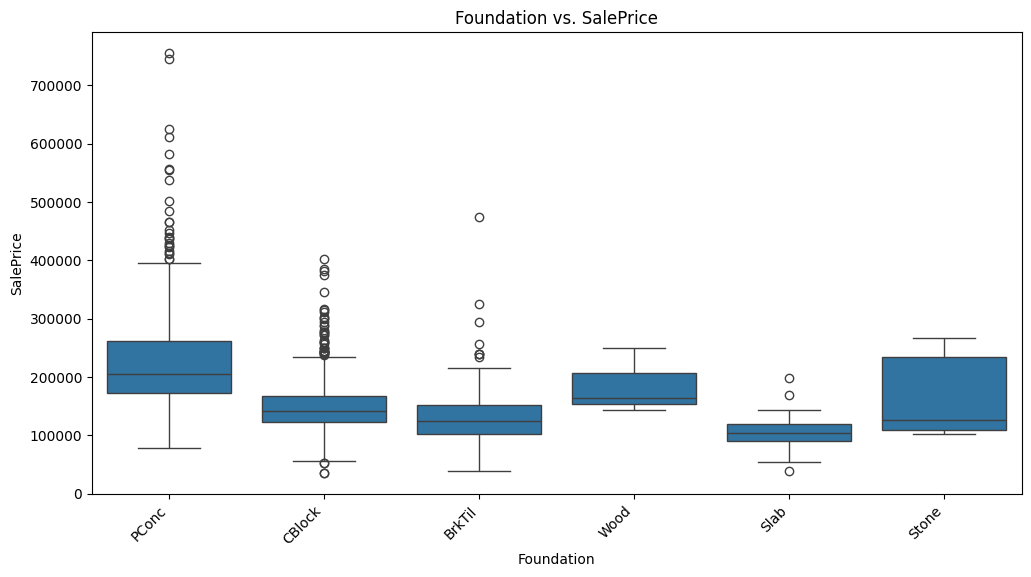

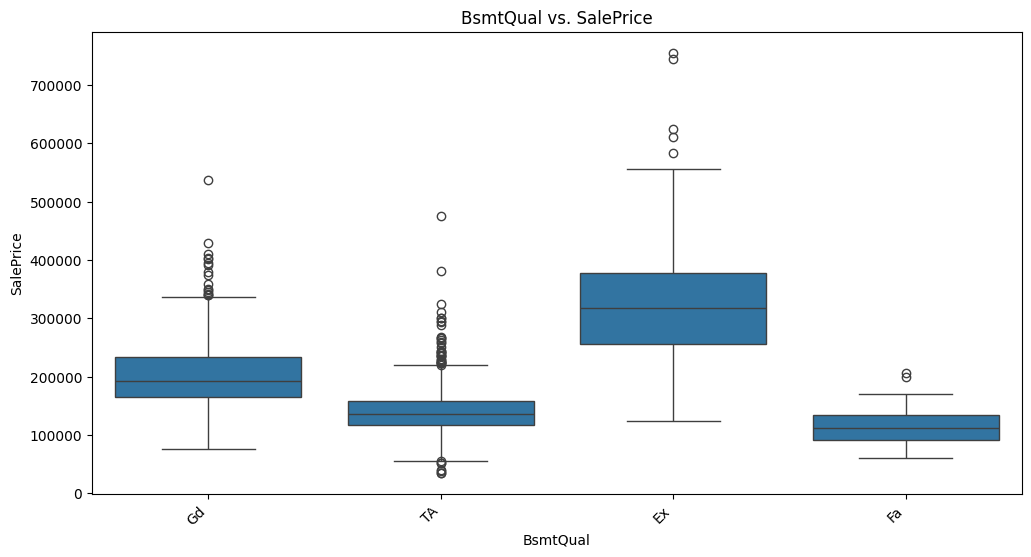

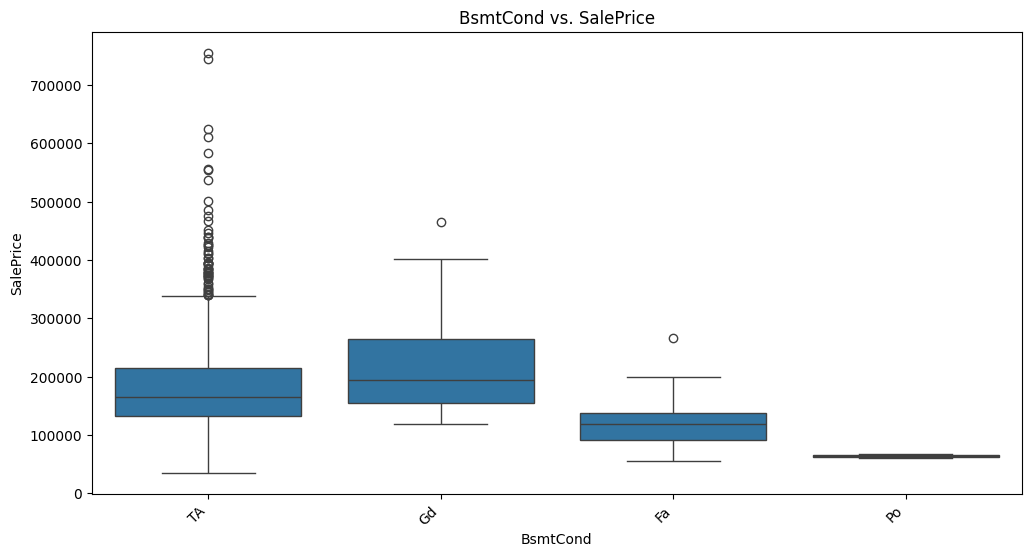

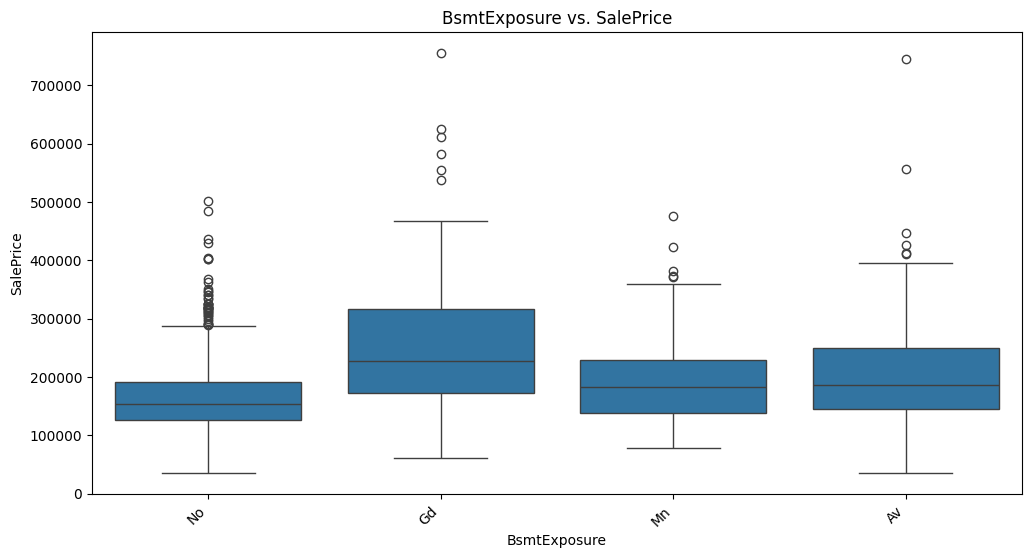

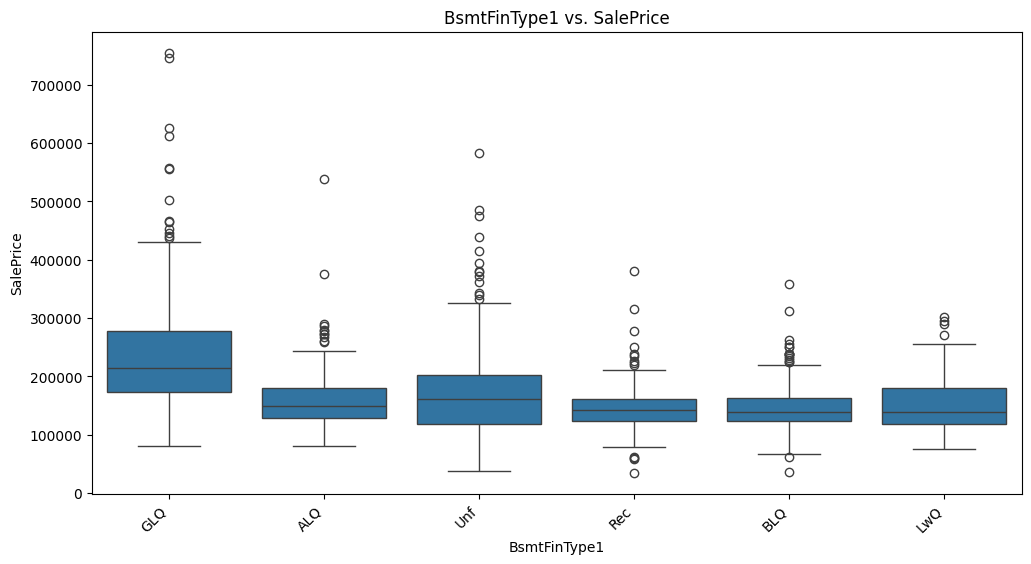

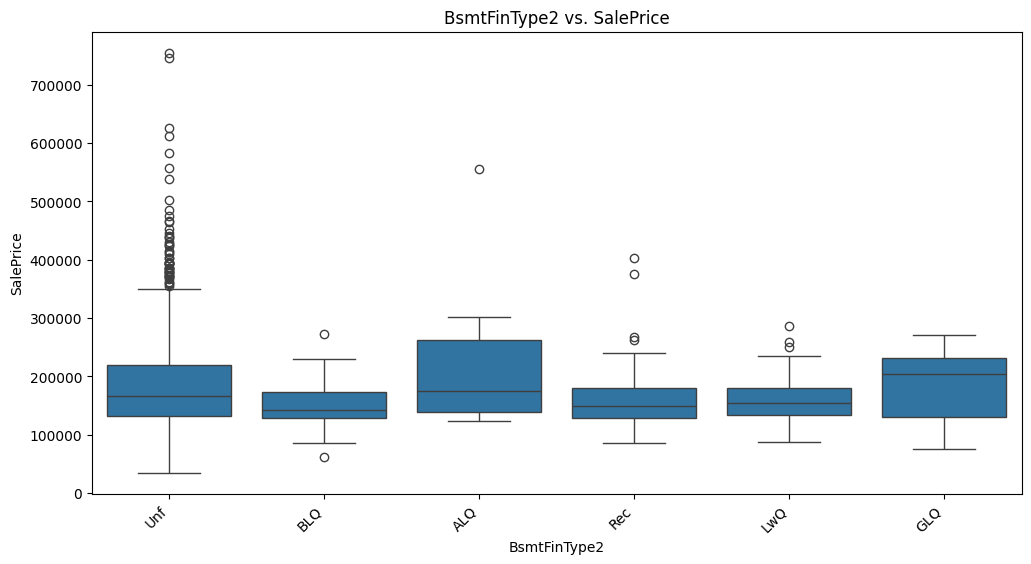

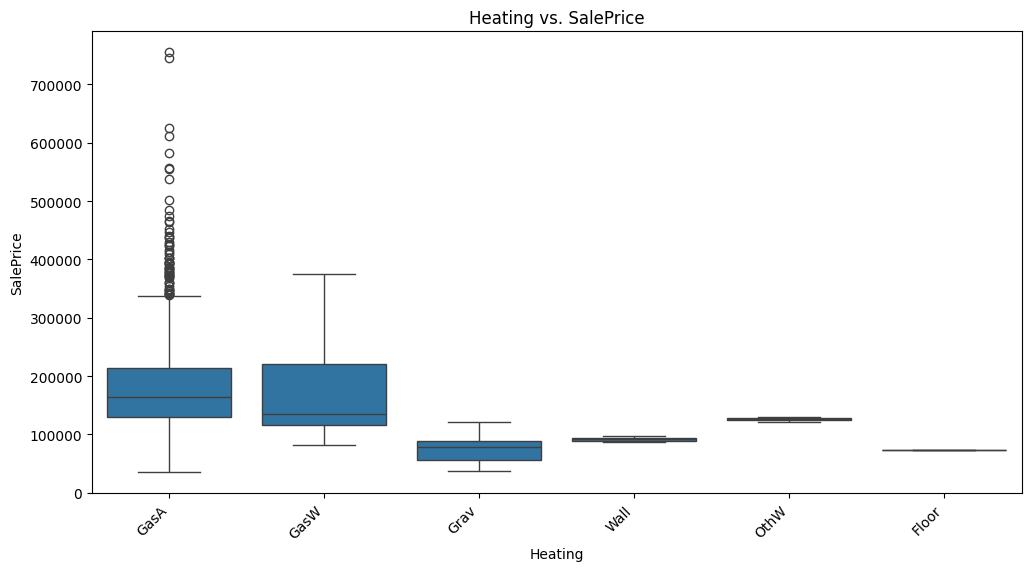

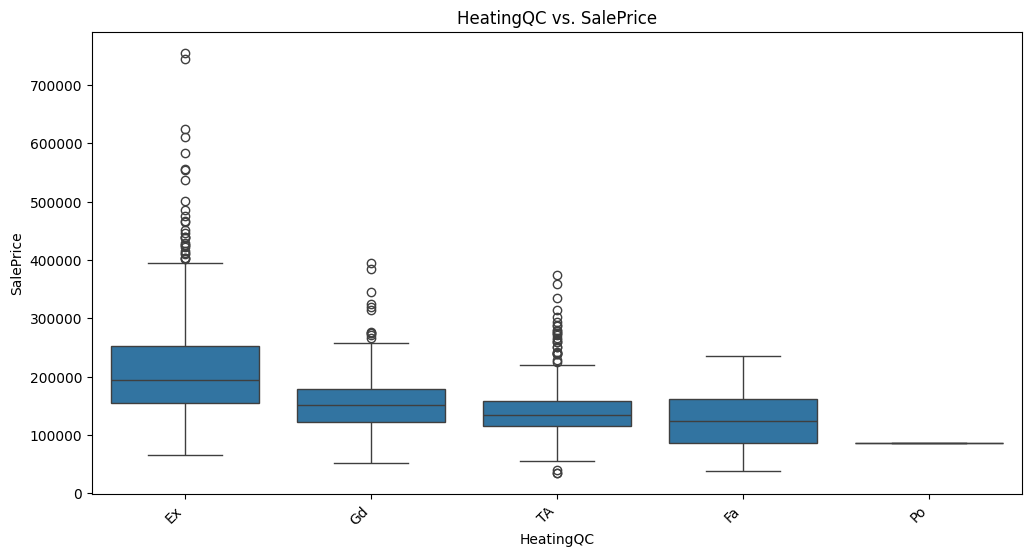

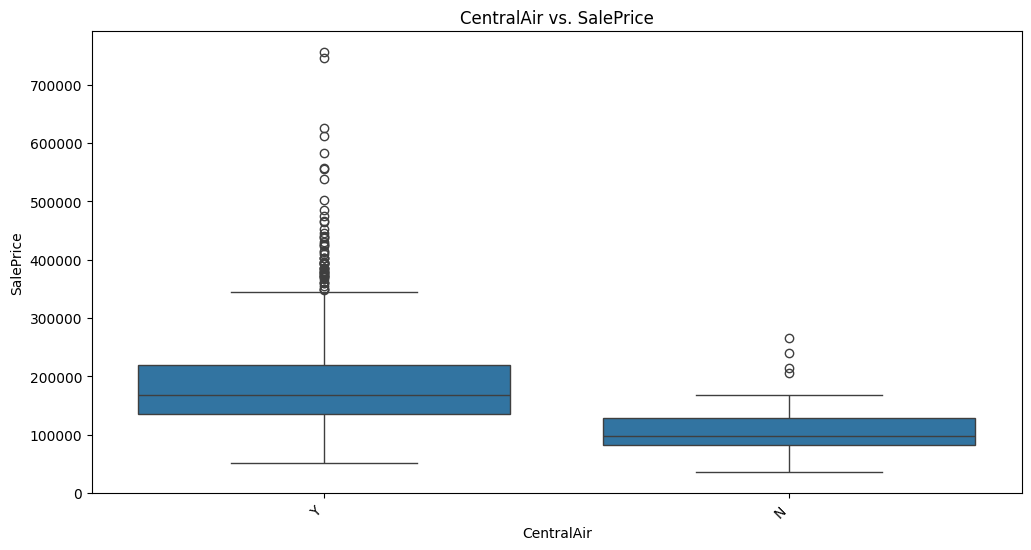

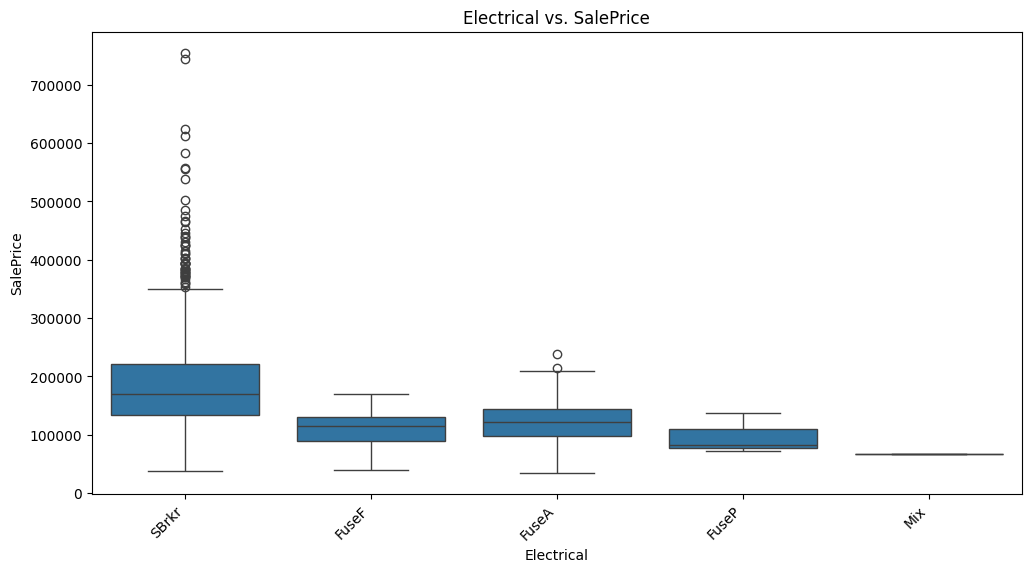

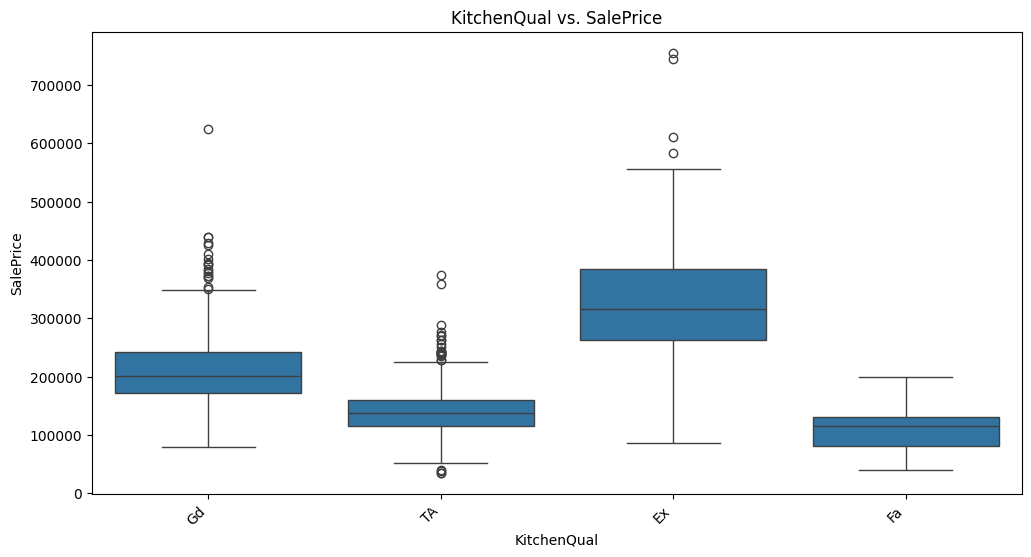

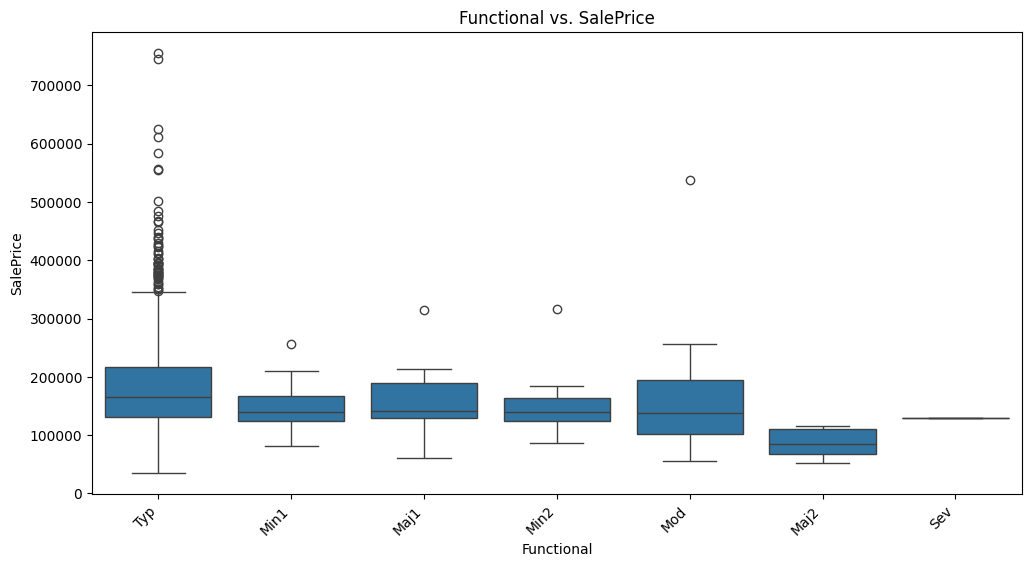

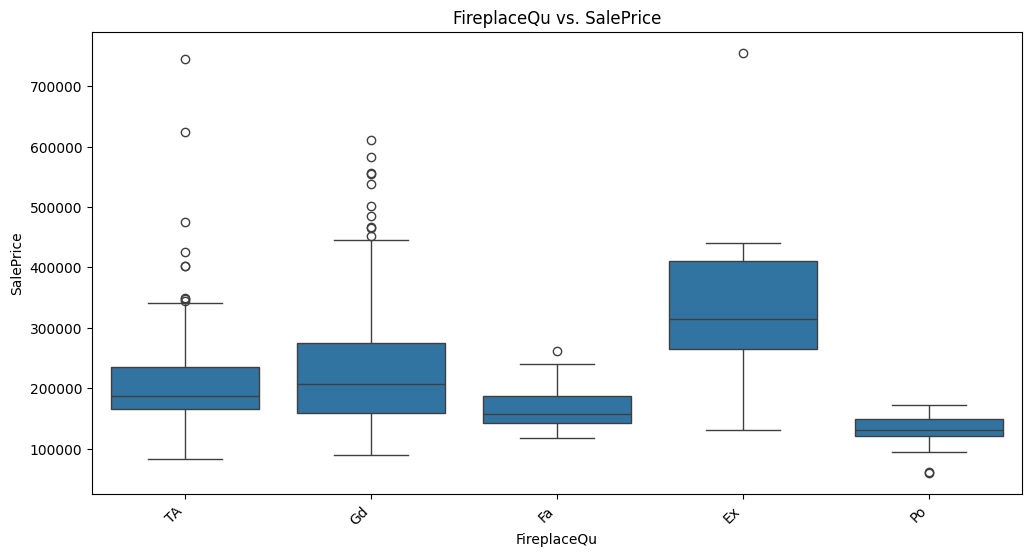

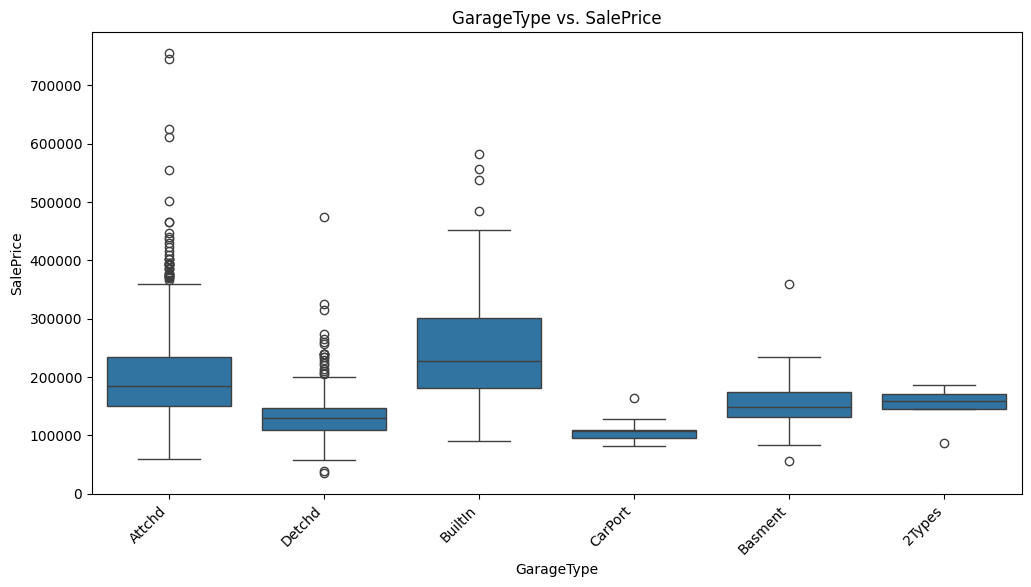

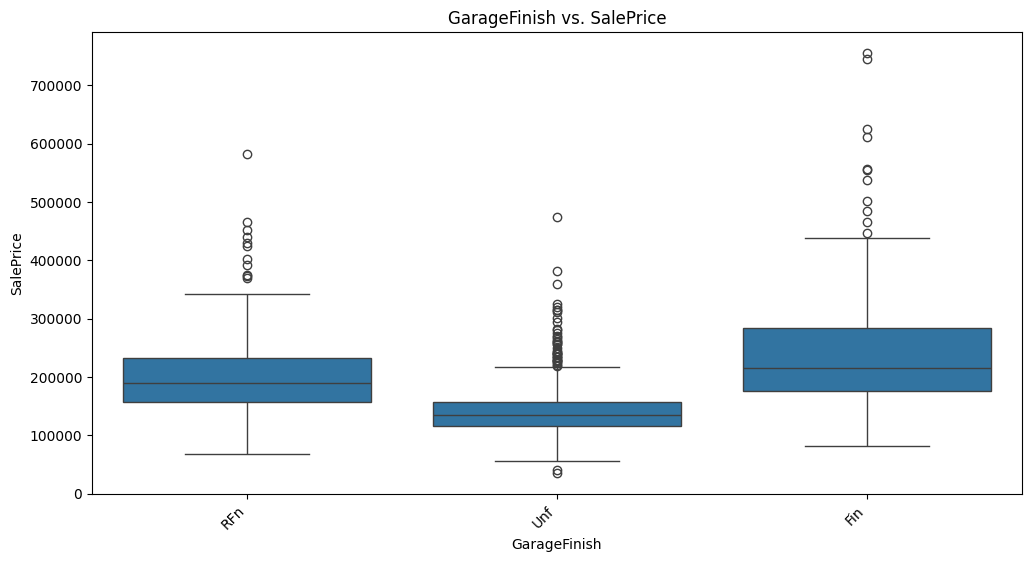

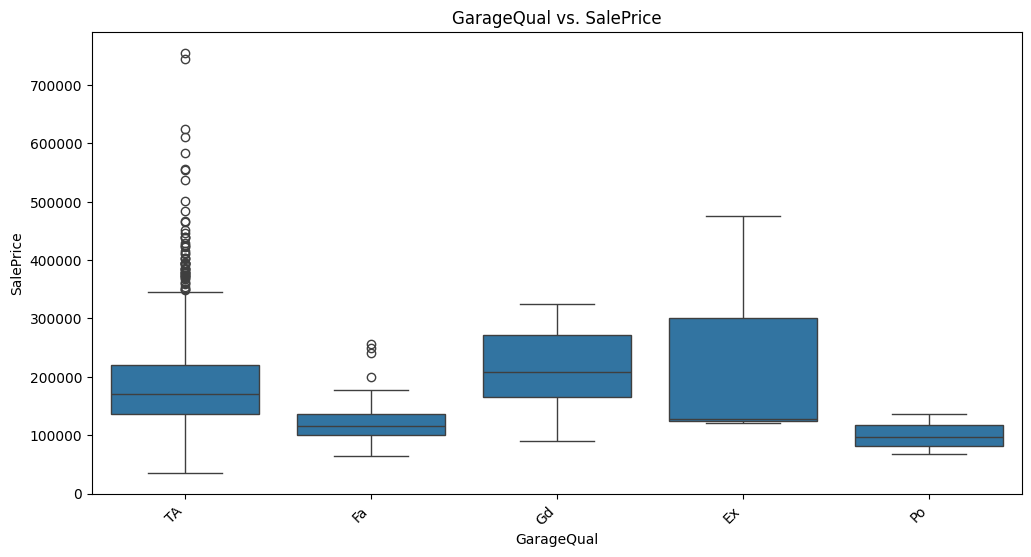

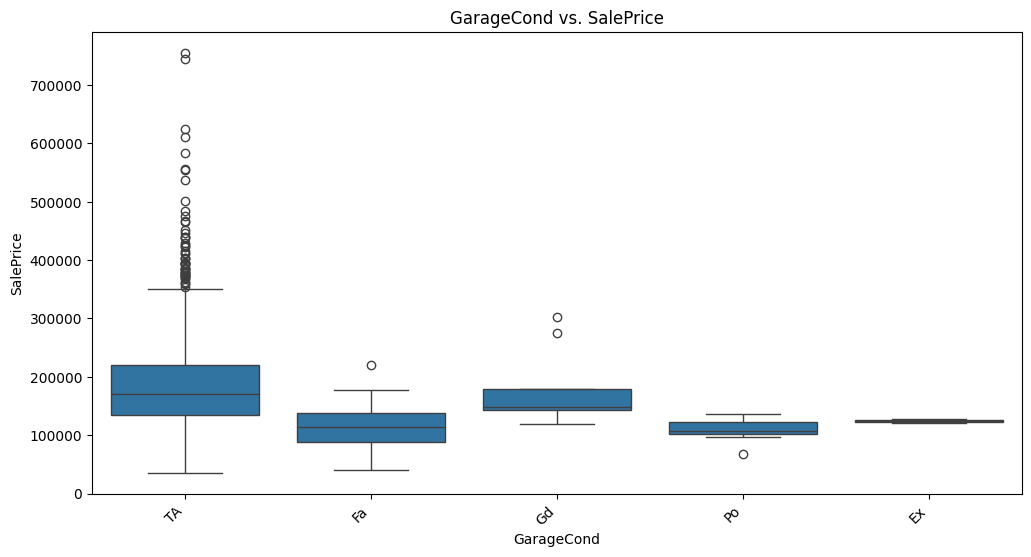

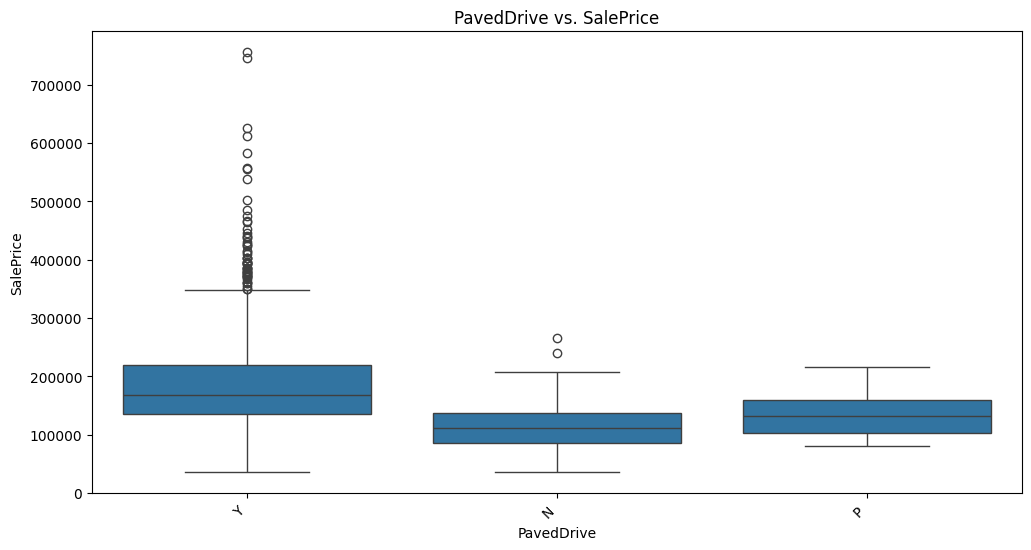

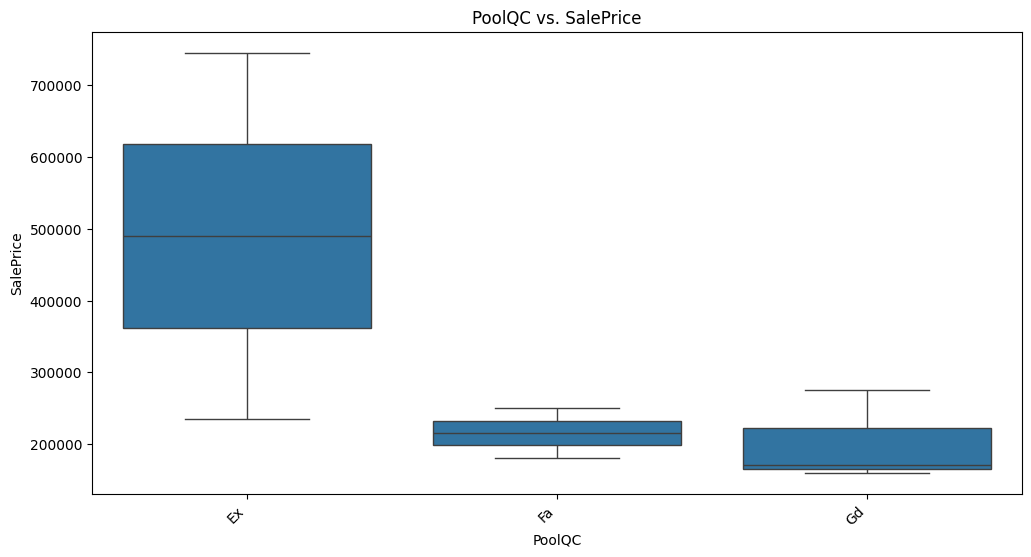

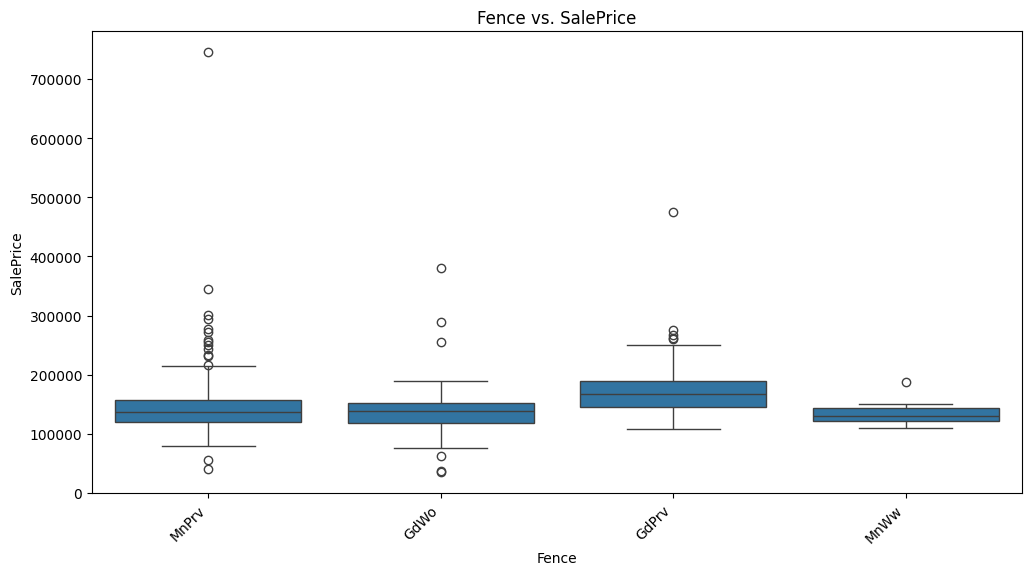

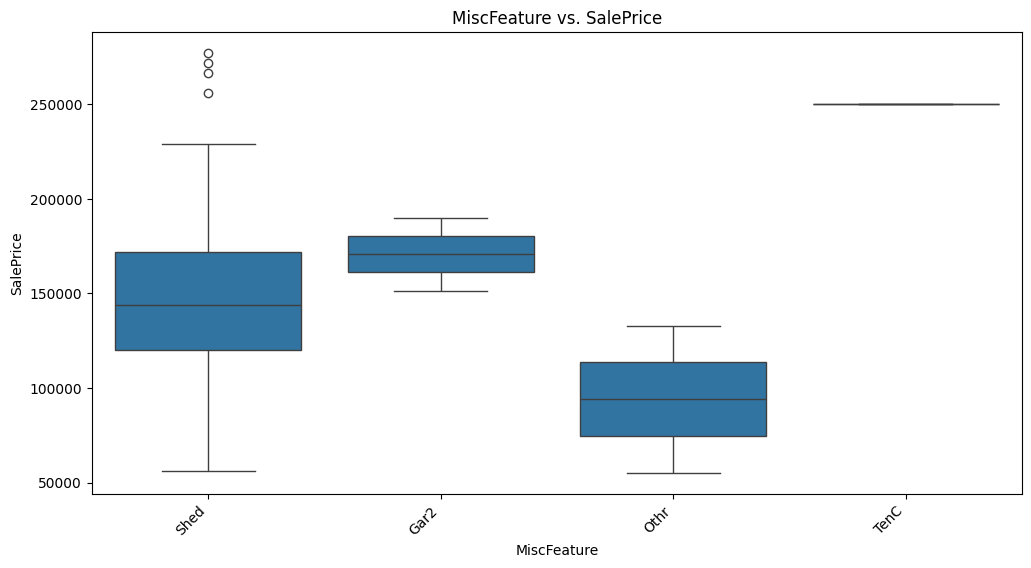

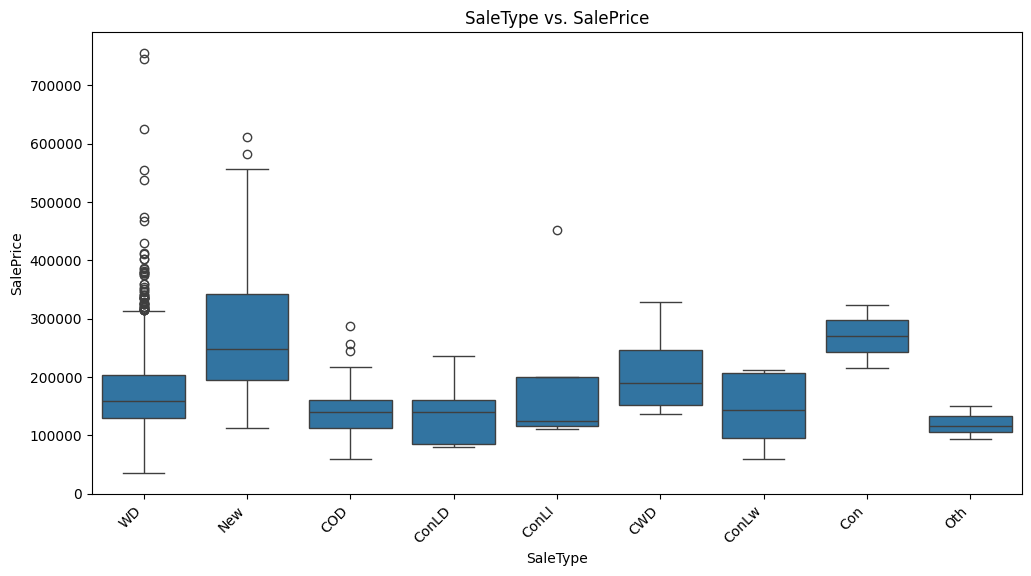

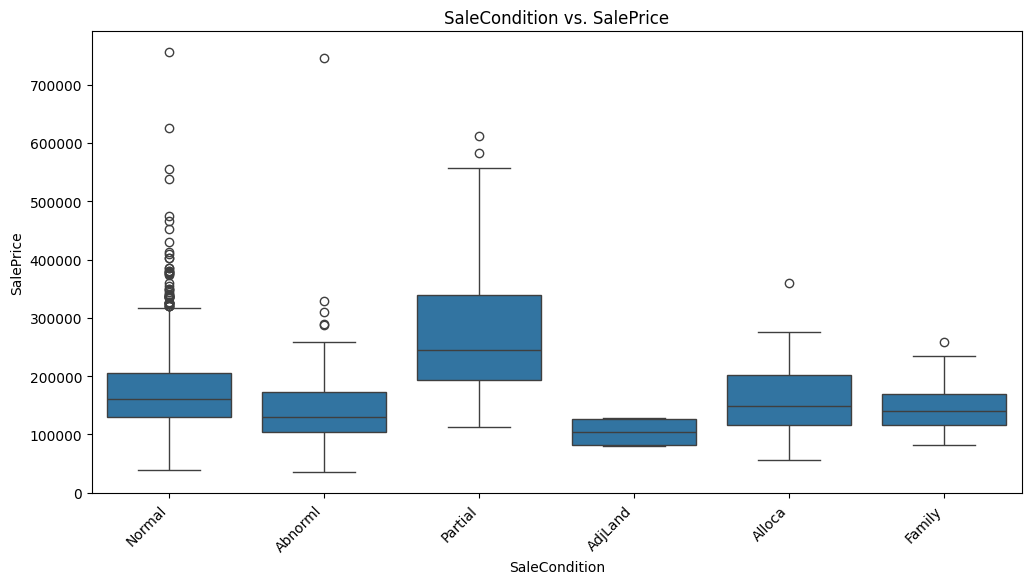

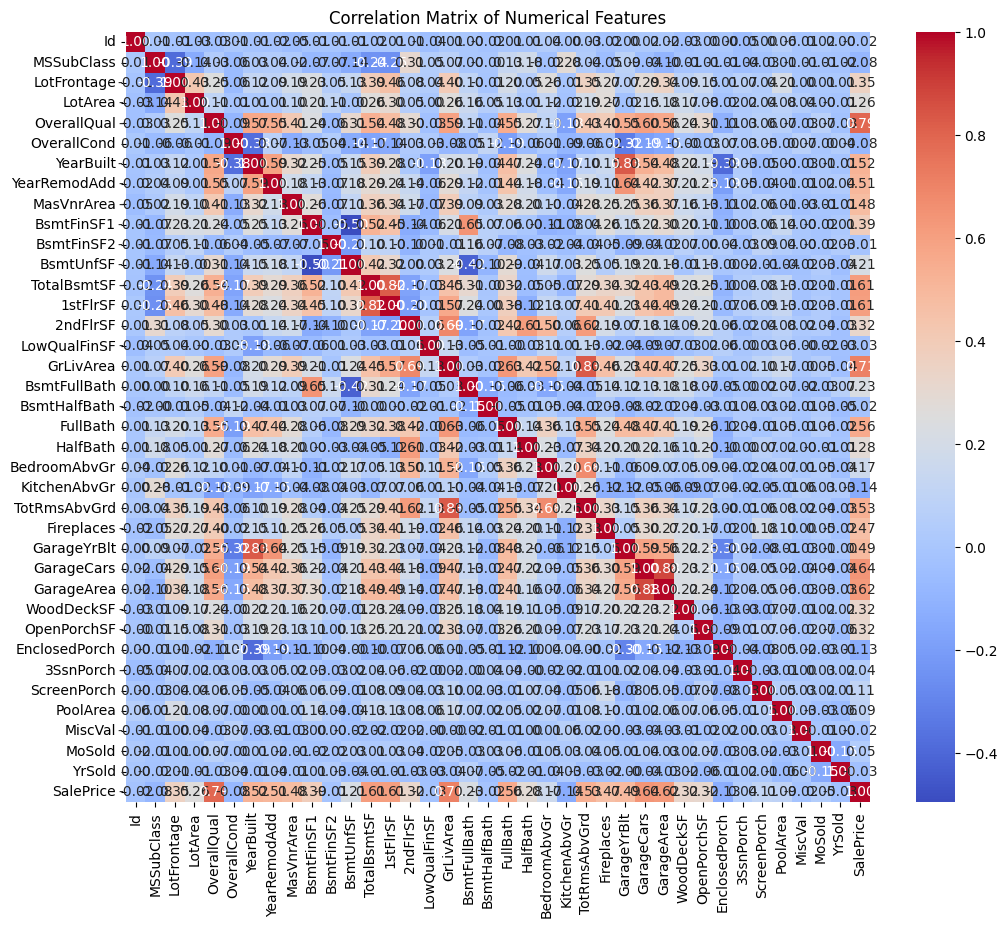

In [ ]:
# prompt: buatlah visualisasi EDA

# Check for numerical and categorical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

# Visualize numerical features distributions
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize relationships between numerical features and target variable ('SalePrice')
for col in numerical_features:
    if col != 'SalePrice':  # Exclude the target variable itself
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='SalePrice', data=train)
        plt.title(f'{col} vs. SalePrice')
        plt.show()

# Visualize categorical features distributions
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Visualize relationships between categorical features and target variable ('SalePrice')
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='SalePrice', data=train)
    plt.title(f'{col} vs. SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Correlation matrix heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(train[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

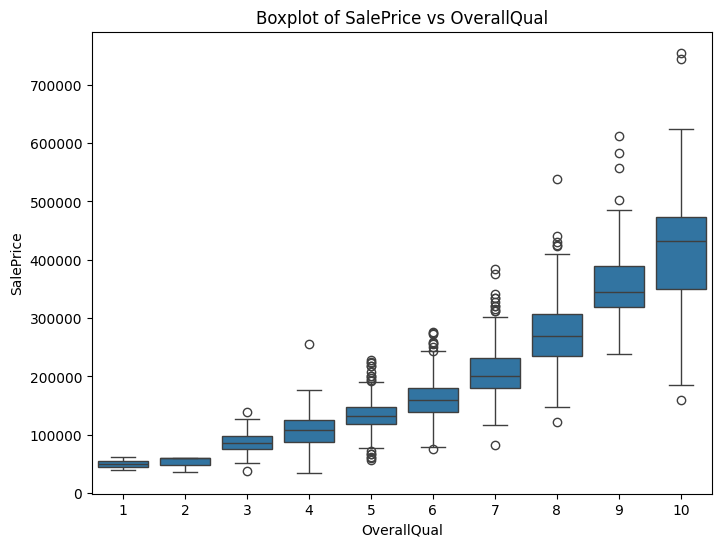

In [ ]:
# prompt: buatlah boxplot

# Assuming 'train' DataFrame is already loaded and processed as in the provided code.

# Example using 'GrLivArea' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Boxplot of SalePrice vs OverallQual')
plt.show()

In [ ]:
import pandas as pd
train = pd.get_dummies(train, columns=['MSZoning', 'Street', 'SaleCondition'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['ExterQual'] = label_encoder.fit_transform(train['ExterQual'])
train['OverallQual'] = label_encoder.fit_transform(train['OverallQual'])

In [ ]:
# prompt: buatlah encoding One-Hot Encoding untuk ML regression atau Target Encoding untuk model seperti Random Forest dan XGBoos

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'train' DataFrame is already loaded and preprocessed as shown in your example

# --- Target Encoding ---
def target_encode(df, col, target):
    """
    Performs target encoding for a categorical feature.

    Args:
      df: DataFrame containing the data.
      col: Name of the categorical column.
      target: Name of the target variable column.

    Returns:
      A dictionary mapping category values to their target means.
    """
    mapping = df.groupby(col)[target].mean().to_dict()
    return mapping


# Example usage for 'Neighborhood' feature
neighborhood_mapping = target_encode(train, 'Neighborhood', 'SalePrice')
train['Neighborhood_encoded'] = train['Neighborhood'].map(neighborhood_mapping)

# ... apply target encoding to other relevant categorical columns ...
# Example for 'BldgType'
bldgtype_mapping = target_encode(train, 'BldgType', 'SalePrice')
train['BldgType_encoded'] = train['BldgType'].map(bldgtype_mapping)


# --- Handling remaining categorical features (One-Hot Encoding if needed) ---

# Identify columns that are still categorical (after Target Encoding) and should be one-hot encoded
categorical_cols = train.select_dtypes(include=['object']).columns

# Create dummy variables for remaining categorical columns (if any)
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)


# Example of splitting the data (adjust as needed)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have your encoded features ready for your model
# (X_train, X_test, y_train, y_test)

NameError: name 'train' is not defined

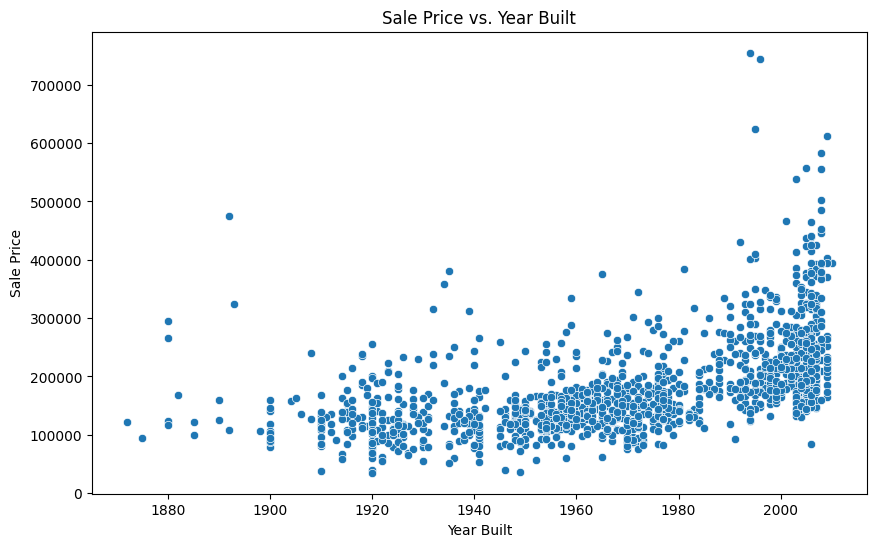

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# Drop rows with any missing values from X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping rows

In [ ]:

from sklearn.impute import SimpleImputer

# Initialize an imputer (e.g., with the mean strategy)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'

# Fit the imputer on the training data and transform
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Also apply to the test data using the same imputer

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 1994860508.603443
Root Mean Squared Error (RMSE): 44663.86132661889


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ... (other imports) ...

# ... (Your existing code) ...

# Identify potential outliers using IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    # Return upper_bound and lower_bound along with the outliers
    return outliers, lower_bound, upper_bound

# Example: Find outliers in 'GrLivArea'
outliers_GrLivArea, lower_bound, upper_bound = find_outliers_iqr(train['GrLivArea']) # Receive returned values
print("Outliers in 'GrLivArea':\n", outliers_GrLivArea)

# ... (rest of your code) ...

# Option 2: Cap outliers
# For example, cap GrLivArea values
train.loc[train['GrLivArea'] > upper_bound, 'GrLivArea'] = upper_bound # Now upper_bound is defined

# ... (rest of your code) ...

Outliers in 'GrLivArea':
 58      2945
118     3222
185     3608
197     3112
231     2794
304     3493
324     2978
496     3228
523     4676
583     2775
608     3194
635     3395
691     4316
769     3279
798     3140
803     2822
961     2872
1024    2898
1031    3082
1046    2868
1142    2828
1169    3627
1173    3086
1175    2872
1182    4476
1268    3447
1298    5642
1312    2810
1328    2792
1353    3238
1386    2784
Name: GrLivArea, dtype: int64


<ipython-input-22-85840e0886bd>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2747.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train['GrLivArea'] > upper_bound, 'GrLivArea'] = upper_bound # Now upper_bound is defined


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Mean Squared Error (MSE): 1111916178.1063716
Root Mean Squared Error (RMSE): 33345.40715160593


In [ ]:
# prompt: buatlahh dengan metode adaboost train dan test dan hasilnya

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (Your existing code) ...

# Initialize and train the AdaBoostRegressor model
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the AdaBoost model
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost - Mean Squared Error (MSE): {mse_ada}")
print(f"AdaBoost - Root Mean Squared Error (RMSE): {rmse_ada}")
print(f"AdaBoost - Mean Absolute Error (MAE): {mae_ada}")
print(f"AdaBoost - R-squared (R2): {r2_ada}")

AdaBoost - Mean Squared Error (MSE): 1116762788.7310495
AdaBoost - Root Mean Squared Error (RMSE): 33418.00096850572
AdaBoost - Mean Absolute Error (MAE): 21747.50543202063
AdaBoost - R-squared (R2): 0.8544047855898699


In [ ]:
!pip install bayesian-optimization

from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the objective function for Bayesian Optimization
def xgb_evaluate(learning_rate, n_estimators, max_depth, subsample):
    params = {
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),  # Cast to integer
        'max_depth': int(max_depth),         # Cast to integer
        'subsample': subsample,
        'objective': 'reg:squarederror',
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return -rmse  # Bayesian Optimization maximizes, so we negate RMSE

# Define the search space for hyperparameters
xgb_bo = BayesianOptimization(
    xgb_evaluate,
    {
        'learning_rate': (0.01, 0.2),
        'n_estimators': (50, 200),
        'max_depth': (3, 7),
        'subsample': (0.5, 0.9)
    },
    random_state=42
)


# Perform Bayesian Optimization
xgb_bo.maximize(init_points=5, n_iter=10) # Adjust init_points and n_iter as needed


# Get the best hyperparameters and RMSE
print("Best parameters:", xgb_bo.max['params'])
print("Best RMSE:", -xgb_bo.max['target'])

# Train the model with the best hyperparameters
best_params = xgb_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Final RMSE with best hyperparameters: {rmse}")

|   iter    |  target   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------
| 1         | -2.734e+0 | 0.08116   | 6.803     | 159.8     | 0.7395    |
| 2         | -3.526e+0 | 0.03964   | 3.624     | 58.71     | 0.8465    |
| 3         | -2.837e+0 | 0.1242    | 5.832     | 53.09     | 0.888     |
| 4         | -2.901e+0 | 0.1682    | 3.849     | 77.27     | 0.5734    |
| 5         | -2.763e+0 | 0.06781   | 5.099     | 114.8     | 0.6165    |
| 6         | -2.707e+0 | 0.1475    | 4.98      | 114.8     | 0.6641    |
| 7         | -2.693e+0 | 0.1367    | 3.541     | 114.6     | 0.8754    |
| 8         | -2.768e+0 | 0.1754    | 3.982     | 116.2     | 0.561     |
| 9         | -2.844e+0 | 0.1622    | 4.167     | 113.0     | 0.6768    |
| 10        | -2.704e+0 | 0.03191   | 5.839     | 161.6     | 0.533     |
| 11        | -2.837e+0 | 0.1973    | 4.635     | 160.0     | 0.8822    |
| 12        | -2.823e+0 | 0.0252    | 

In [ ]:
y_pred_train_lr = model.predict(X_train)
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_train_xgb = best_model.predict(X_train)

In [ ]:
# prompt: buatlah dengan metode decision tree

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree - Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Decision Tree - Mean Absolute Error (MAE): {mae_dt}")
print(f"Decision Tree - R-squared (R2): {r2_dt}")

Decision Tree - Mean Squared Error (MSE): 1139494834.1575344
Decision Tree - Root Mean Squared Error (RMSE): 33756.404342843365
Decision Tree - Mean Absolute Error (MAE): 24123.869863013697
Decision Tree - R-squared (R2): 0.8514411508222658


In [ ]:
# prompt: buatlah RMSE, MAE, atau R² untuk membandingkan kinerja setiap model.

from sklearn.metrics import mean_absolute_error, r2_score

# ... (your existing code) ...

# Linear Regression Evaluation
y_pred_lr = model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)

print("Linear Regression:")
print(f"RMSE Train: {rmse_train_lr}")
print(f"RMSE Test: {rmse_lr}")
print(f"MAE Train: {mae_train_lr}")
print(f"MAE Test: {mae_lr}")
print(f"R-squared Train: {r2_train_lr}")
print(f"R-squared Test: {r2_lr}")


# Random Forest Evaluation
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

print("\nRandom Forest:")
print(f"RMSE Train: {rmse_train_rf}")
print(f"RMSE Test: {rmse_rf}")
print(f"MAE Train: {mae_train_rf}")
print(f"MAE Test: {mae_rf}")
print(f"R-squared Train: {r2_train_rf}")
print(f"R-squared Test: {r2_rf}")


# XGBoost Evaluation
y_pred_xgb = best_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print("\nXGBoost:")
print(f"RMSE Train: {rmse_train_xgb}")
print(f"RMSE Test: {rmse_xgb}")
print(f"MAE Train: {mae_train_xgb}")
print(f"MAE Test: {mae_xgb}")
print(f"R-squared Train: {r2_train_xgb}")
print(f"R-squared Test: {r2_xgb}")

Linear Regression:
RMSE Train: 20106.824831326314
RMSE Test: 44663.86132661889
MAE Train: 12957.643492329044
MAE Test: 22156.2210854002
R-squared Train: 0.9378793626627381
R-squared Test: 0.7399249452084253

Random Forest:
RMSE Train: 12364.155940305027
RMSE Test: 33345.40715160593
MAE Train: 6926.976268219533
MAE Test: 19010.408151465403
R-squared Train: 0.9765102788235009
R-squared Test: 0.8550366505841039

XGBoost:
RMSE Train: 11195.698235912057
RMSE Test: 26926.738799284936
MAE Train: 8318.818084751125
MAE Test: 17095.393367401542
R-squared Train: 0.9807402491569519
R-squared Test: 0.9054734706878662


In [ ]:
# prompt: buatlah komparasi paramater MAPE

from sklearn.metrics import mean_absolute_percentage_error

# ... (your existing code) ...

# Linear Regression MAPE
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_train_lr = mean_absolute_percentage_error(y_train, y_pred_train_lr) * 100

print("\nLinear Regression:")
print(f"MAPE Train: {mape_train_lr}")
print(f"MAPE Test: {mape_lr}")


# Random Forest MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_train_rf = mean_absolute_percentage_error(y_train, y_pred_train_rf) * 100

print("\nRandom Forest:")
print(f"MAPE Train: {mape_train_rf}")
print(f"MAPE Test: {mape_rf}")


# XGBoost MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_train_xgb = mean_absolute_percentage_error(y_train, y_pred_train_xgb) * 100

print("\nXGBoost:")
print(f"MAPE Train: {mape_train_xgb}")
print(f"MAPE Test: {mape_xgb}")


Linear Regression:
MAPE Train: 7.370487747034256
MAPE Test: 13.88252606047398

Random Forest:
MAPE Train: 3.8152838897647556
MAPE Test: 12.541077157863672

XGBoost:
MAPE Train: 5.003588730619075
MAPE Test: 10.299459263813583


##Feature Importance

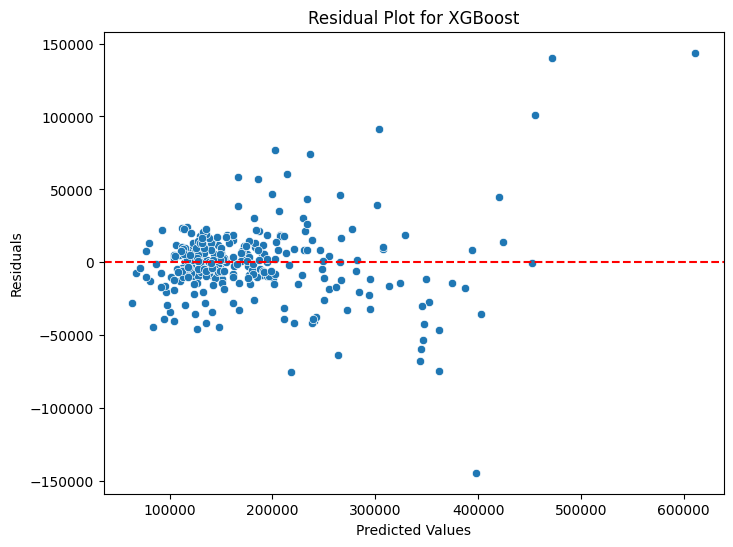

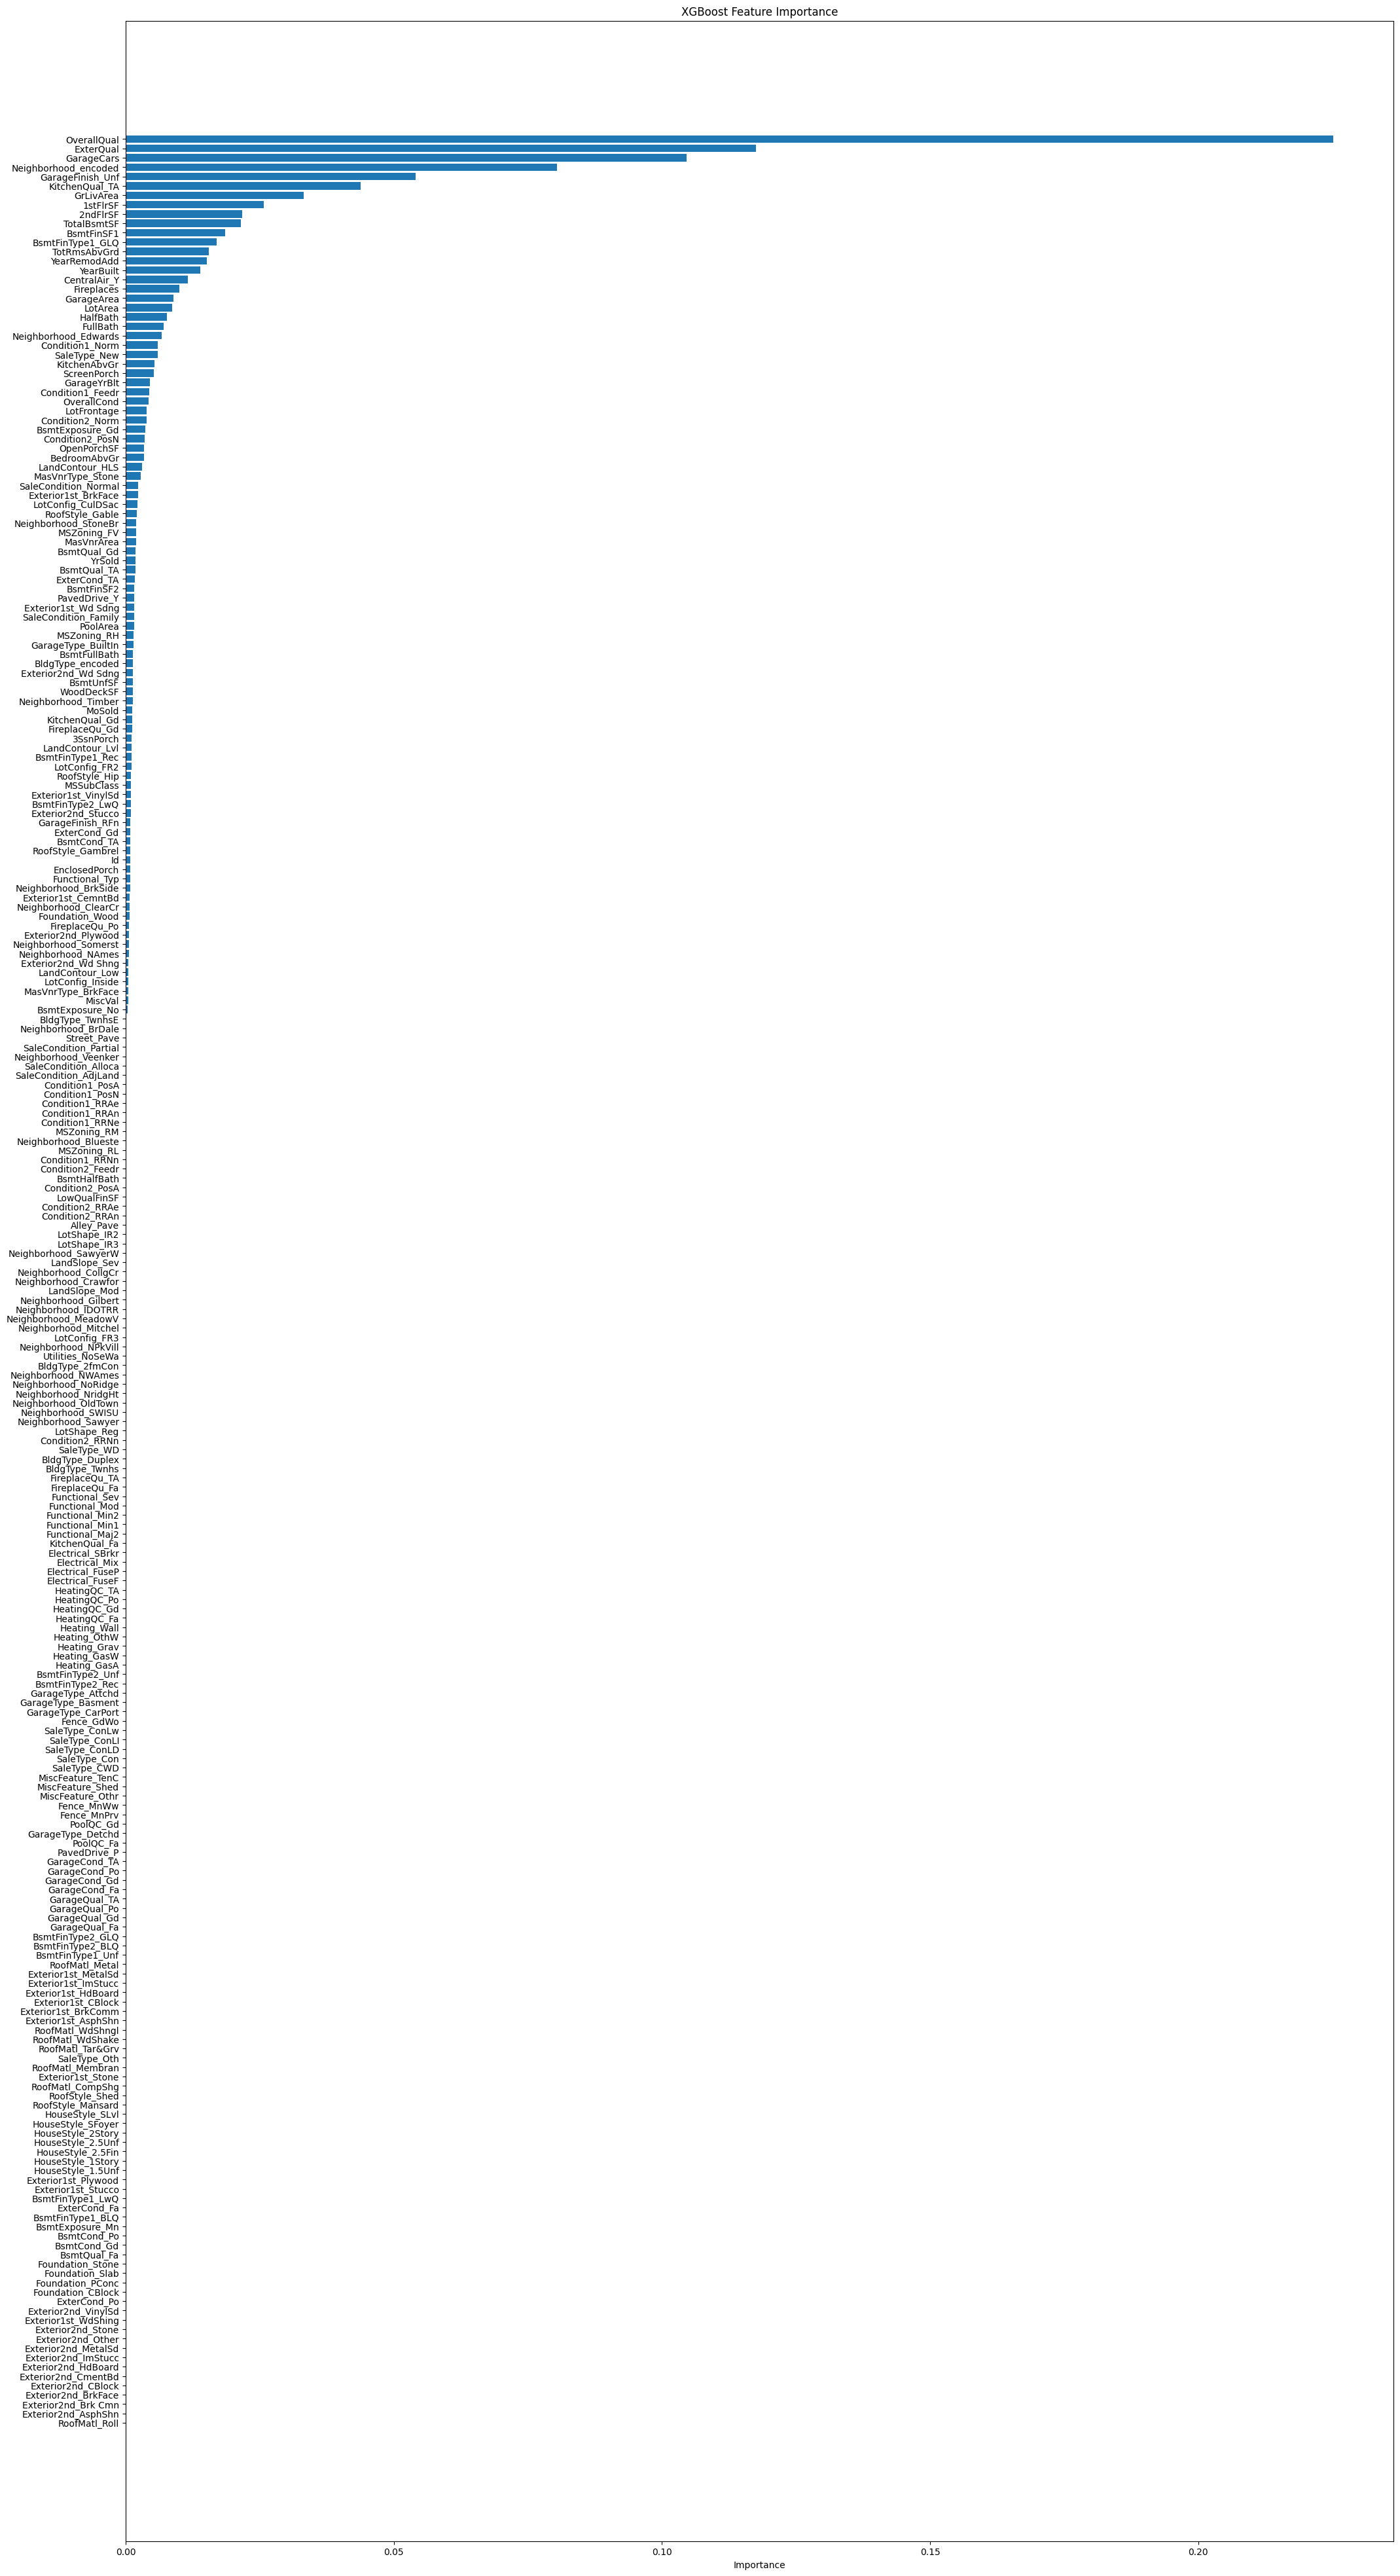

In [ ]:


# Residual Plot for XGBoost
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_xgb
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost")
plt.show()

# Feature Importance Plot for XGBoost
plt.figure(figsize=(25, 50))
feature_importance = best_model.feature_importances_
feature_names = X.columns # Assuming X is your feature DataFrame
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.show()